In [76]:
##################################
### Import the usual libraries ###
##################################

#numpy
import numpy as np

# scipy
from scipy.stats import binned_statistic_2d, binned_statistic

#astropy
import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, QTable

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.offsetbox import AnchoredText
matplotlib.rcParams.update({'font.size': 18})

# Yumi's Code to convert (RA,DEC) to MS coordinates
import MagellanicStream as ms

# .py files for grad calc
import astrofunctions as astro
import lmcgeometry as lgeo
import mlefitting as mle
import utilities as util

# Ignore warnings unless crashes
import warnings
warnings.filterwarnings('ignore')

#progress bars
from tqdm import tqdm_notebook

In [10]:
# PARSEC Isochrones
parsecall = ascii.read('/Users/joshpovick/Desktop/Research/LMC_Ages/parsec3_3.dat', \
                    format='basic', delimiter='\s')

rgb = np.where(parsecall['label']==3)
parsec = parsecall[rgb]

# LMC r13 data
lmcr13 = fits.getdata('/Users/joshpovick/Desktop/Research/LMC_Ages/lmc_rgbmembers.r13-l33-58672.fits.gz',1)
clnr = np.where((lmcr13['FE_H']>-9999.0)&(lmcr13['AK_TARG']>-9999.0)&(lmcr13['LOGG']>0.0)&
                (lmcr13['M_H_ERR']>-90.0)&(lmcr13['C_FE']>-9999.0)&(lmcr13['N_FE']>-9999.0))

r13 = lmcr13[clnr]

ages = fits.getdata('pca_ols_ages.fits')

In [173]:
### Radii LMC
x,y,dist = lgeo.LMCdisk_cart(r13['RA'],r13['DEC'])
radius = lgeo.elliptical_radius(x,y)
     
### All elements APOGEE measures abundances for
elems = ['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','P_FE','S_FE','K_FE','CA_FE','TI_FE',
         'TIII_FE','V_FE','CR_FE','MN_FE','FE_H','CO_FE','NI_FE','CU_FE','GE_FE','RB_FE','CE_FE','ND_FE','YB_FE']
elems_err = ['M_H_ERR','C_FE_ERR','N_FE_ERR','O_FE_ERR','NA_FE_ERR','MG_FE_ERR','AL_FE_ERR','SI_FE_ERR',
             'P_FE_ERR','S_FE_ERR','K_FE_ERR','CA_FE_ERR','TI_FE_ERR','TIII_FE_ERR','V_FE_ERR','CR_FE_ERR',
             'MN_FE_ERR','FE_H_ERR','CO_FE_ERR','NI_FE_ERR','CU_FE_ERR','GE_FE_ERR','RB_FE_ERR','CE_FE_ERR',
             'ND_FE_ERR','YB_FE_ERR']

elems = np.asarray(elems)
elems_err= np.asarray(elems_err)

labs = ['[M/H]','[C/Fe]','[N/Fe]','[O/Fe]','[Na/Fe]','[Mg/Fe]','[Al/Fe]','[Si/Fe]','[P/Fe]','[S/Fe]','[K/Fe]',
        '[Ca/Fe]','[Ti/FE]','[Ti II/Fe]','[V/Fe]','[Cr/Fe]','[Mn/Fe]','[Fe/H]','[Co/Fe]','[Ni/Fe]','[Cu/Fe]',
        '[Ge/Fe]','[Rb/Fe]','[Ce/Fe]','[Nd/Fe]','[Yb/FE]']

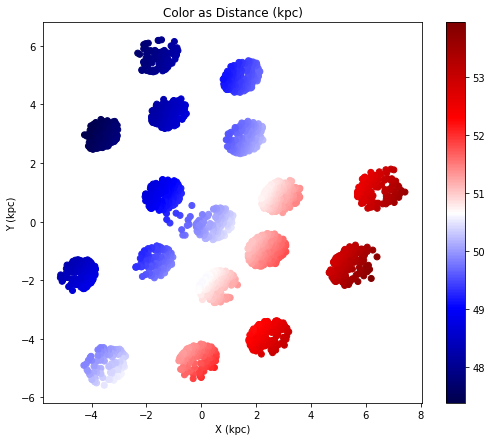

In [4]:
plt.figure(figsize=[8.5,7])
plt.scatter(x,y,c=dist,cmap='seismic')
plt.xlabel(r'X (kpc)')
plt.ylabel(r'Y (kpc)')
plt.title(r'Color as Distance (kpc)')
plt.colorbar()
plt.show()

<font size='15'>
    <b>
        Hayden Plots
    </b>
</font>

max radius:  7.006360408216029
half radius:  3.5031802041080145


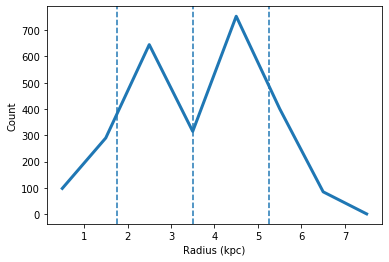

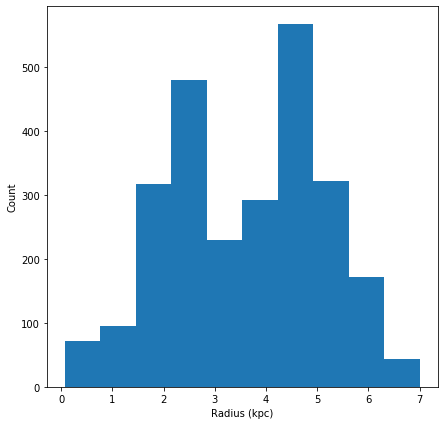

In [5]:
print('max radius: ', max(radius))
print('half radius: ', 0.5*max(radius))

bins = np.append(np.arange(np.floor(np.min(radius)),np.ceil(np.max(radius)),1.0),np.ceil(np.max(radius))+1) 
bin_radius, _, _ = binned_statistic(radius,radius,statistic='count',bins=bins)
plt.plot(bins[:-1]+0.5,bin_radius,c='tab:blue',lw=3)
plt.axvline(1.75,ls='--')
plt.axvline(3.5,ls='--')
plt.axvline(5.25,ls='--')
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Count');

plt.figure(figsize=[7,7])
plt.hist(radius)
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Count')
plt.show();

# inner = r13[np.where(radius<=3.5)]
# outer = r13[np.where(radius>=3.5)]

In [118]:
set(np.copy(radius))

2588

<font size='15'>
    <b>
        Equal Distance Binning
    </b>
</font>

In [14]:
##############
###  Bins  ###
##############

one = np.where(radius<1.75)
two = np.where((radius>=1.75)&(radius<3.0))
three = np.where((radius>=3.0)&(radius<5.75))
four = np.where(radius>=5.75)

rad_bins = [one,two,three,four]

## yoradius
yoone = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius<1.75))
yotwo = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=1.75)&(radius<3.0))
yothree = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=3.0)&(radius<5.75))
yofour = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=5.75))

yoradius = [yoone,yotwo,yothree,yofour]

## ylradius
ylone = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius<1.75))
yltwo = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius>=1.75)&(radius<3.0))
ylthree = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&
                   (radius>=3.0)&(radius<5.75))
ylfour = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius>=5.75))

ylradius = [ylone,yltwo,ylthree,ylfour]

## ymradius
ymone = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius<1.75))
ymtwo = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius>=1.75)&(radius<3.0))
ymthree = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&
                   (radius>=3.0)&(radius<5.75))
ymfour = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius>=5.75))

ymradius = [ymone,ymtwo,ymthree,ymfour]

## omradius
omone = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius<1.75))
omtwo = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius>=1.75)&(radius<3.0))
omthree = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&
                   (radius>=3.0)&(radius<5.75))
omfour = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius>=5.75))

omradius = [omone,omtwo,omthree,omfour]

## olradius
olone = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius<1.75))
oltwo = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=1.75)&(radius<3.0))
olthree = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=3.0)&(radius<5.75))
olfour = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=5.75))

olradius = [olone,oltwo,olthree,olfour]

In [ ]:
# galhessprime = binned_statistic_2d(allicr['bp_rp'][cln],ICRRprime,values=allicr['bp_rp'][cln],
#                               statistic='count',bins=300)

# plt.figure(figsize=[12,10])
# plt.imshow(np.log10(galhessprime.statistic.T), origin='lower',
#            extent=[galhessprime.x_edge[0], galhessprime.x_edge[-1],galhessprime.y_edge[0], 
#                    galhessprime.y_edge[-1]], aspect='auto', interpolation='nearest', cmap='Reds_r')

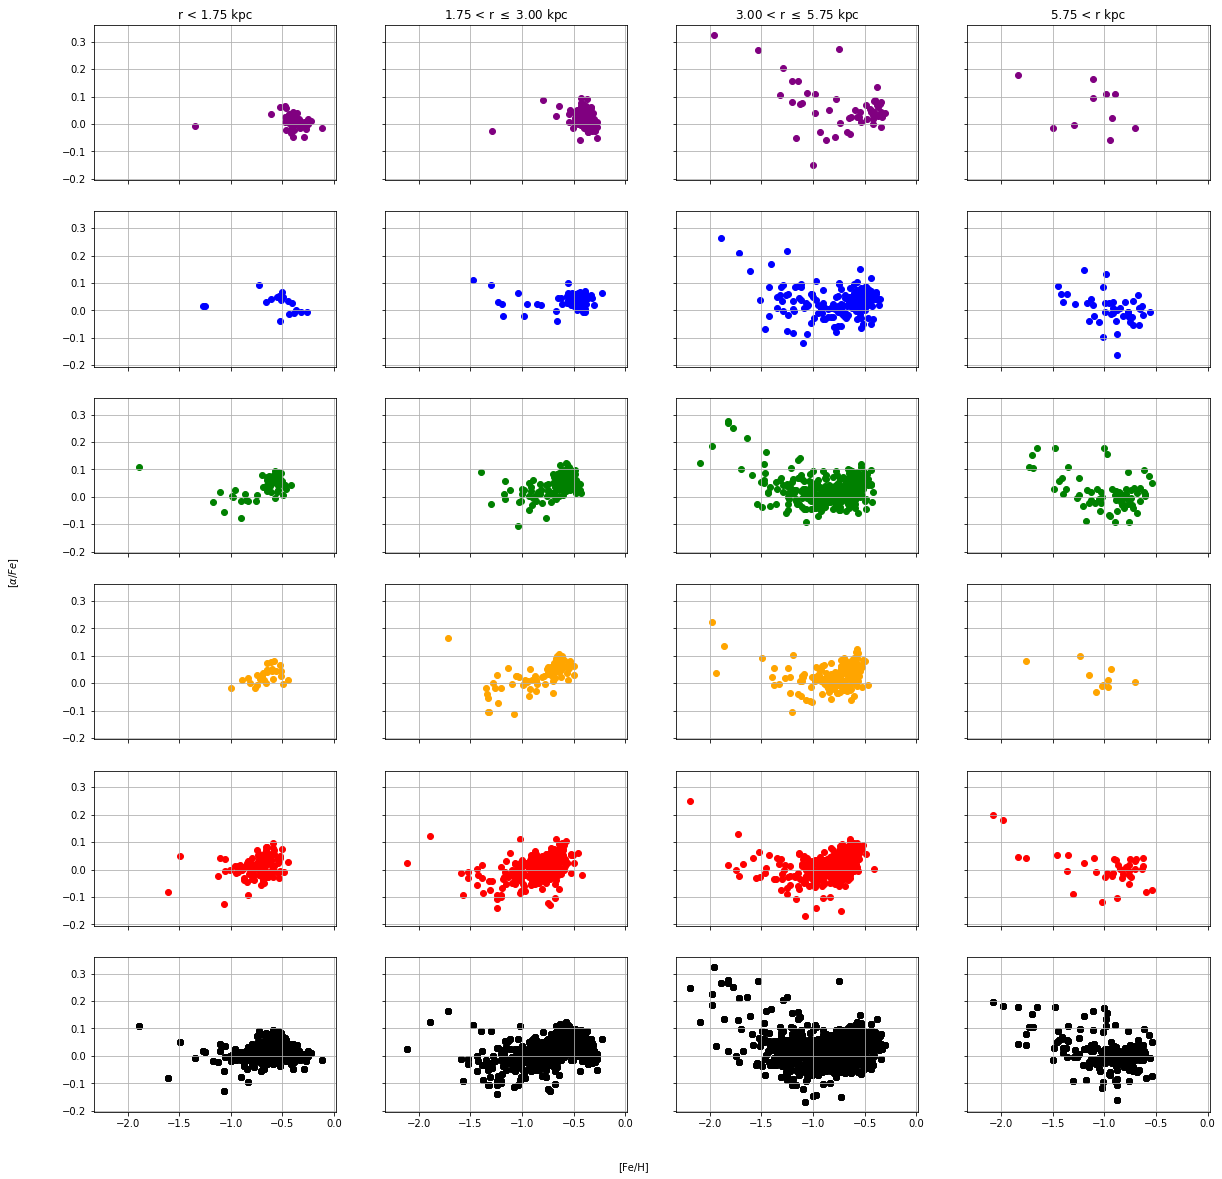

In [17]:
fig, ax = plt.subplots(6,4,sharex=True,sharey=True,figsize=[20,20])
for i in range(5):
    if i == 0:
        for j in range(4):
            ax[i,j].scatter(r13['FE_H'][yoradius[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[yoradius[j]],c='purple')
            #ax[i,j].grid()
    if i == 1:
        for j in range(4):
            ax[i,j].scatter(r13['FE_H'][ylradius[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[ylradius[j]],c='blue')
            #ax[i,j].grid()
    if i == 2:
        for j in range(4):
            ax[i,j].scatter(r13['FE_H'][ymradius[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[ymradius[j]],c='green')
            #ax[i,j].grid()
    if i == 3:
        for j in range(4):
            ax[i,j].scatter(r13['FE_H'][omradius[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[omradius[j]],c='orange')
            #ax[i,j].grid()
    if i == 4:
        for j in range(4):
            ax[i,j].scatter(r13['FE_H'][olradius[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[olradius[j]],c='red')
            #ax[i,j].grid()
            
    for j in range(4):
        ax[5,j].scatter(r13['FE_H'][rad_bins[j]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[rad_bins[j]],c='k')
        #ax[5,j].grid()

rad_labels = ['r < 1.75 kpc','1.75 < r $\leq$ 3.00 kpc','3.00 < r $\leq$ 5.75 kpc','5.75 < r kpc']
for k in range(4):
    ax[0,k].set_title(r'{}'.format(rad_labels[k]))
    #ax[4,k].set_xlabel(r'[Fe/H]')
    
age_labels = ['$0.0 < \\tau \leq 0.5$ Gyr','$0.5 < \\tau \leq 2.0$ Gyr','$2.0 < \\tau \leq 7.0$ Gyr',
              '$7.0 < \\tau \leq 10.5$ Gyr','$10.5 < \\tau$ Gyr','Overall']
# for l in range(6):
#     ax[l,0].set_ylabel(r'{}'.format(age_labels[l]))
    

fig.text(0.5, 0.085, '[Fe/H]', ha='center')
fig.text(0.065, 0.5, '$[\\alpha/Fe]$', va='center', rotation='vertical')

plt.show()

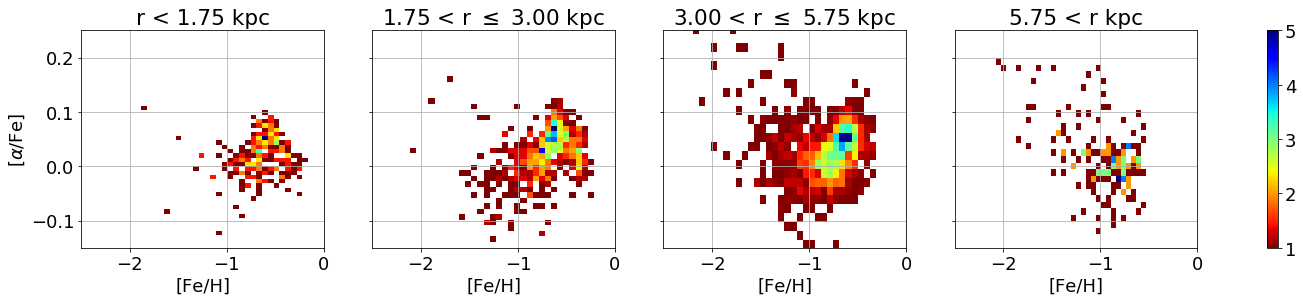

In [119]:
fig, ax = plt.subplots(1,4,sharey=True,figsize=[25,4])
rad_labels = ['r < 1.75 kpc','1.75 < r $\leq$ 3.00 kpc','3.00 < r $\leq$ 5.75 kpc','5.75 < r kpc']
for k in range(4):
    hayden = binned_statistic_2d(r13['FE_H'][rad_bins[k]],(r13['ALPHA_M']+r13['M_H']-r13['FE_H'])[rad_bins[k]],
                                 r13['FE_H'][rad_bins[k]],statistic='count',bins=30)
    mask=hayden.statistic <= 0.
    hayden.statistic[mask] = np.nan
    
    im = ax[k].imshow(hayden.statistic.T, origin='lower',
                      extent=[hayden.x_edge[0],hayden.x_edge[-1],hayden.y_edge[0],hayden.y_edge[-1]],
                      aspect='auto', interpolation='nearest', cmap='jet_r')
    
    ax[k].set_title(r'{}'.format(rad_labels[k]))
    ax[k].set_xlabel(r'[Fe/H]')
    ax[k].set_xlim(-2.5,0)
    ax[k].set_ylim(-0.15,0.25)
    ax[k].grid()
    
fig.colorbar(im, ax=ax.ravel().tolist())
# fig.text(0.4,0.95,r'Color as Count')
    
ax[0].set_ylabel(r'[$\alpha$/Fe]')
plt.show();

In [143]:
np.median([r13['FE_H'][rad_bins[k]][cln],r13[elems[i]][rad_bins[k]][cln]],axis=1)[0]

-0.64637154

---------------[M/H]---------------
r < 1.75 kpc:  [-0.64637154 -0.64585155]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815  -0.66735154]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715 -0.7358915]
5.75 < r kpc:  [-0.9131266 -0.9452416]


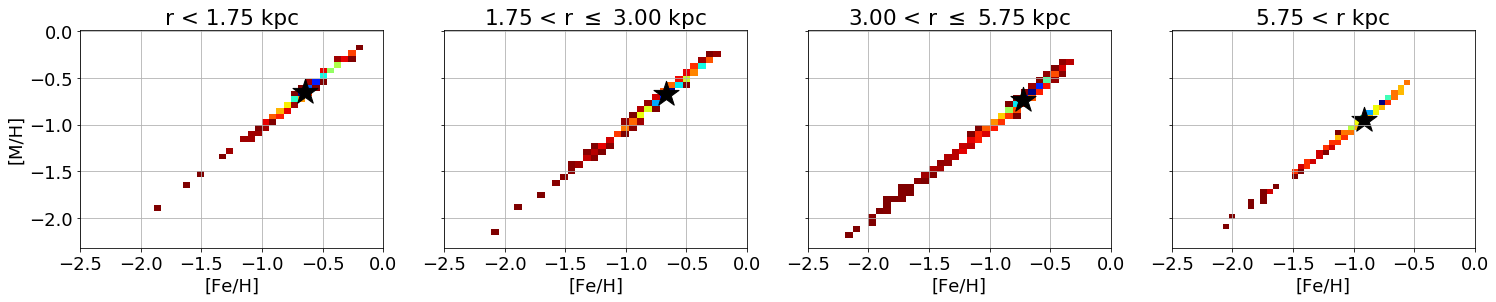

---------------[C/Fe]---------------
r < 1.75 kpc:  [-0.64637154 -0.30364   ]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815 -0.30718  ]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715  -0.35248995]
5.75 < r kpc:  [-0.9131266 -0.40968  ]


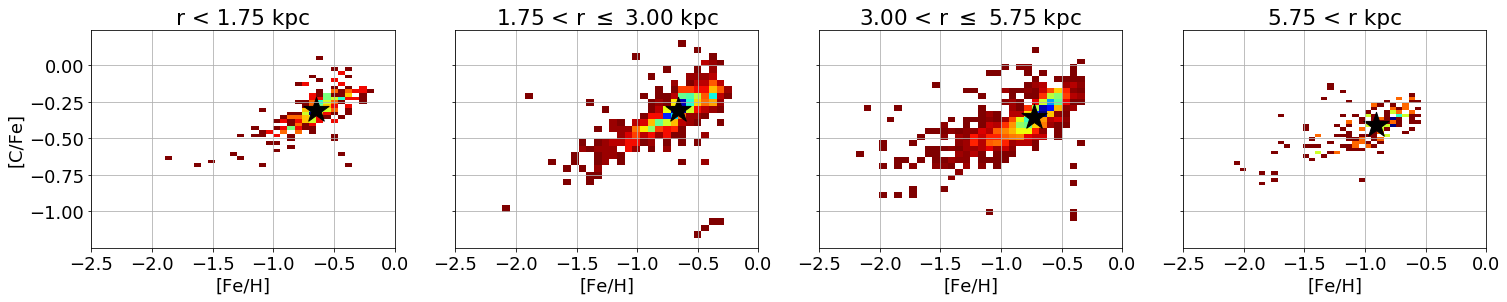

---------------[N/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.12644994]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815  0.12454  ]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715   0.08608997]
5.75 < r kpc:  [-0.9131266   0.01802799]


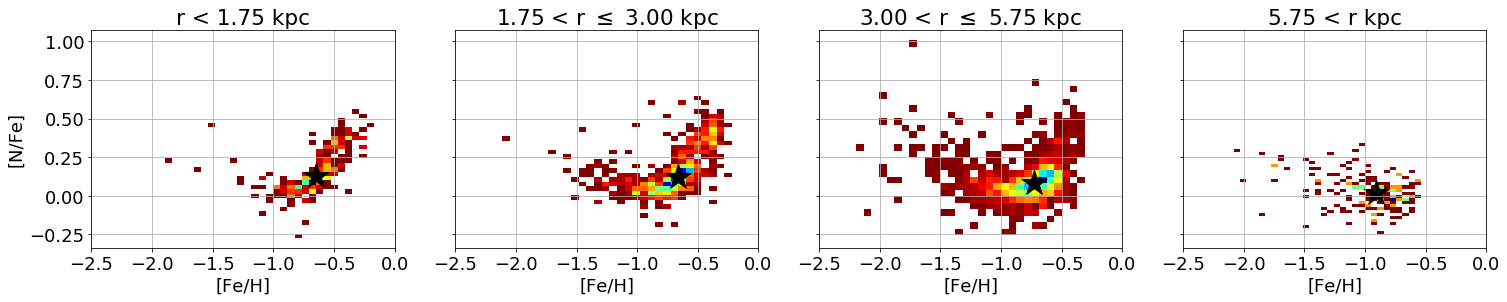

---------------[O/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.02745798]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815  0.03507  ]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715   0.04242504]
5.75 < r kpc:  [-0.9131266   0.03190848]


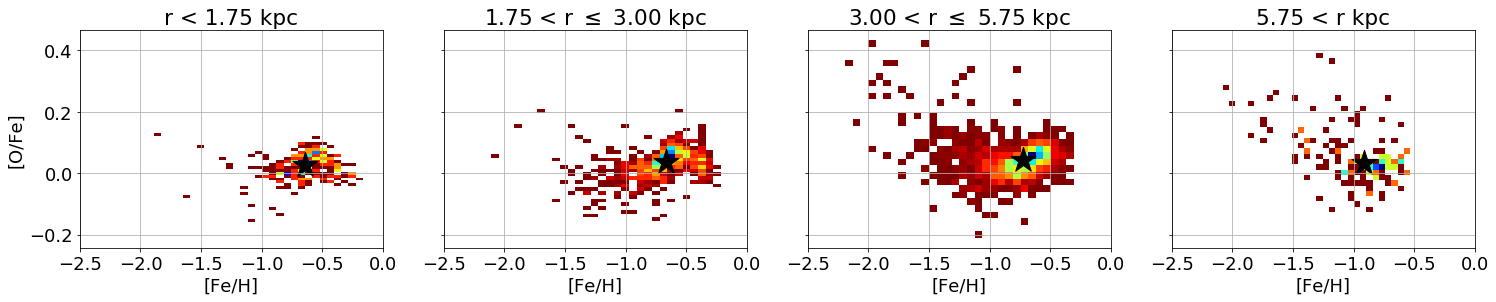

---------------[Na/Fe]---------------
r < 1.75 kpc:  [-0.53220654 -0.18561897]
1.75 < r $\leq$ 3.00 kpc:  [-0.60214156 -0.16975397]
3.00 < r $\leq$ 5.75 kpc:  [-0.70961154 -0.17855394]
5.75 < r kpc:  [-0.87912655 -0.15055397]


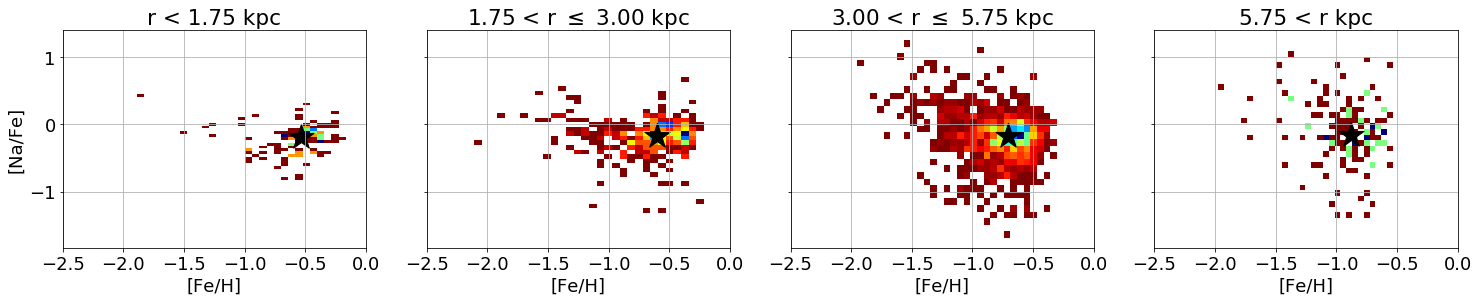

---------------[Mg/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.09167171]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815   0.11156169]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715  0.1155017]
5.75 < r kpc:  [-0.9131266   0.08039168]


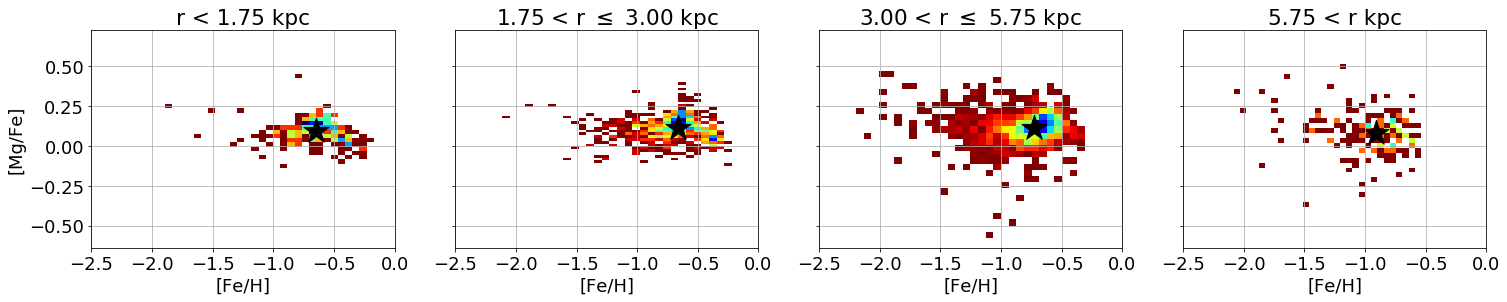

---------------[Al/Fe]---------------
r < 1.75 kpc:  [-0.64637154 -0.32596147]
1.75 < r $\leq$ 3.00 kpc:  [-0.66721153 -0.32385153]
3.00 < r $\leq$ 5.75 kpc:  [-0.72521156 -0.3564515 ]
5.75 < r kpc:  [-0.9131266  -0.44650644]


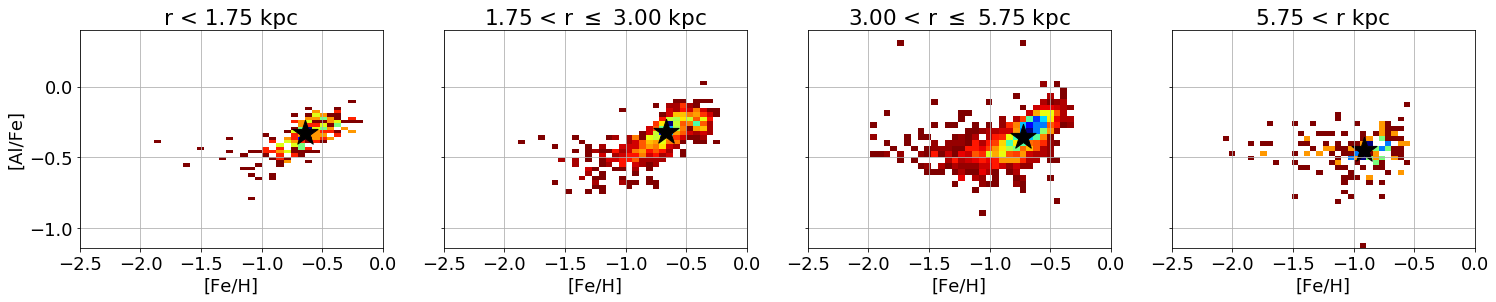

---------------[Si/Fe]---------------
r < 1.75 kpc:  [-0.64637154 -0.00387597]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815  -0.00193949]
3.00 < r $\leq$ 5.75 kpc:  [-0.72524154  0.02281749]
5.75 < r kpc:  [-0.9131266   0.01817501]


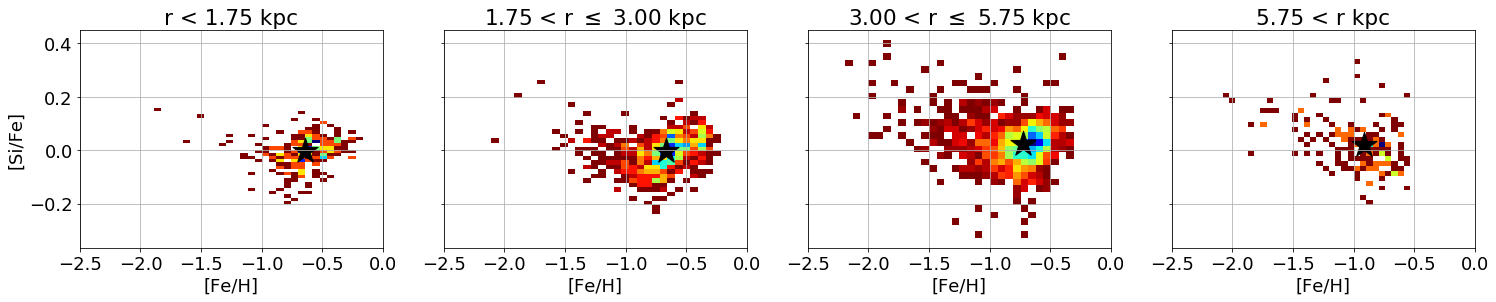

---------------[P/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.02062696]
1.75 < r $\leq$ 3.00 kpc:  [-0.66656154  0.04248691]
3.00 < r $\leq$ 5.75 kpc:  [-0.7190316   0.12036699]
5.75 < r kpc:  [-0.8986316   0.23228696]


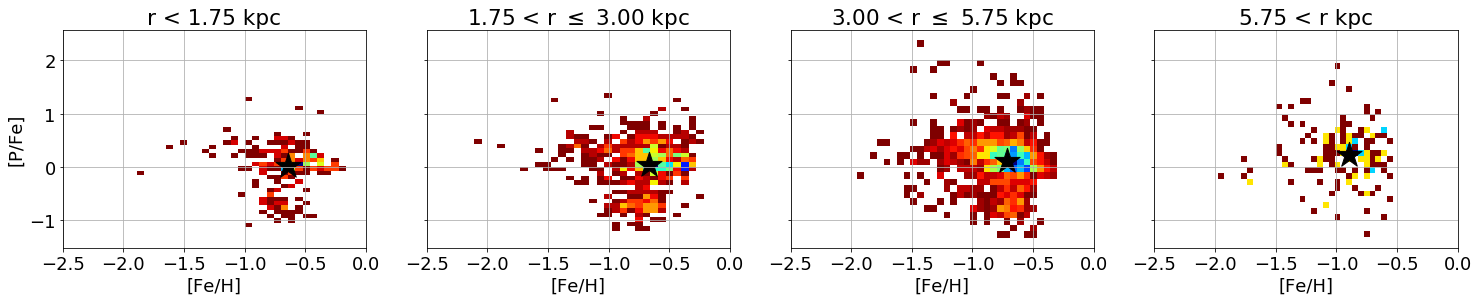

---------------[S/Fe]---------------
r < 1.75 kpc:  [-0.6334515  0.173644 ]
1.75 < r $\leq$ 3.00 kpc:  [-0.66559154  0.161634  ]
3.00 < r $\leq$ 5.75 kpc:  [-0.71752656  0.18277898]
5.75 < r kpc:  [-0.88628155  0.23769397]


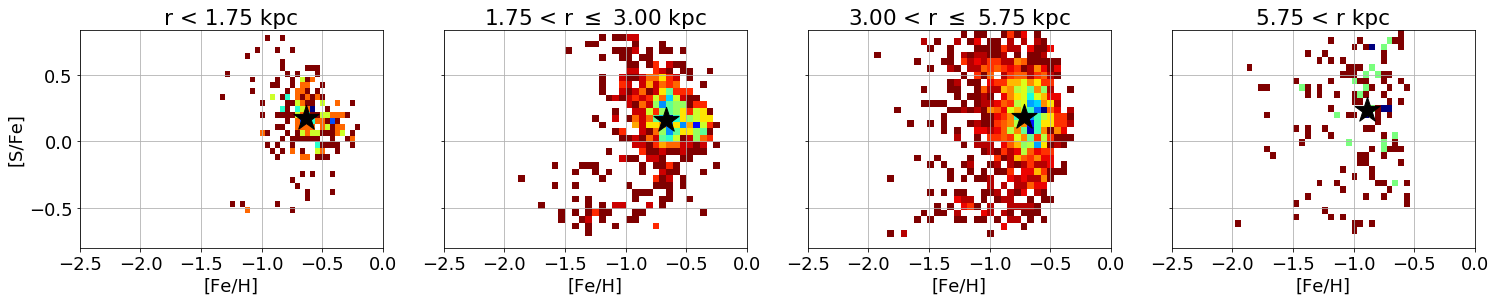

---------------[K/Fe]---------------
r < 1.75 kpc:  [-0.40034655 -0.03476001]
1.75 < r $\leq$ 3.00 kpc:  [-0.40381655  0.01059   ]
3.00 < r $\leq$ 5.75 kpc:  [-0.75175154  0.02361   ]
5.75 < r kpc:  [-0.91572154 -0.00142998]


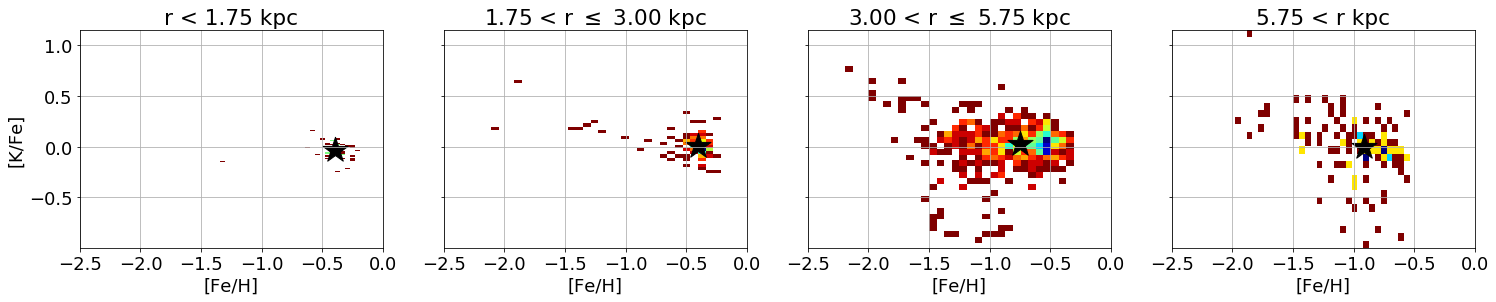

---------------[Ca/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.10251826]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815   0.10464326]
3.00 < r $\leq$ 5.75 kpc:  [-0.72374654  0.09715331]
5.75 < r kpc:  [-0.90099156  0.06443536]


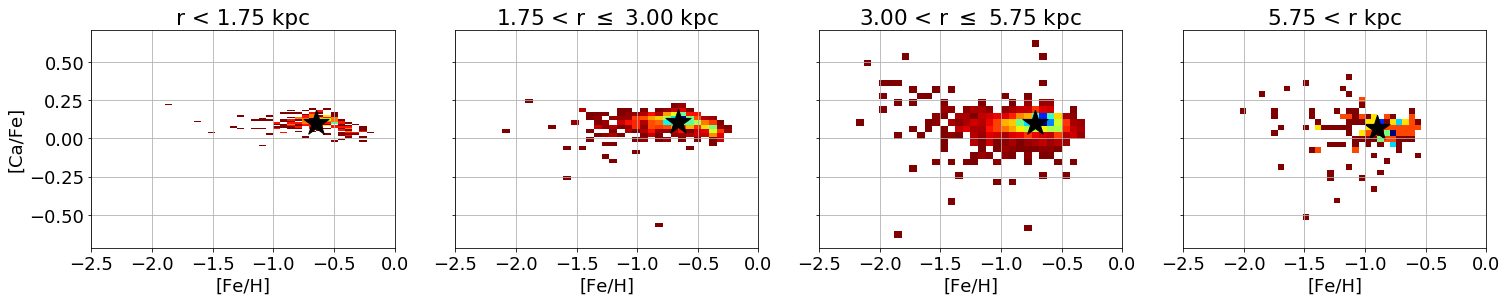

---------------[Ti/FE]---------------
r < 1.75 kpc:  [-0.38034654 -0.10680938]
1.75 < r $\leq$ 3.00 kpc:  [-0.38915157 -0.11351939]
3.00 < r $\leq$ 5.75 kpc:  [-0.7906766  -0.10980037]
5.75 < r kpc:  [-1.1367615  -0.06489167]


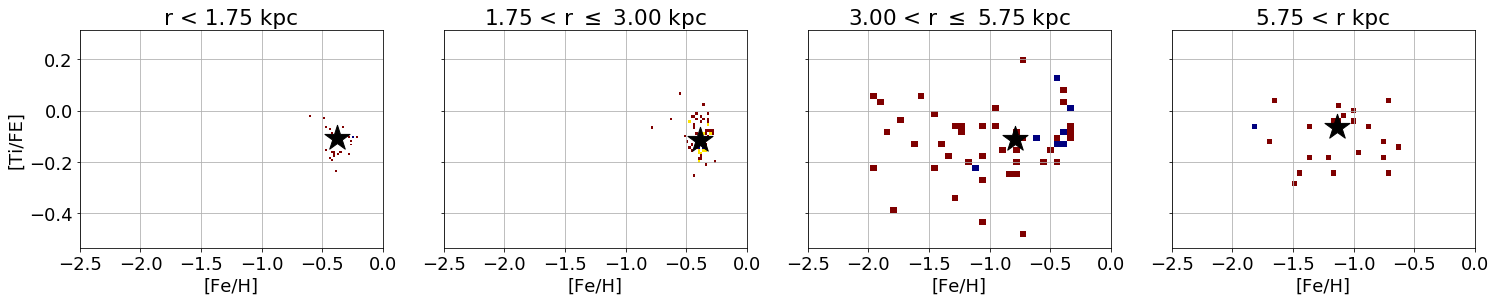

---------------[Ti II/Fe]---------------
r < 1.75 kpc:  [-0.38746154 -0.142604  ]
1.75 < r $\leq$ 3.00 kpc:  [-0.39003655 -0.07883002]
3.00 < r $\leq$ 5.75 kpc:  [-0.7767916 -0.04188  ]
5.75 < r kpc:  [-0.9294015  -0.04767498]


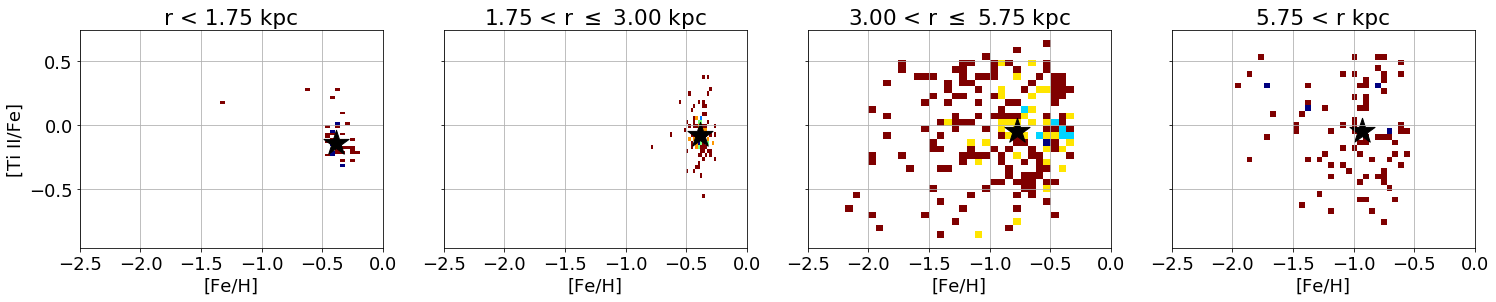

---------------[V/Fe]---------------
r < 1.75 kpc:  [-0.64601153 -0.09506199]
1.75 < r $\leq$ 3.00 kpc:  [-0.66604155 -0.10875696]
3.00 < r $\leq$ 5.75 kpc:  [-0.7189515  -0.13498712]
5.75 < r kpc:  [-0.88535655 -0.25176206]


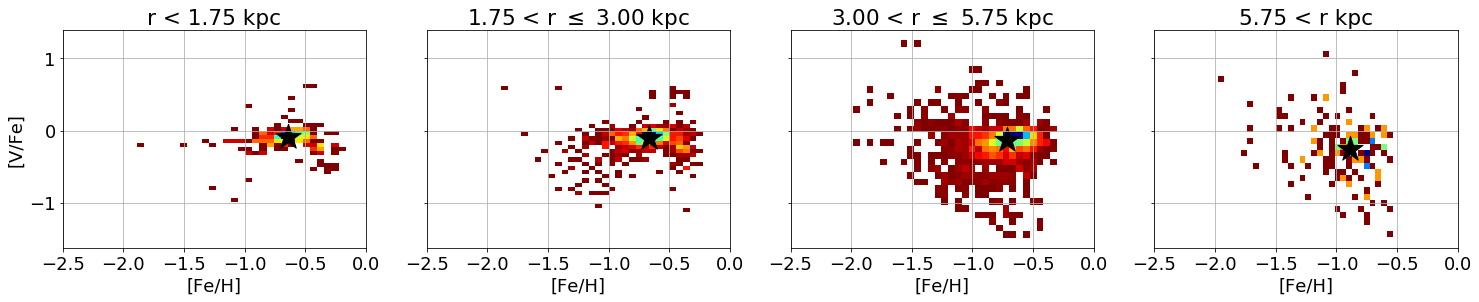

---------------[Cr/Fe]---------------
r < 1.75 kpc:  [-0.64637154  0.04837802]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815   0.05600303]
3.00 < r $\leq$ 5.75 kpc:  [-0.7226416   0.00316799]
5.75 < r kpc:  [-0.9001416  -0.00434199]


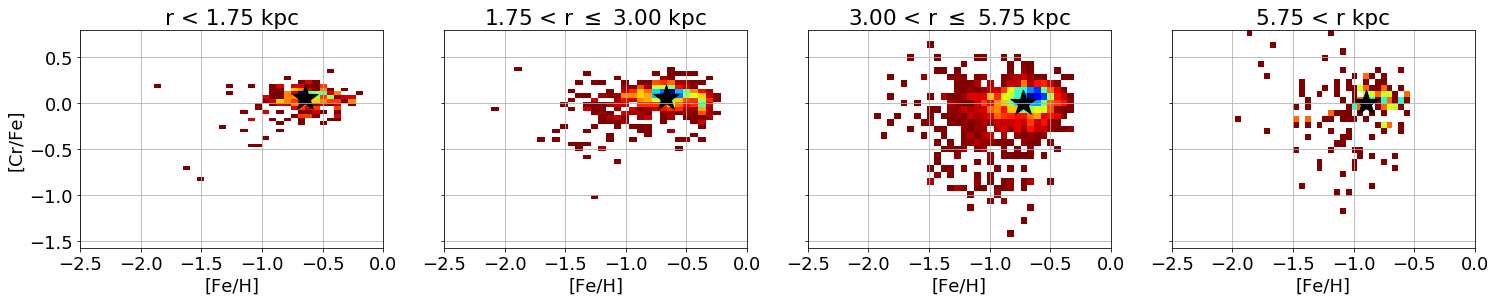

---------------[Mn/Fe]---------------
r < 1.75 kpc:  [-0.38746154 -0.05641603]
1.75 < r $\leq$ 3.00 kpc:  [-0.38966155 -0.06733602]
3.00 < r $\leq$ 5.75 kpc:  [-0.7752665  -0.19833097]
5.75 < r kpc:  [-0.93246156 -0.23109597]


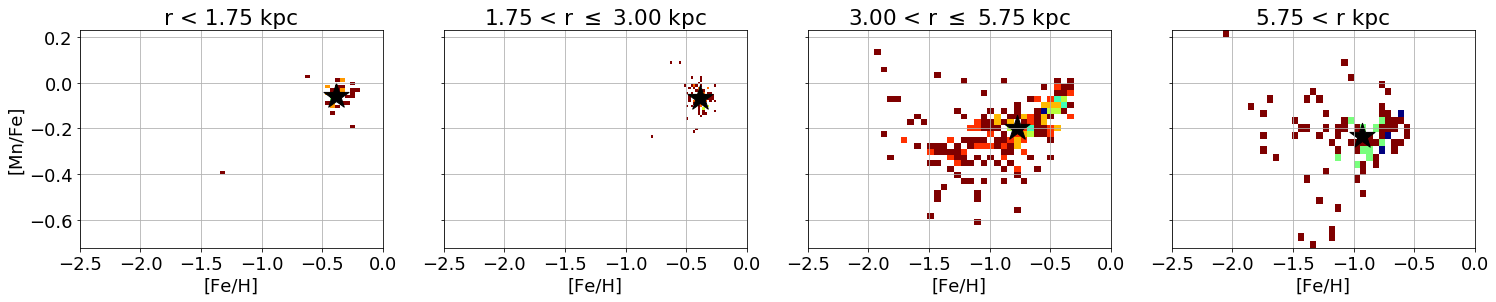

---------------[Fe/H]---------------
r < 1.75 kpc:  [-0.64637154 -0.64637154]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815 -0.6673815]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715 -0.7252715]
5.75 < r kpc:  [-0.9131266 -0.9131266]


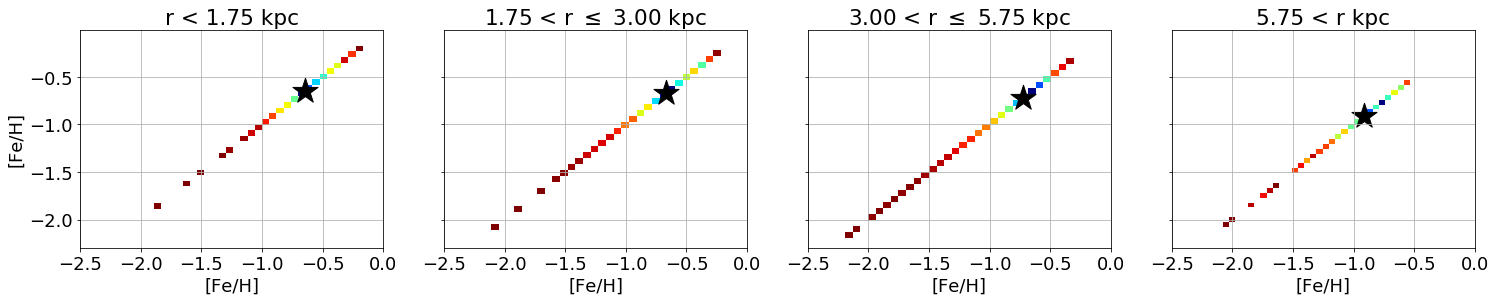

---------------[Co/Fe]---------------
r < 1.75 kpc:  [-0.64637154 -0.14056802]
1.75 < r $\leq$ 3.00 kpc:  [-0.66644156 -0.12939298]
3.00 < r $\leq$ 5.75 kpc:  [-0.72148156 -0.15590799]
5.75 < r kpc:  [-0.8948116  -0.22082806]


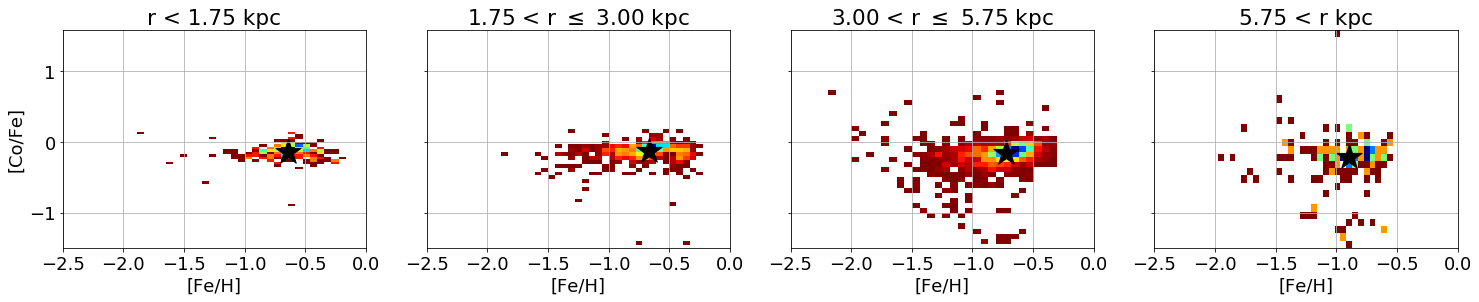

---------------[Ni/Fe]---------------
r < 1.75 kpc:  [-0.64637154 -0.13052791]
1.75 < r $\leq$ 3.00 kpc:  [-0.6673815  -0.12646294]
3.00 < r $\leq$ 5.75 kpc:  [-0.7252715  -0.13431793]
5.75 < r kpc:  [-0.9131266  -0.15425792]


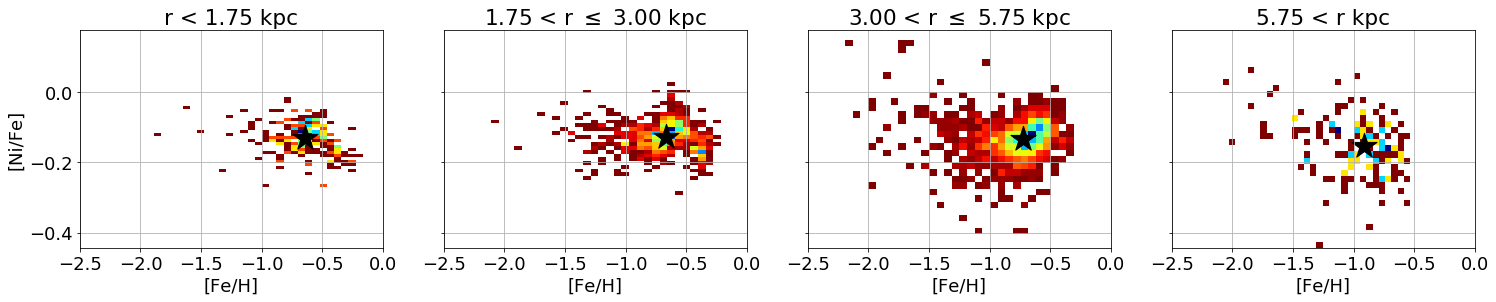

---------------[Cu/Fe]---------------
r < 1.75 kpc:  [-0.38746154  0.0757575 ]
1.75 < r $\leq$ 3.00 kpc:  [-0.38966155  0.11226752]
3.00 < r $\leq$ 5.75 kpc:  [-0.7729815  0.2127325]
5.75 < r kpc:  [-0.9294015   0.23804247]


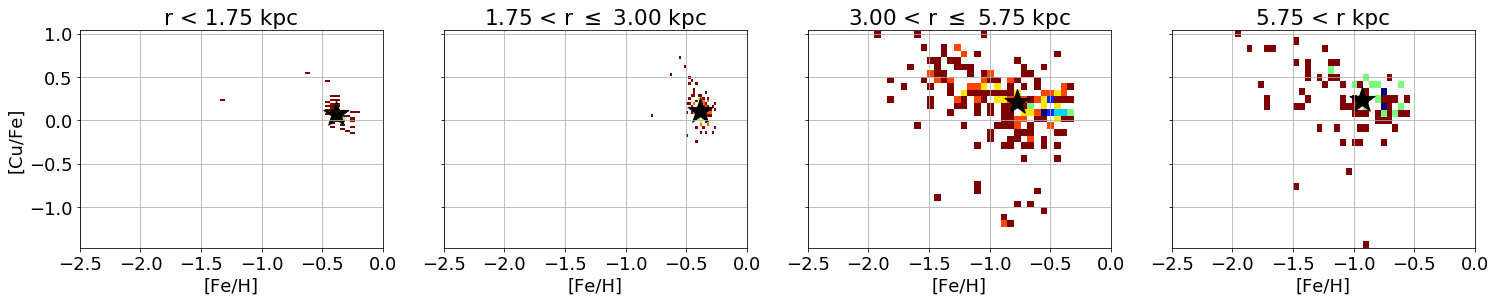

In [163]:
for i in tqdm_notebook(range(len(elems)-5),desc='plots',leave=False):
    
    print(r'---------------{}---------------'.format(labs[i]))
    
    fig, ax = plt.subplots(1,4,sharey=True,figsize=[25,4])
    rad_bins = [one,two,three,four]
    rad_labels = ['r < 1.75 kpc','1.75 < r $\leq$ 3.00 kpc','3.00 < r $\leq$ 5.75 kpc','5.75 < r kpc']
    for k in range(4):
        
        cln = np.where(r13[elems[i]][rad_bins[k]]>-100)
        hayden = binned_statistic_2d(r13['FE_H'][rad_bins[k]][cln],r13[elems[i]][rad_bins[k]][cln],
                                     r13['FE_H'][rad_bins[k]][cln],statistic='count',bins=30)
        mask=hayden.statistic <= 0.
        hayden.statistic[mask] = np.nan
    
        im = ax[k].imshow(hayden.statistic.T, origin='lower',
                          extent=[hayden.x_edge[0],hayden.x_edge[-1],hayden.y_edge[0],hayden.y_edge[-1]],
                          aspect='auto', interpolation='nearest', cmap='jet_r')
    
        ax[k].set_title(r'{}'.format(rad_labels[k]))
        ax[k].set_xlabel(r'[Fe/H]')
        ax[k].set_xlim(-2.5,0)
        ax[k].grid()
    
#         fig.colorbar(im, ax=ax.ravel().tolist())
    
        ax[0].set_ylabel(r'{}'.format(labs[i]))
        
        print(r'{}: '.format(rad_labels[k])
              ,np.median([r13['FE_H'][rad_bins[k]][cln],r13[elems[i]][rad_bins[k]][cln]],axis=1))
        
        med = np.median([r13['FE_H'][rad_bins[k]][cln],r13[elems[i]][rad_bins[k]][cln]],axis=1) 
        
        ax[k].scatter(med[0],med[1],c='k',marker='*',s=700)
    
    plt.show()
    

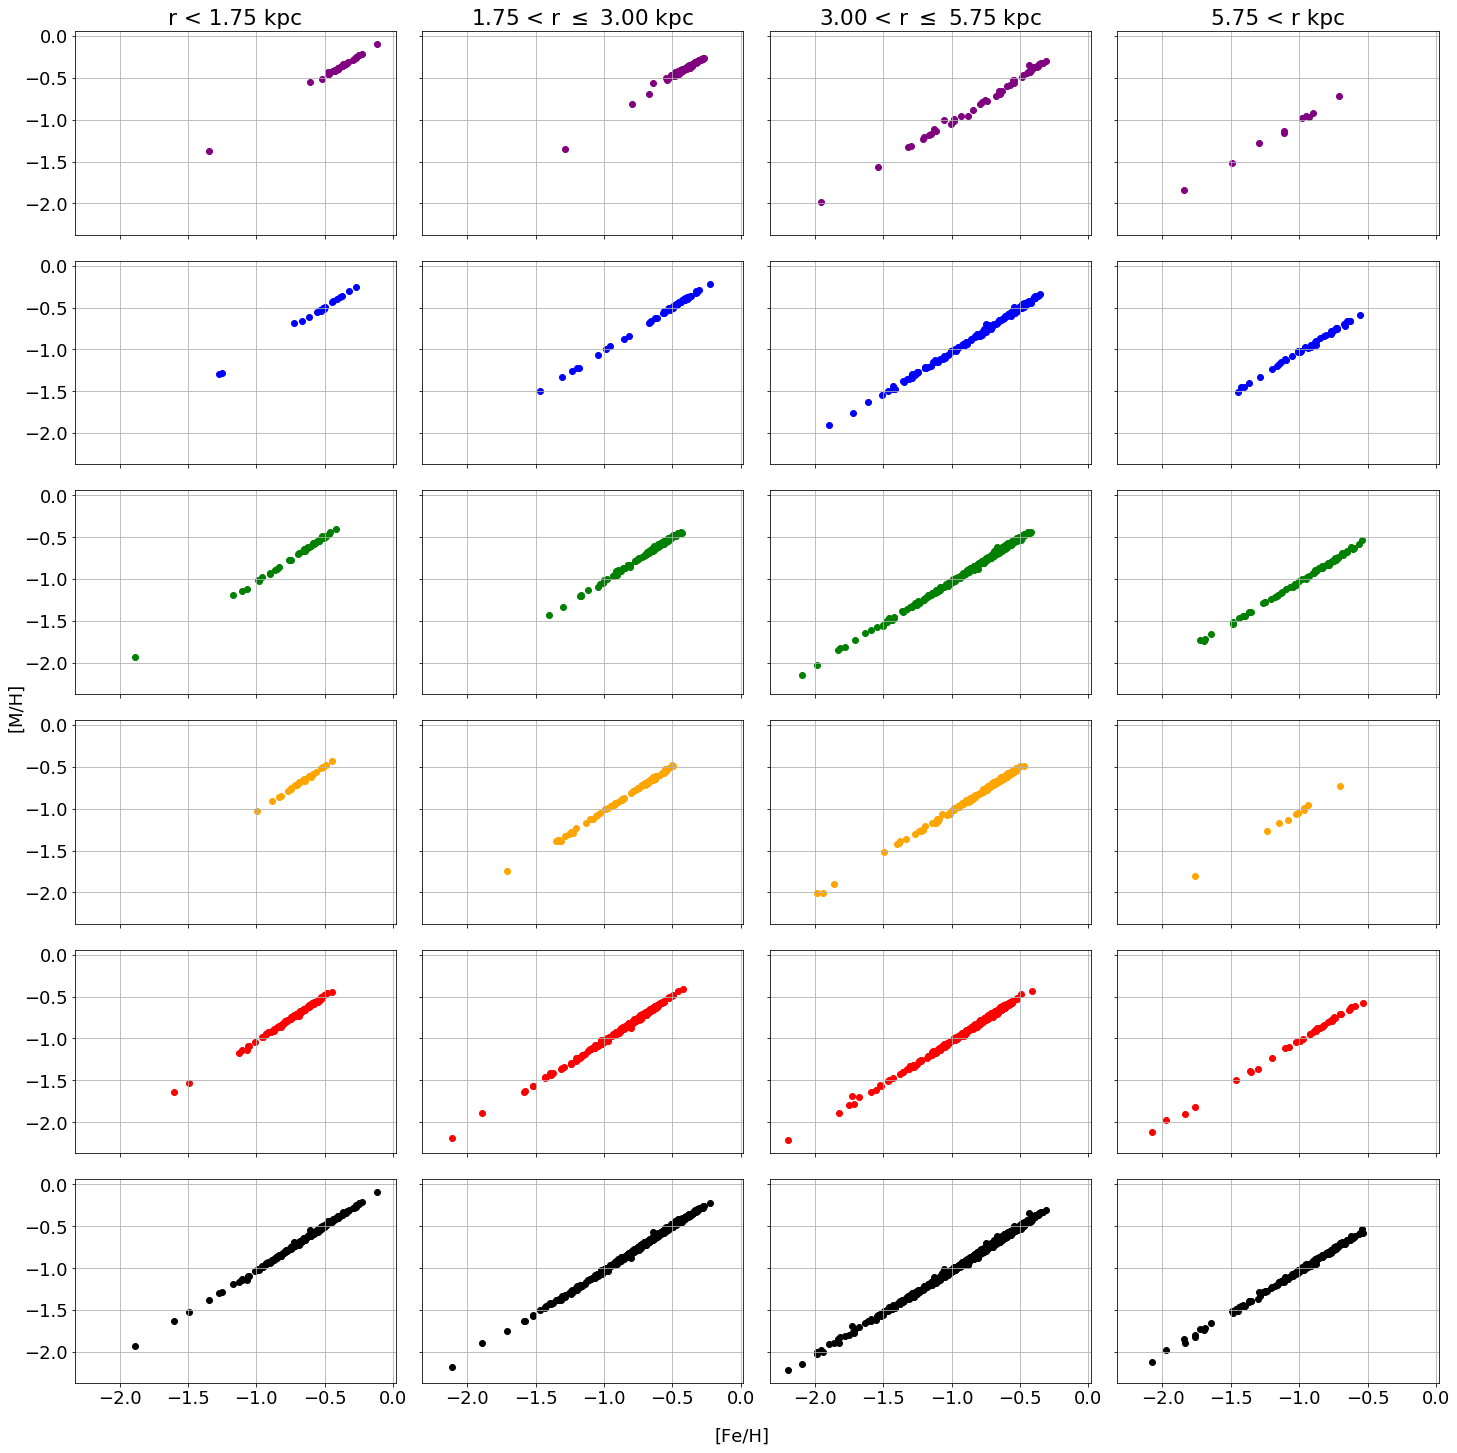

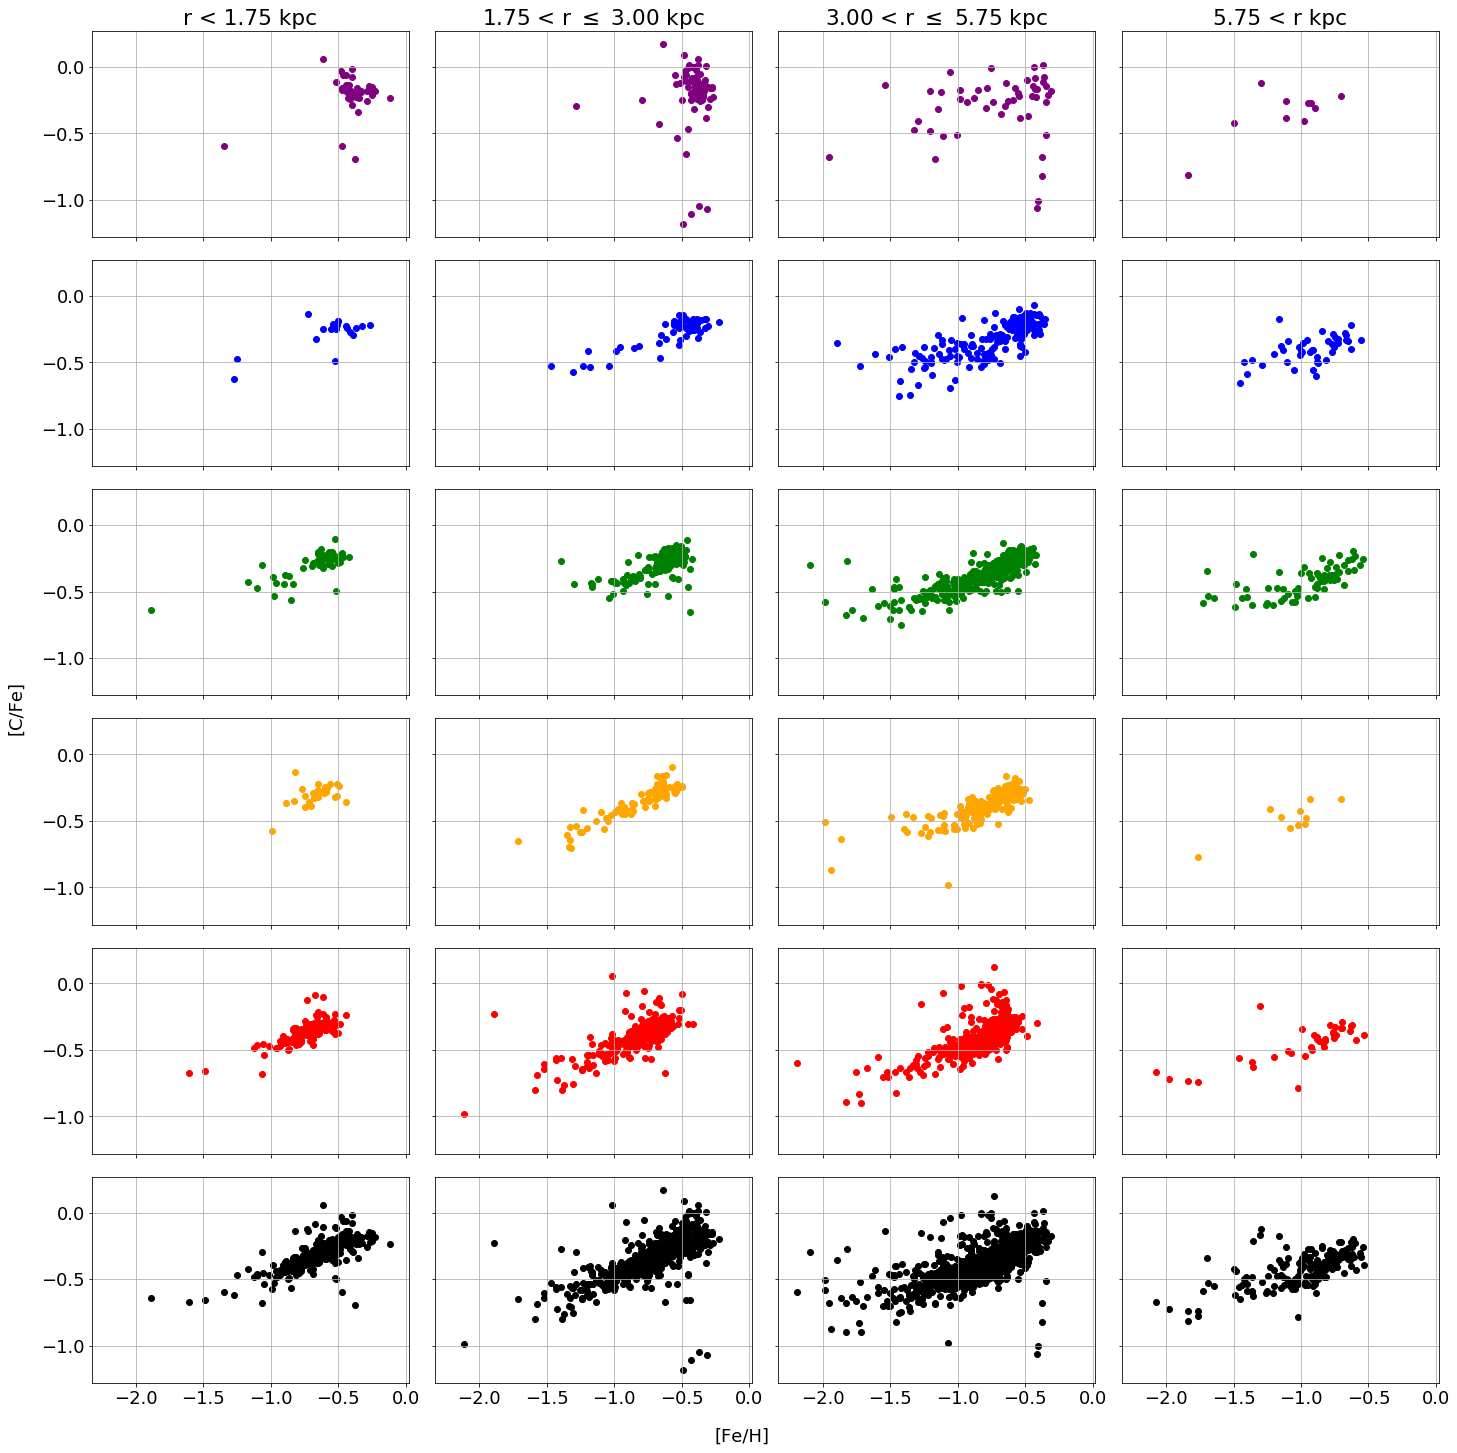

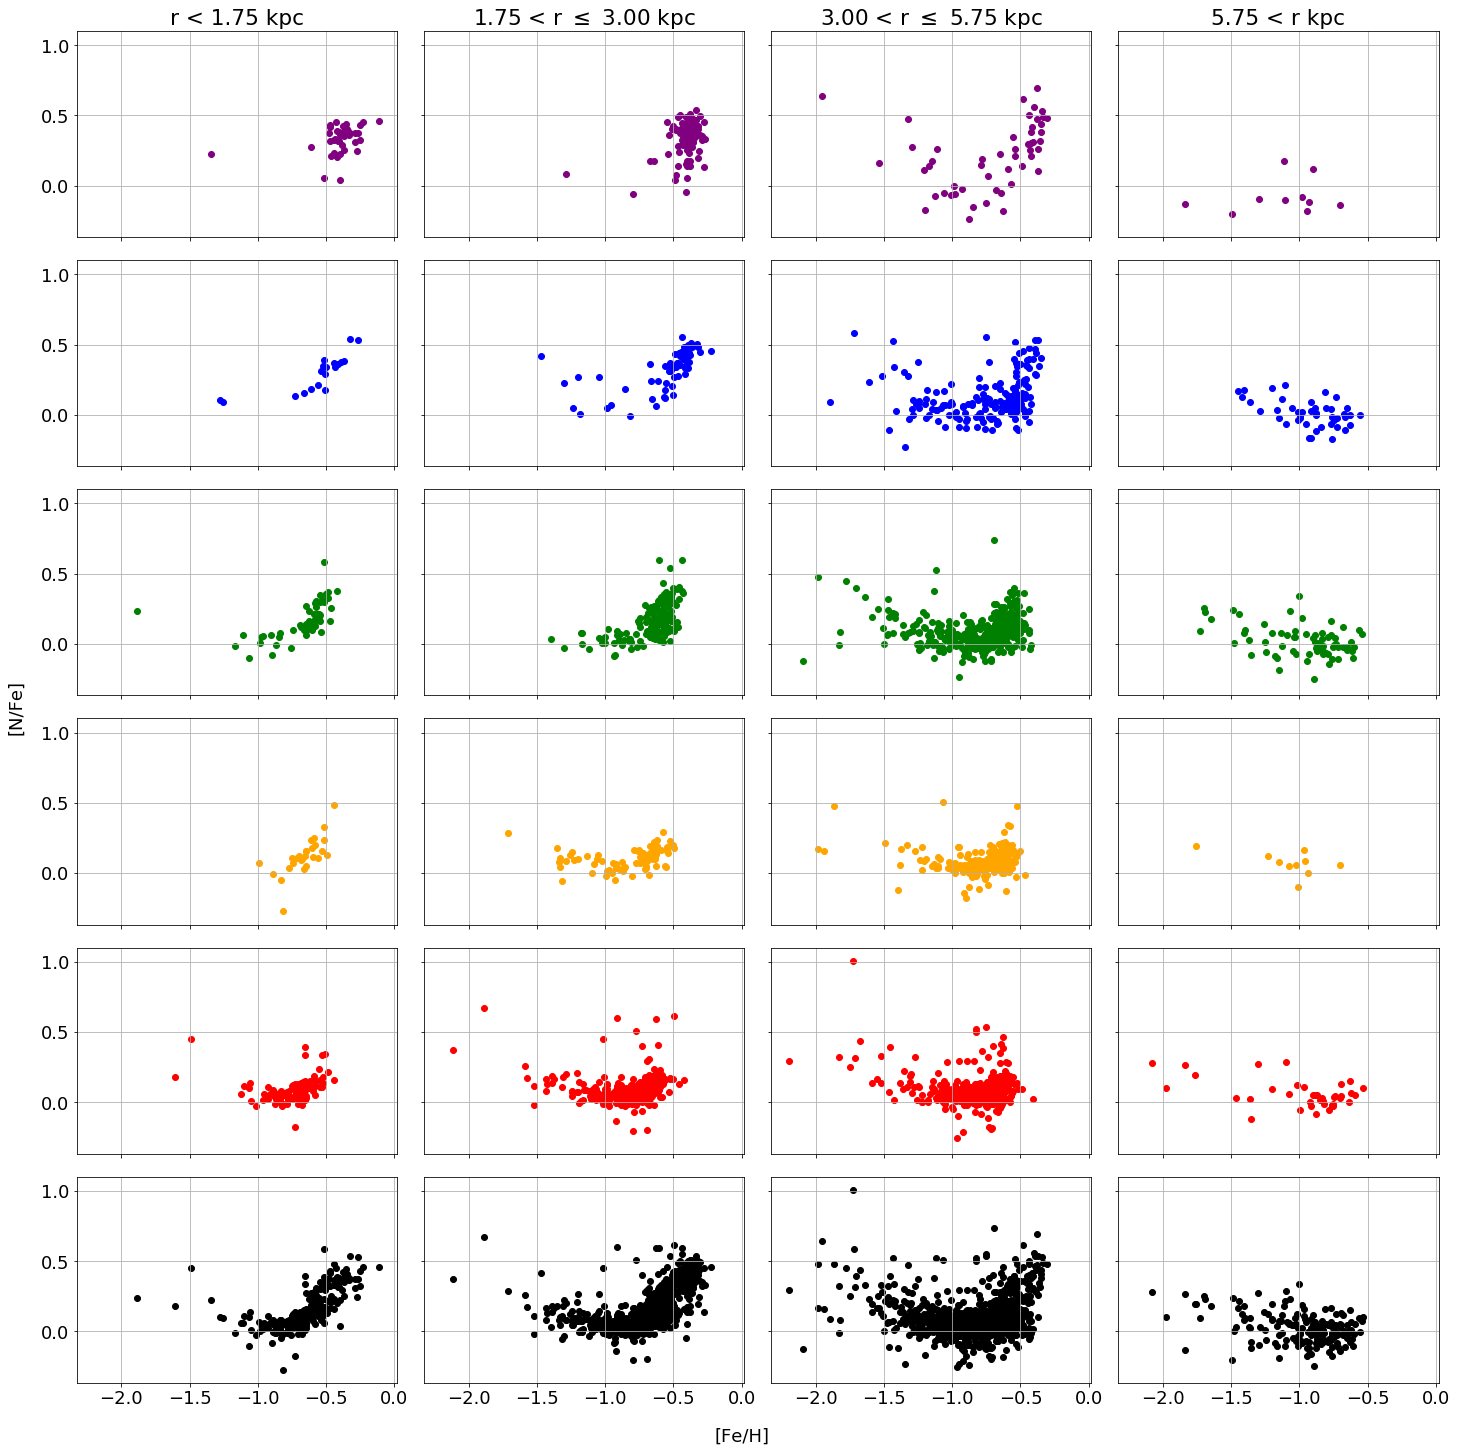

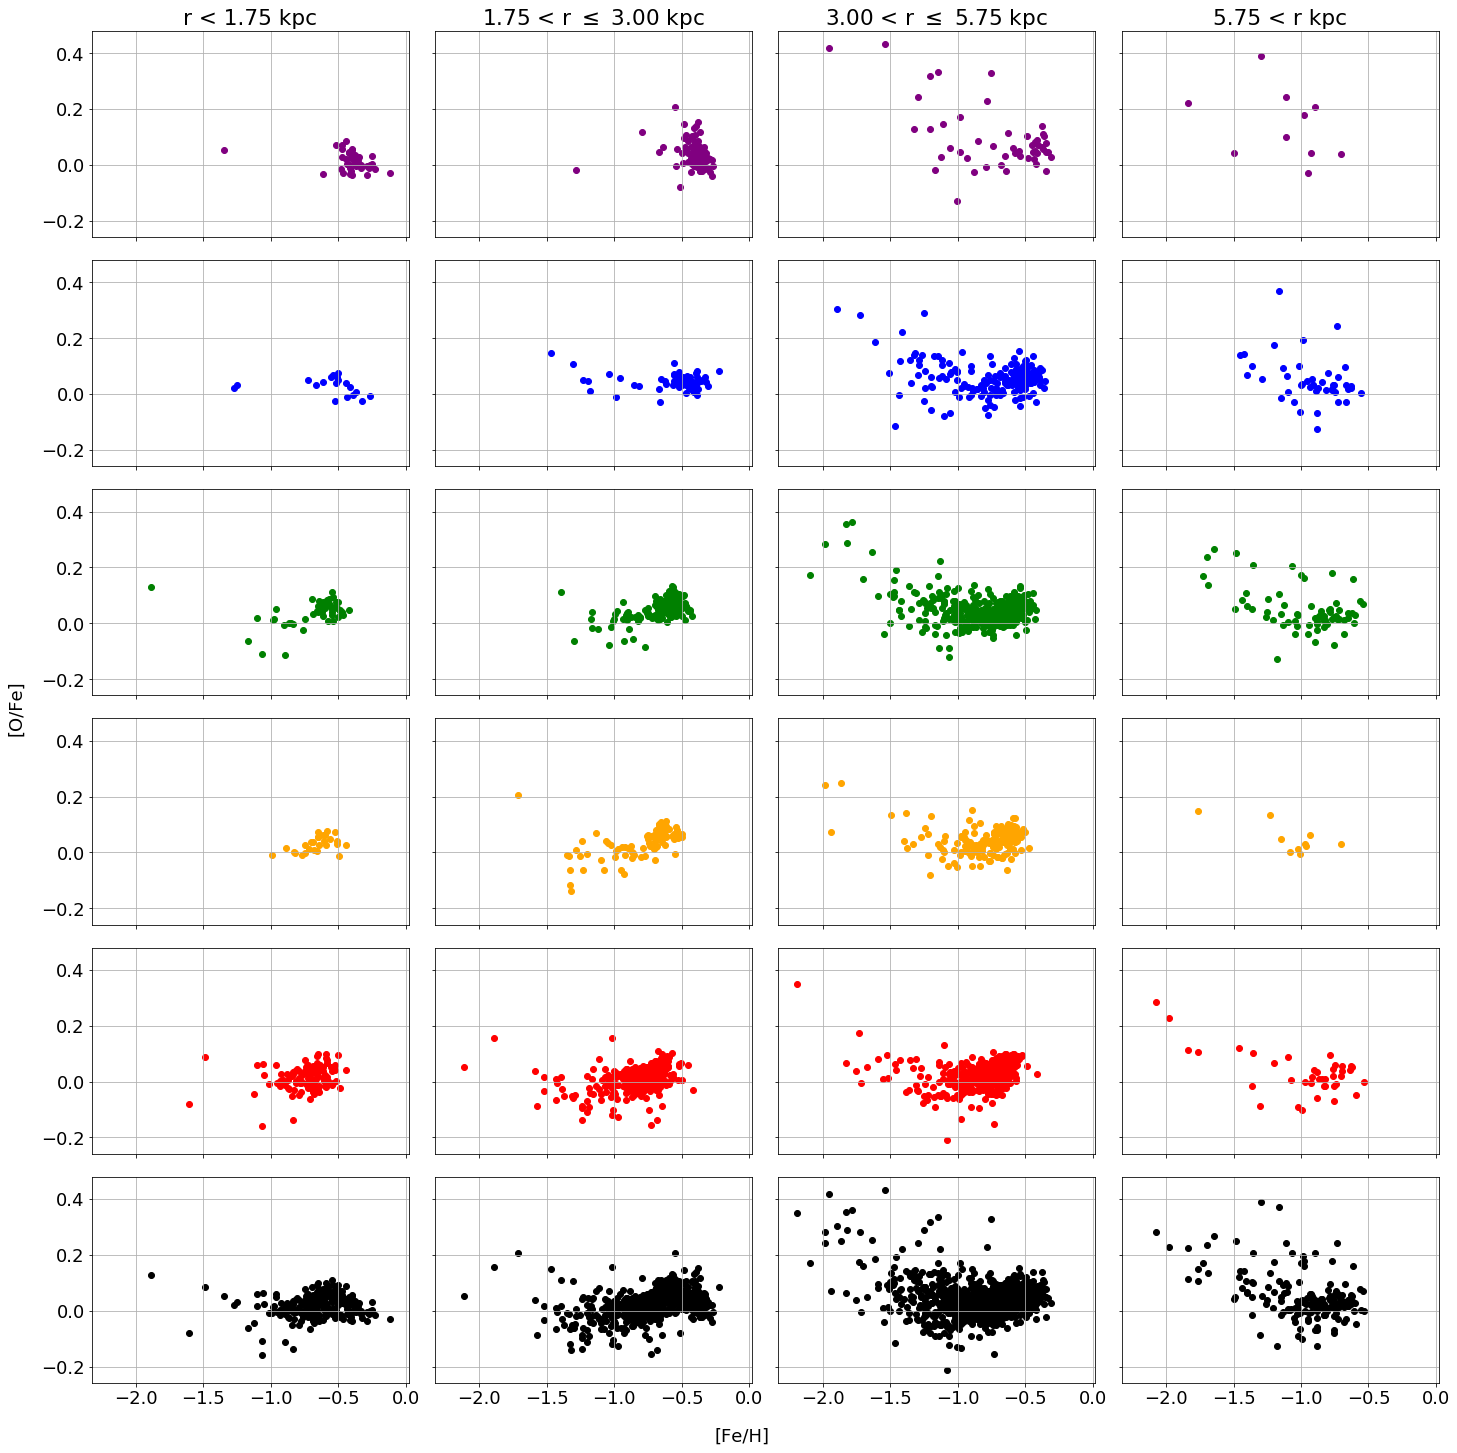

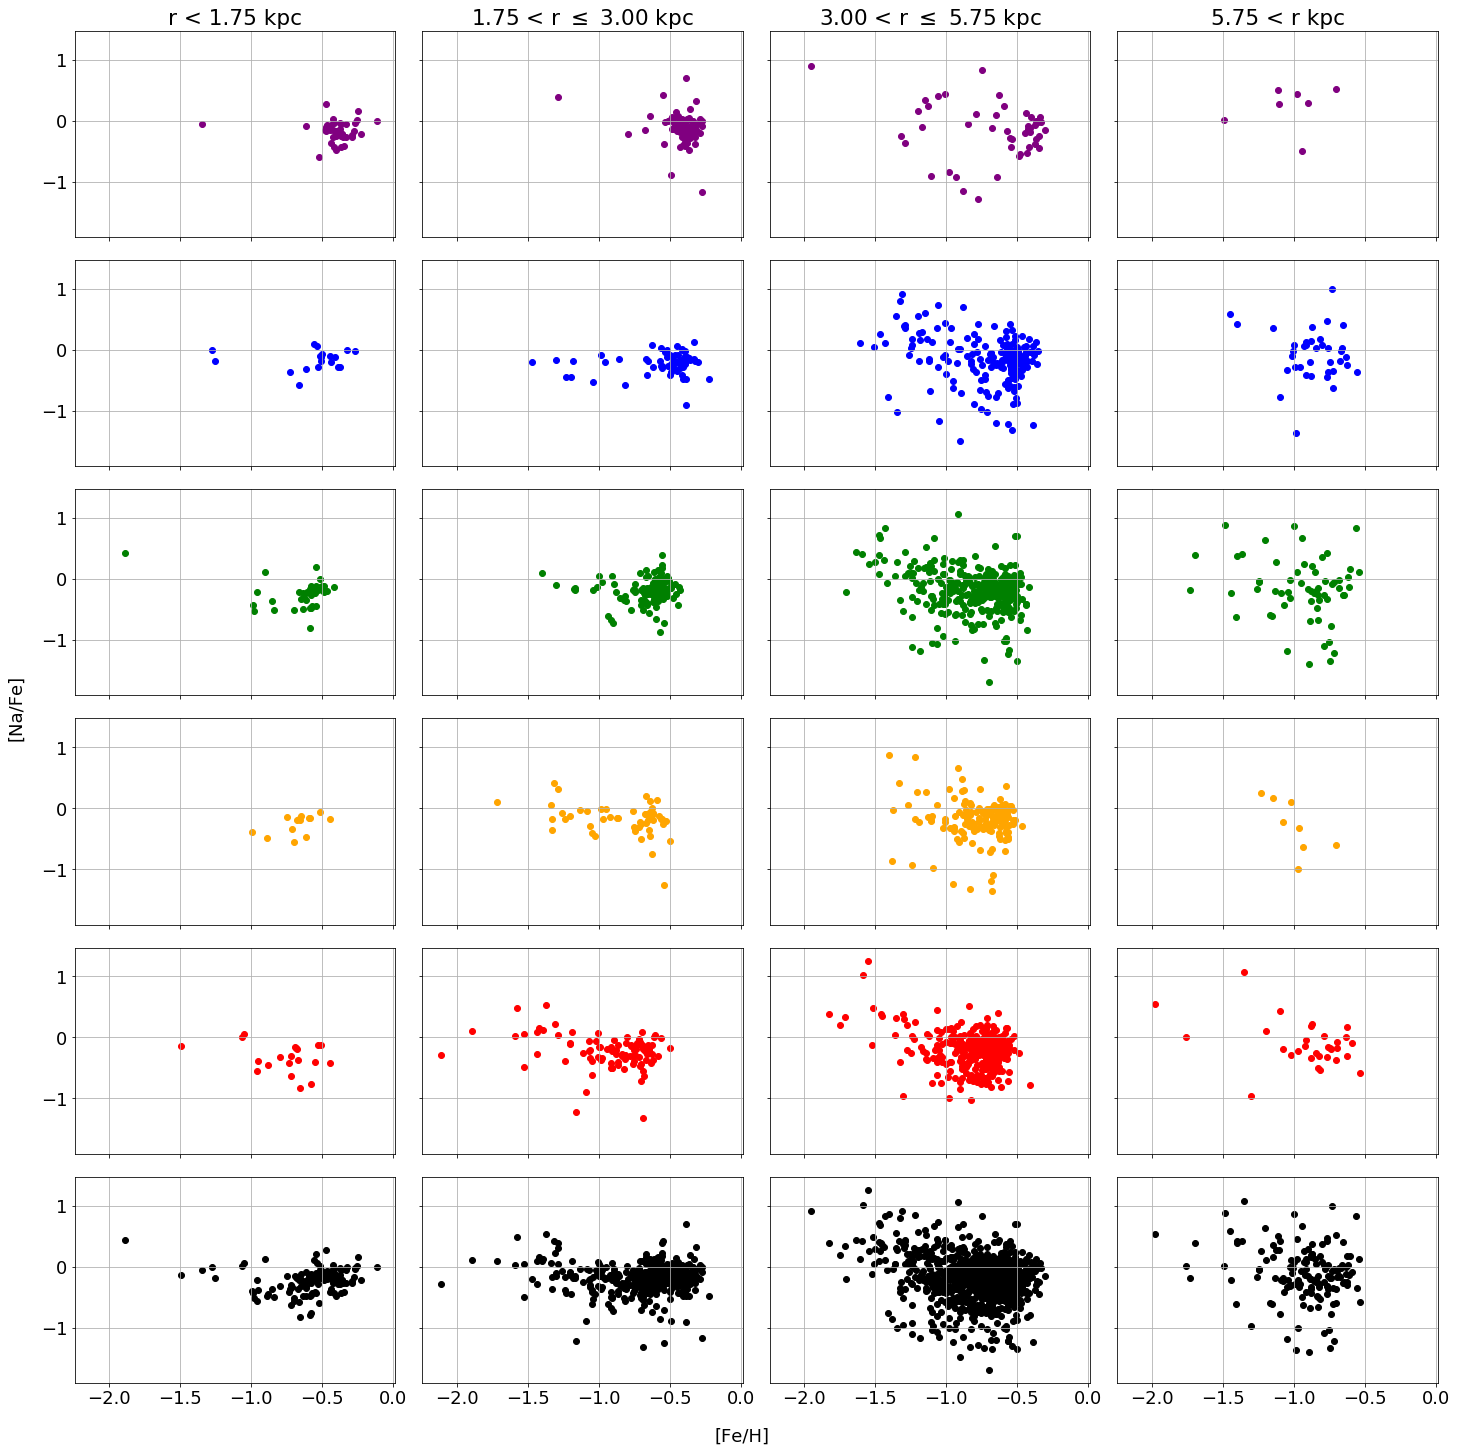

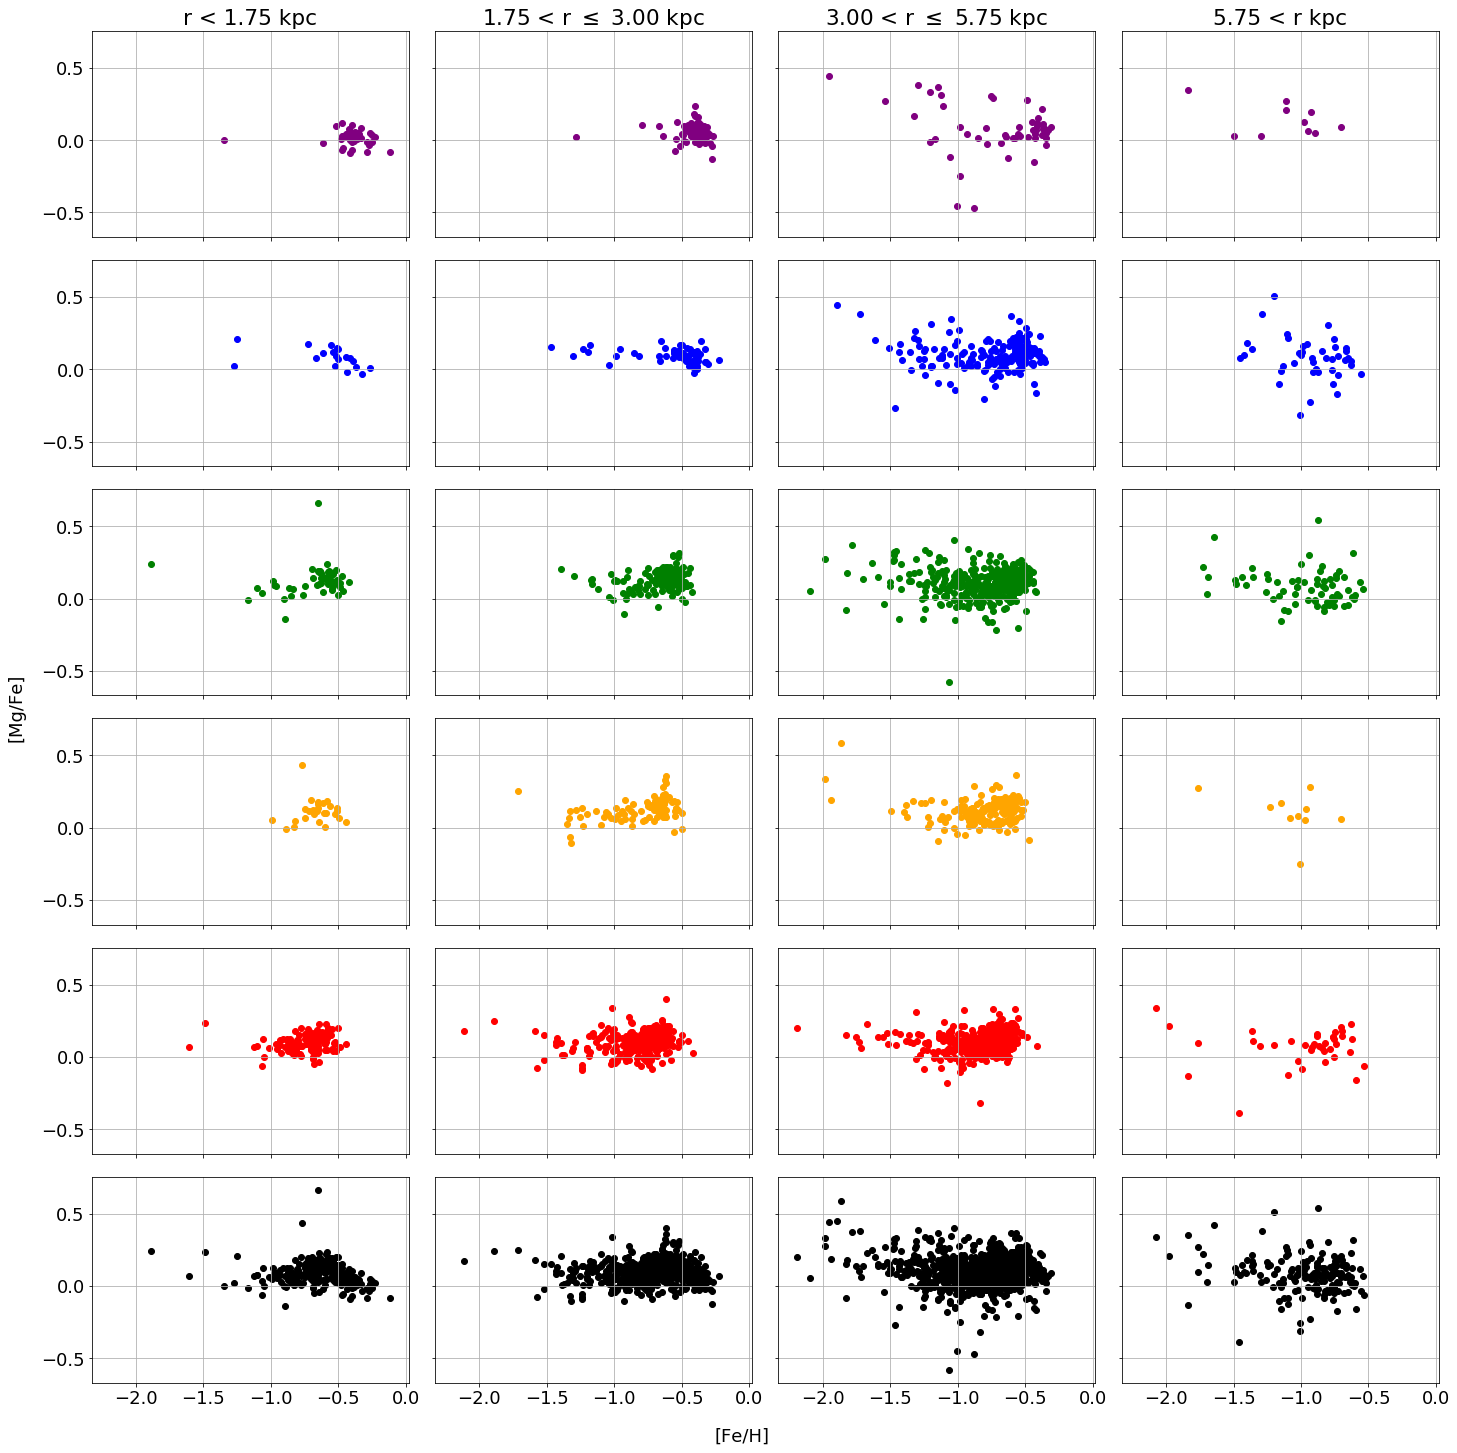

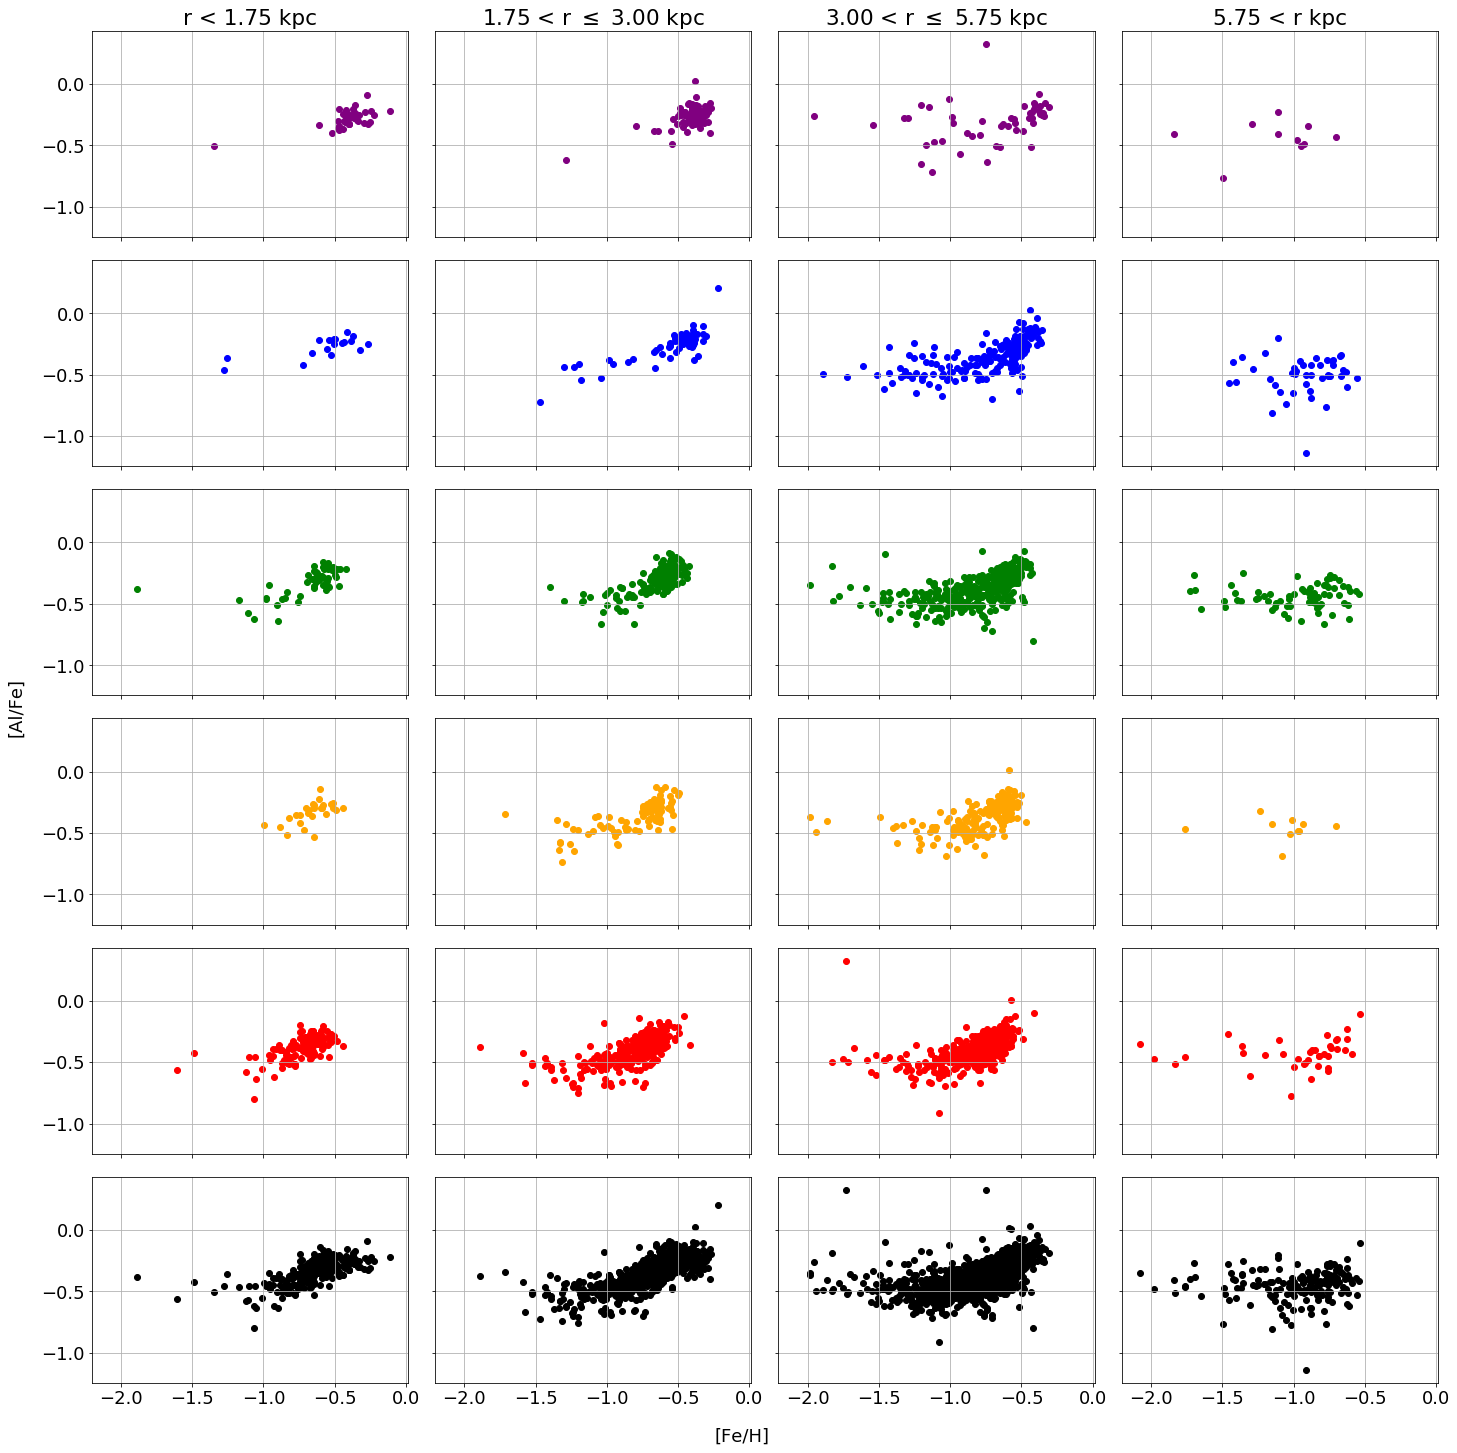

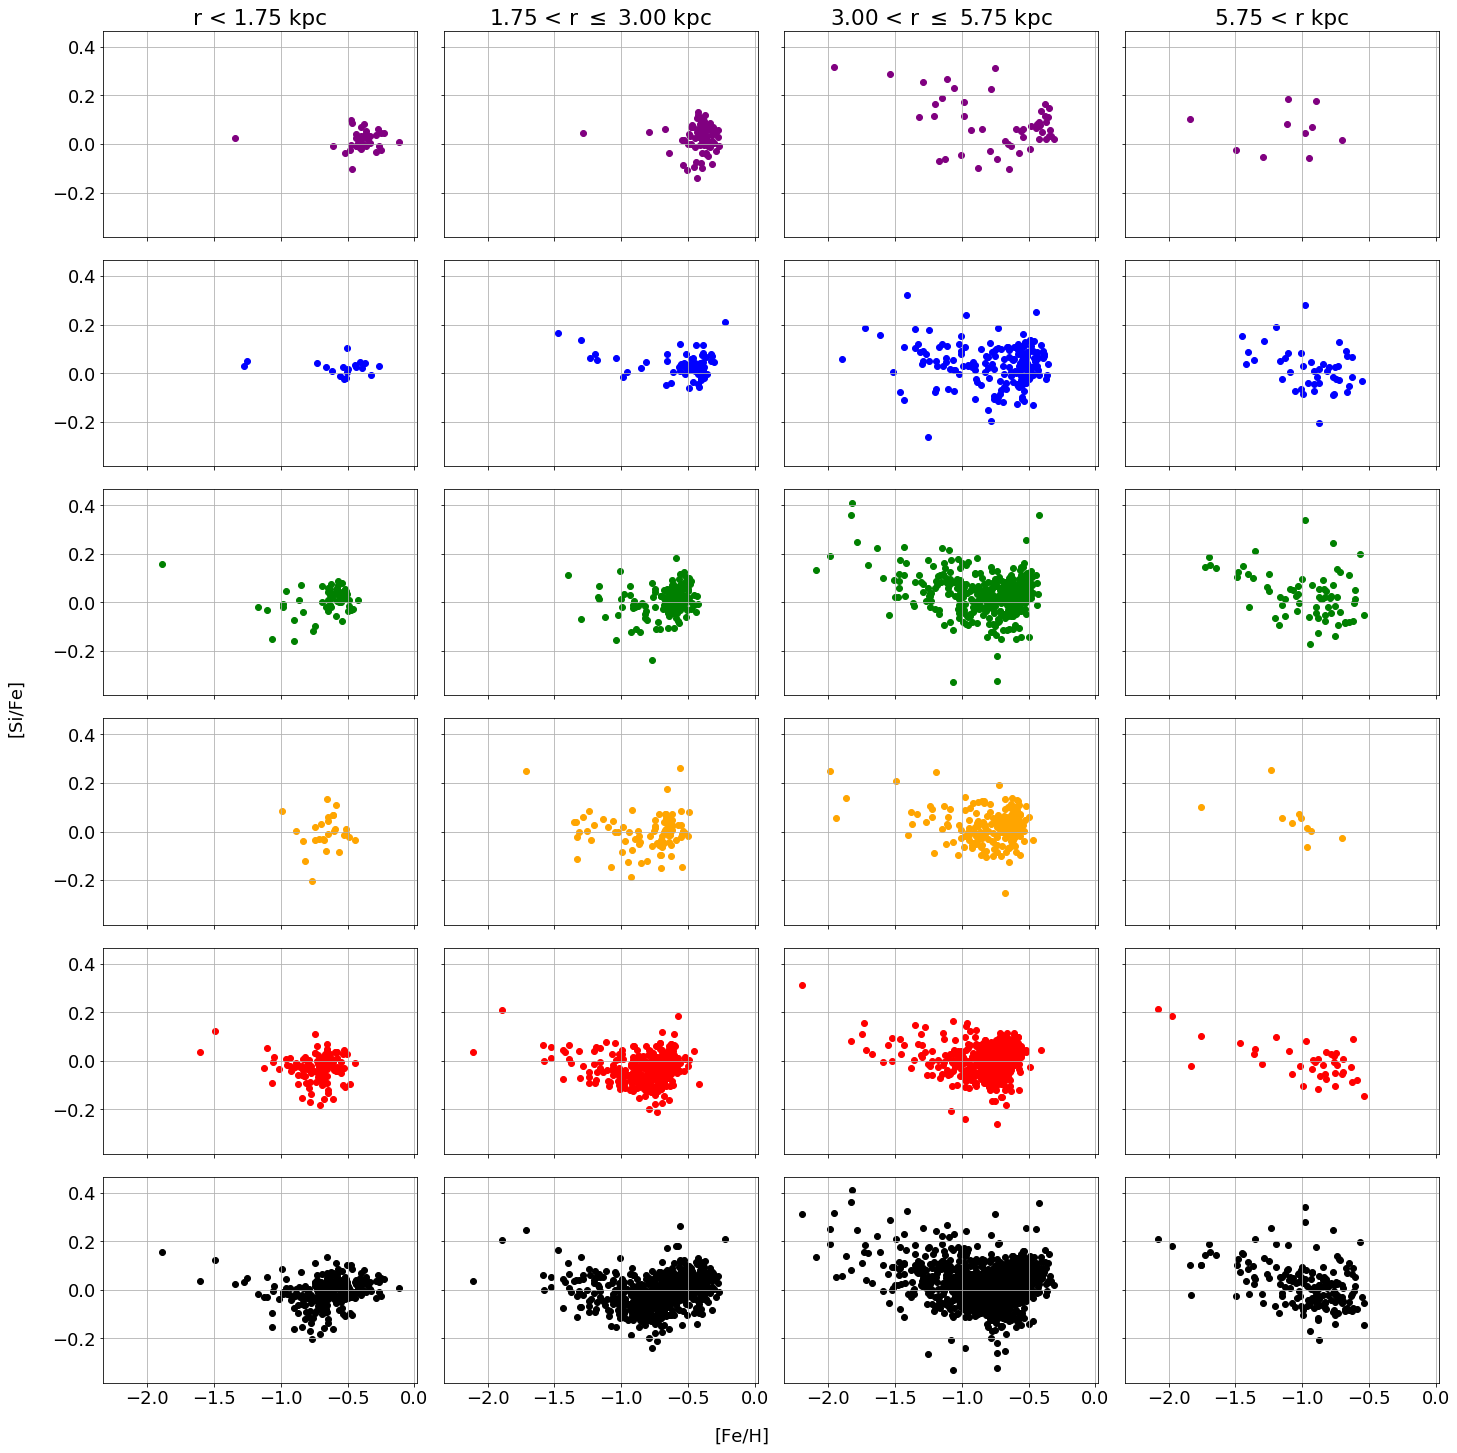

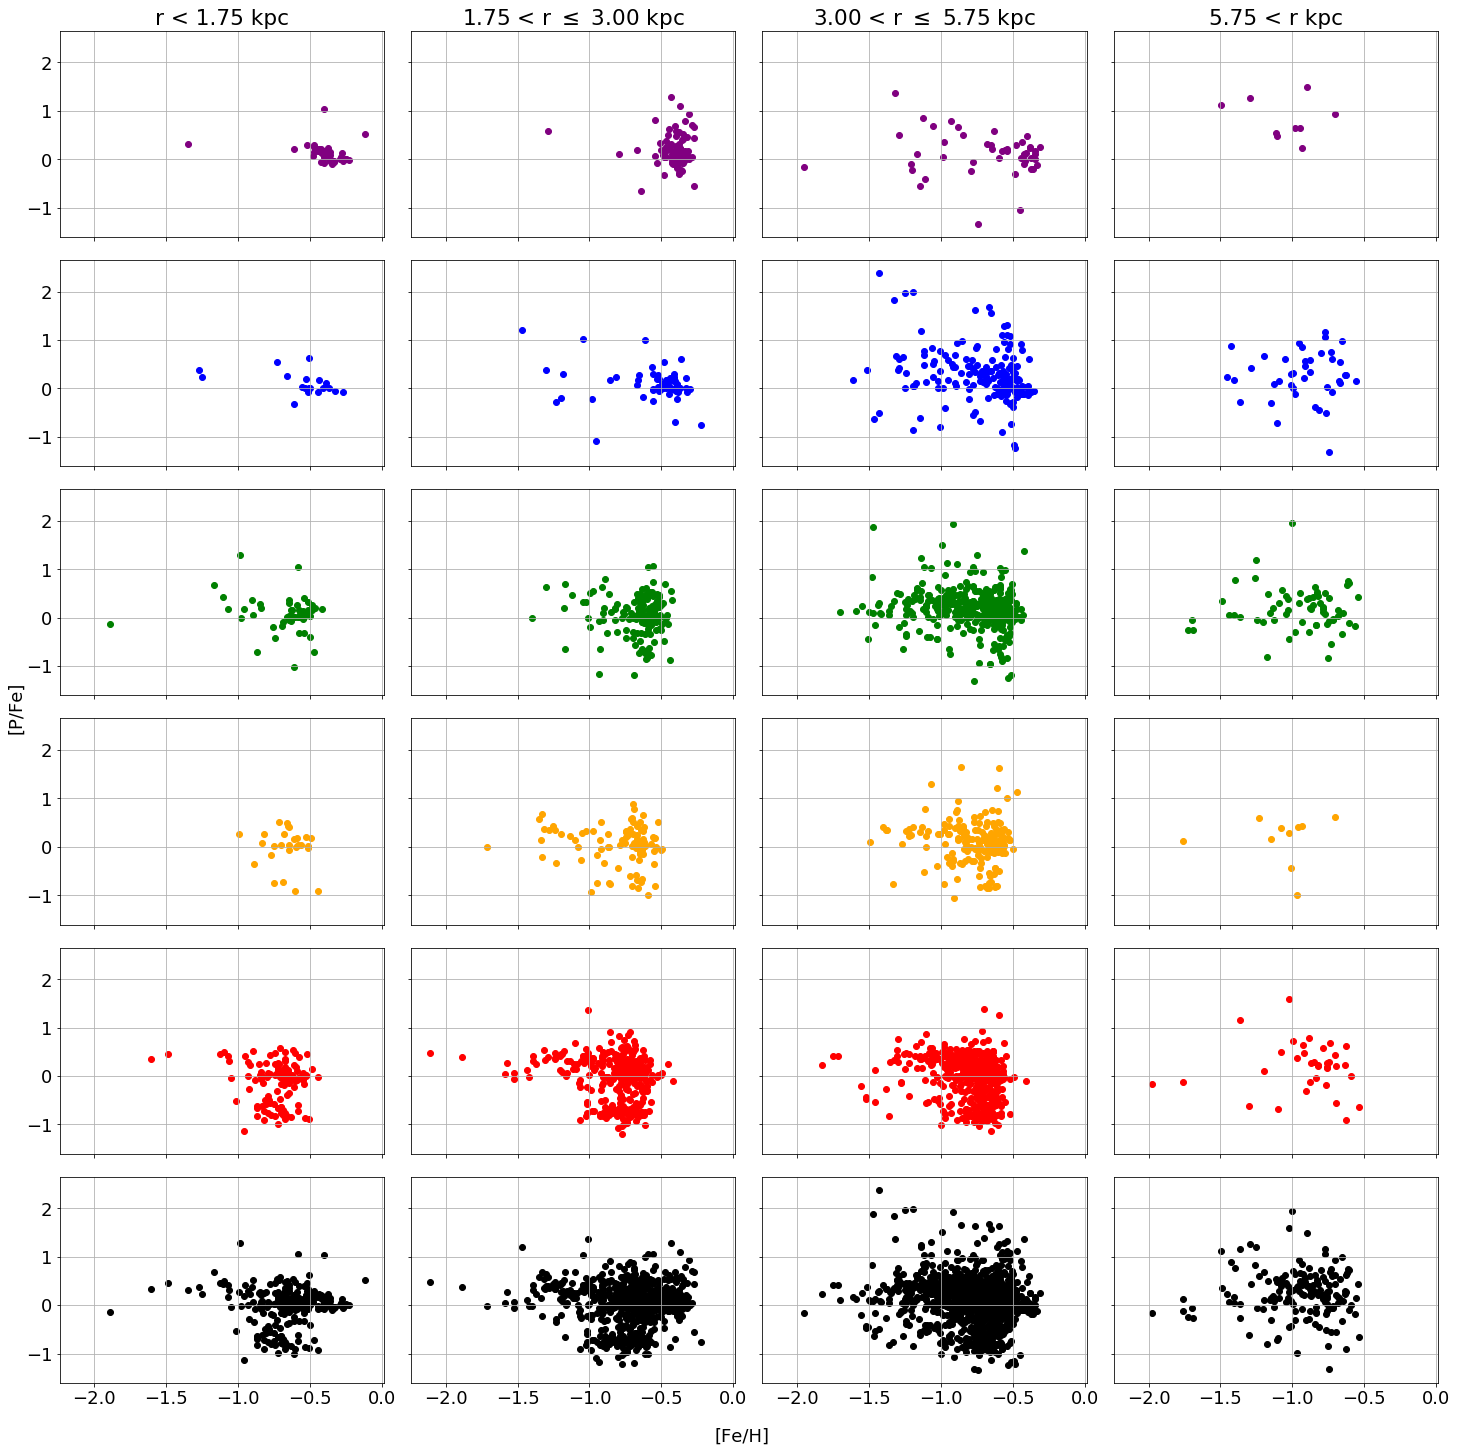

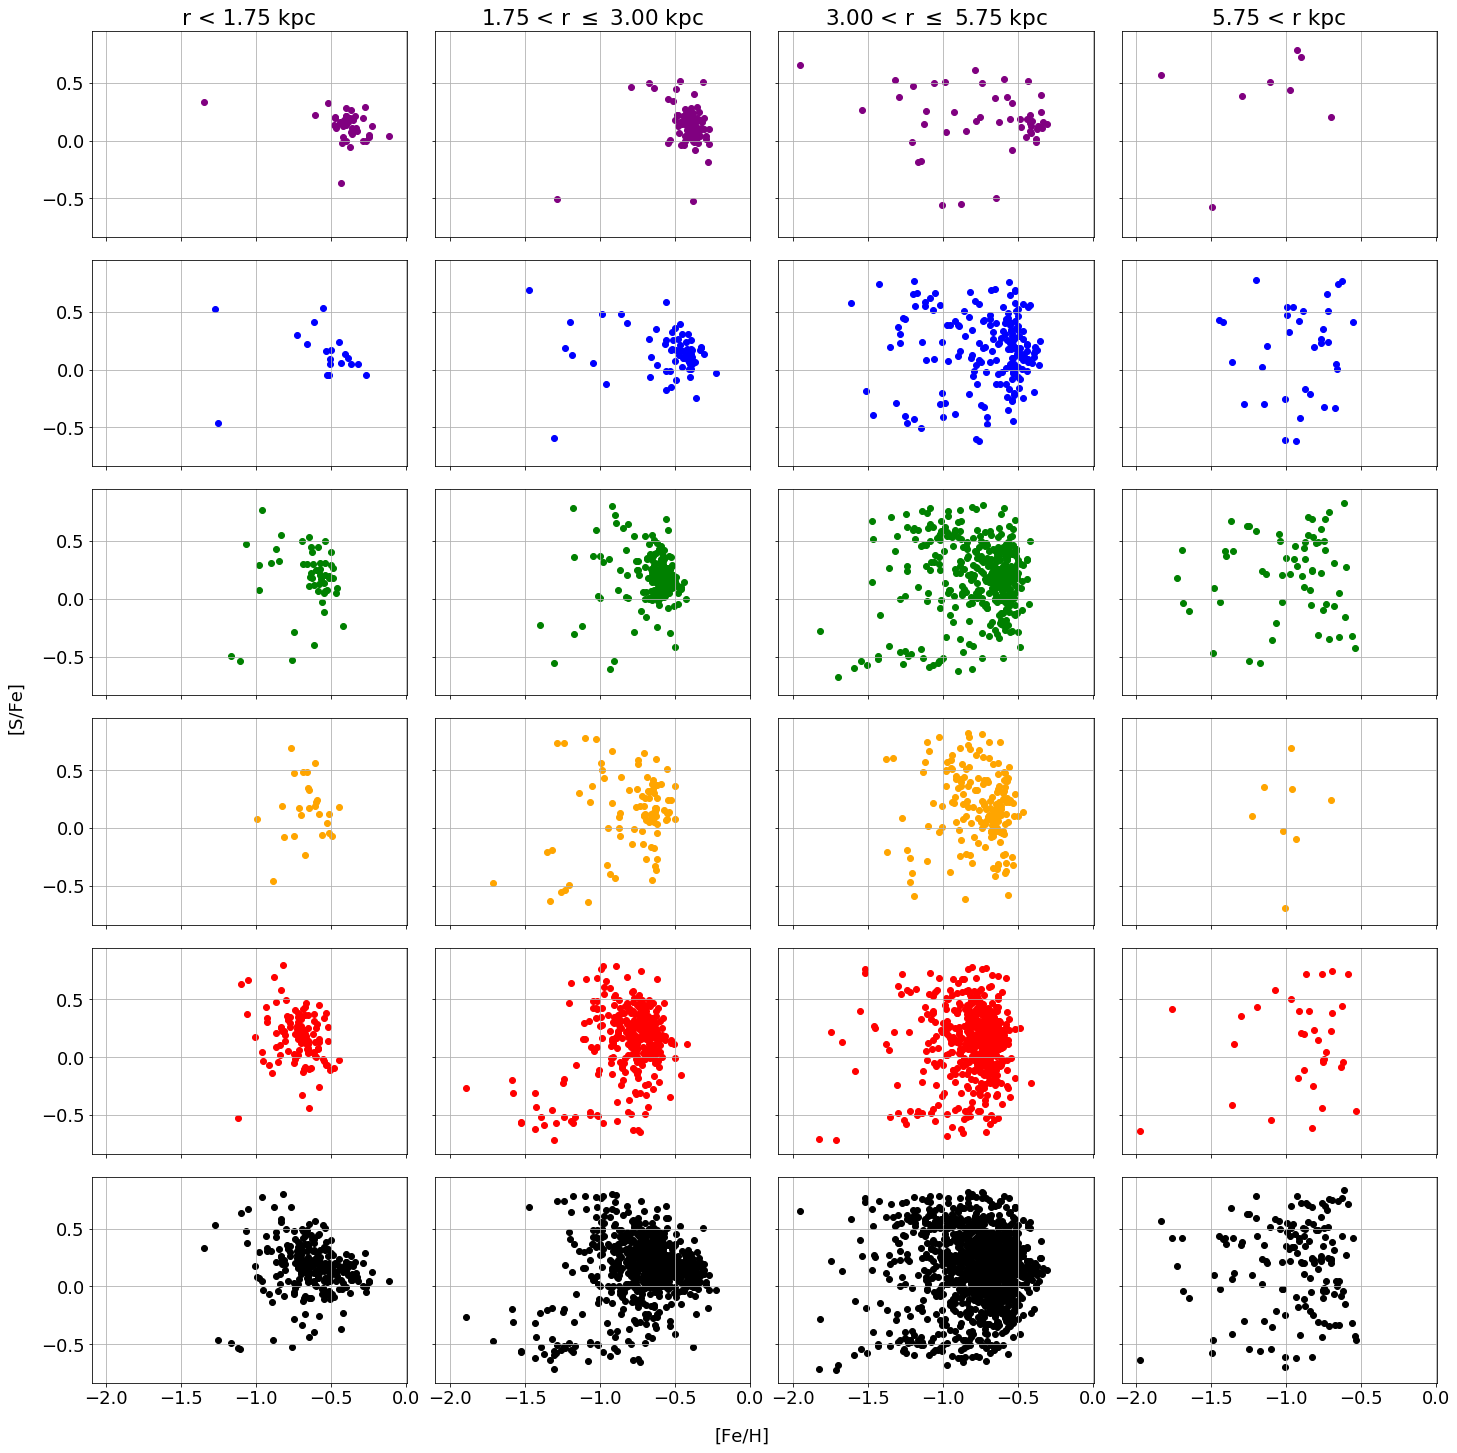

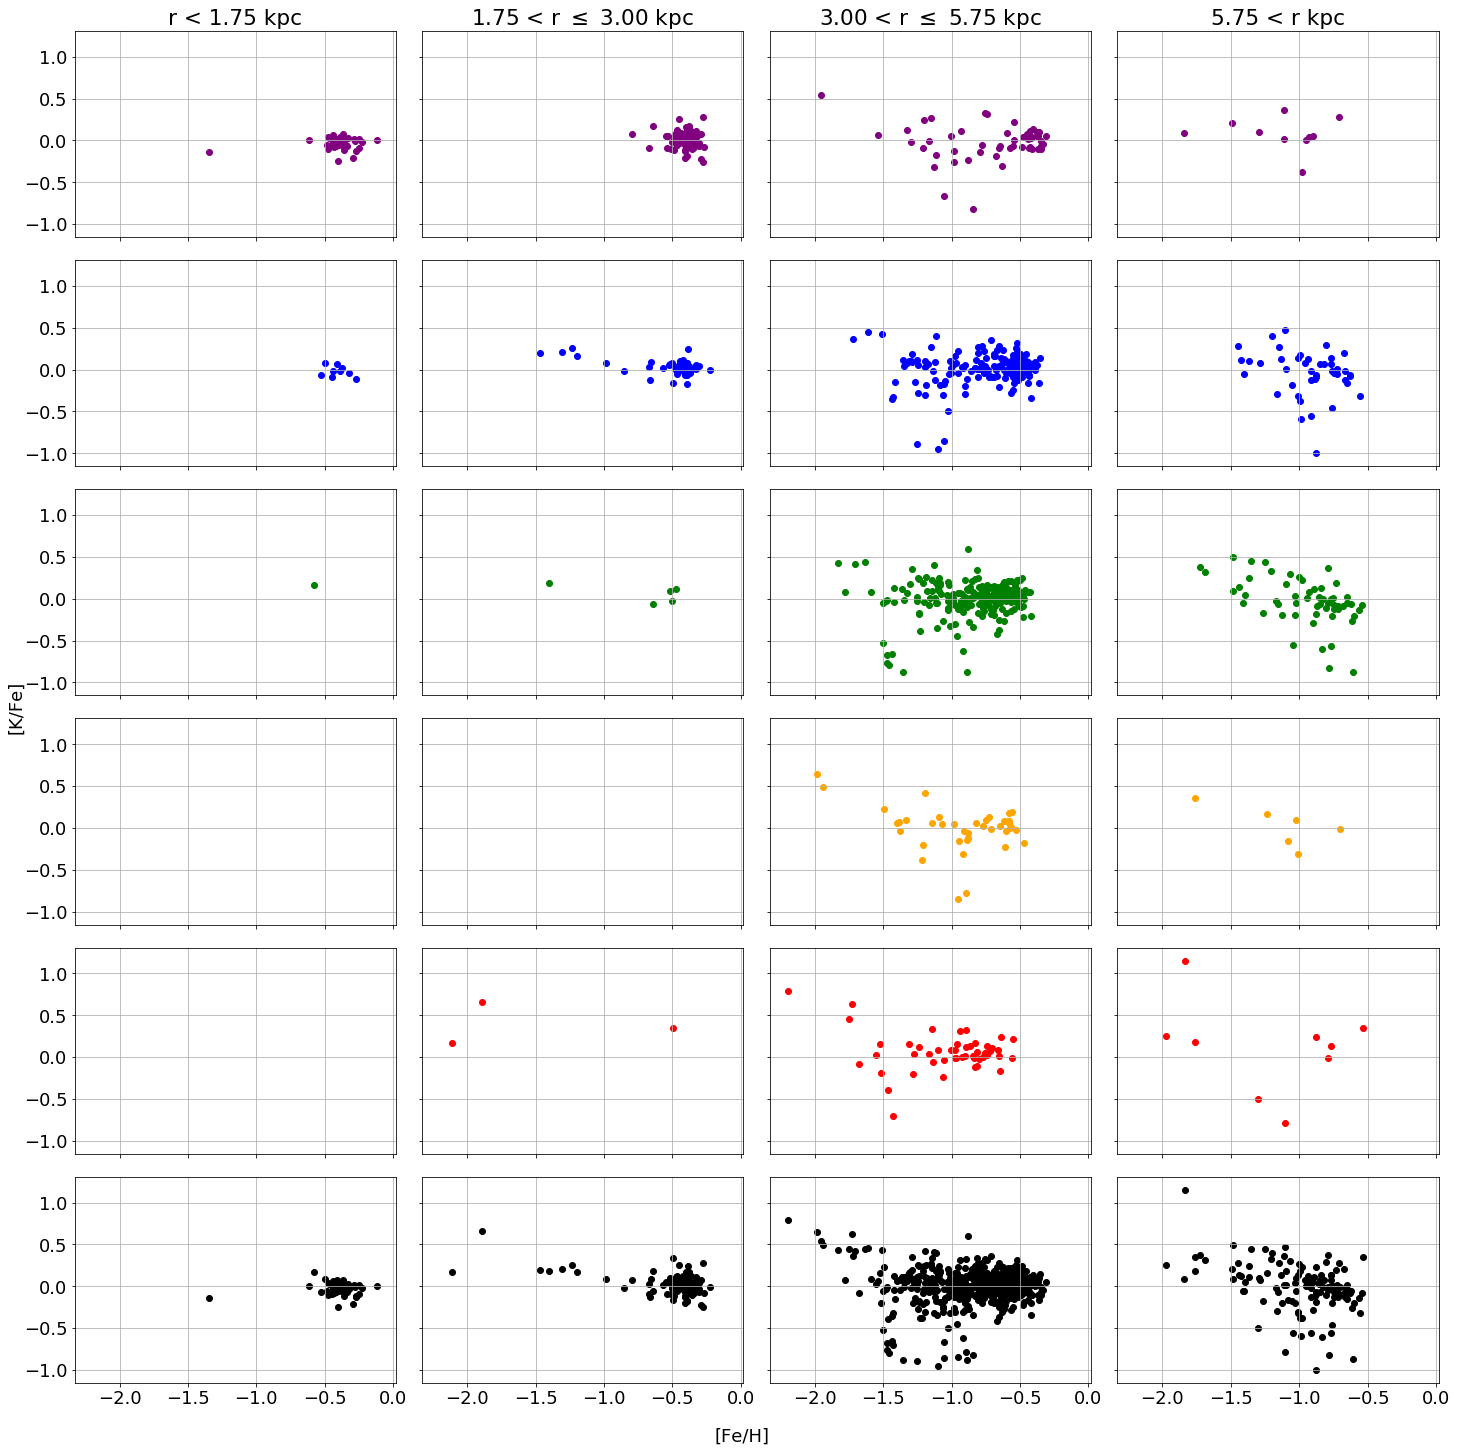

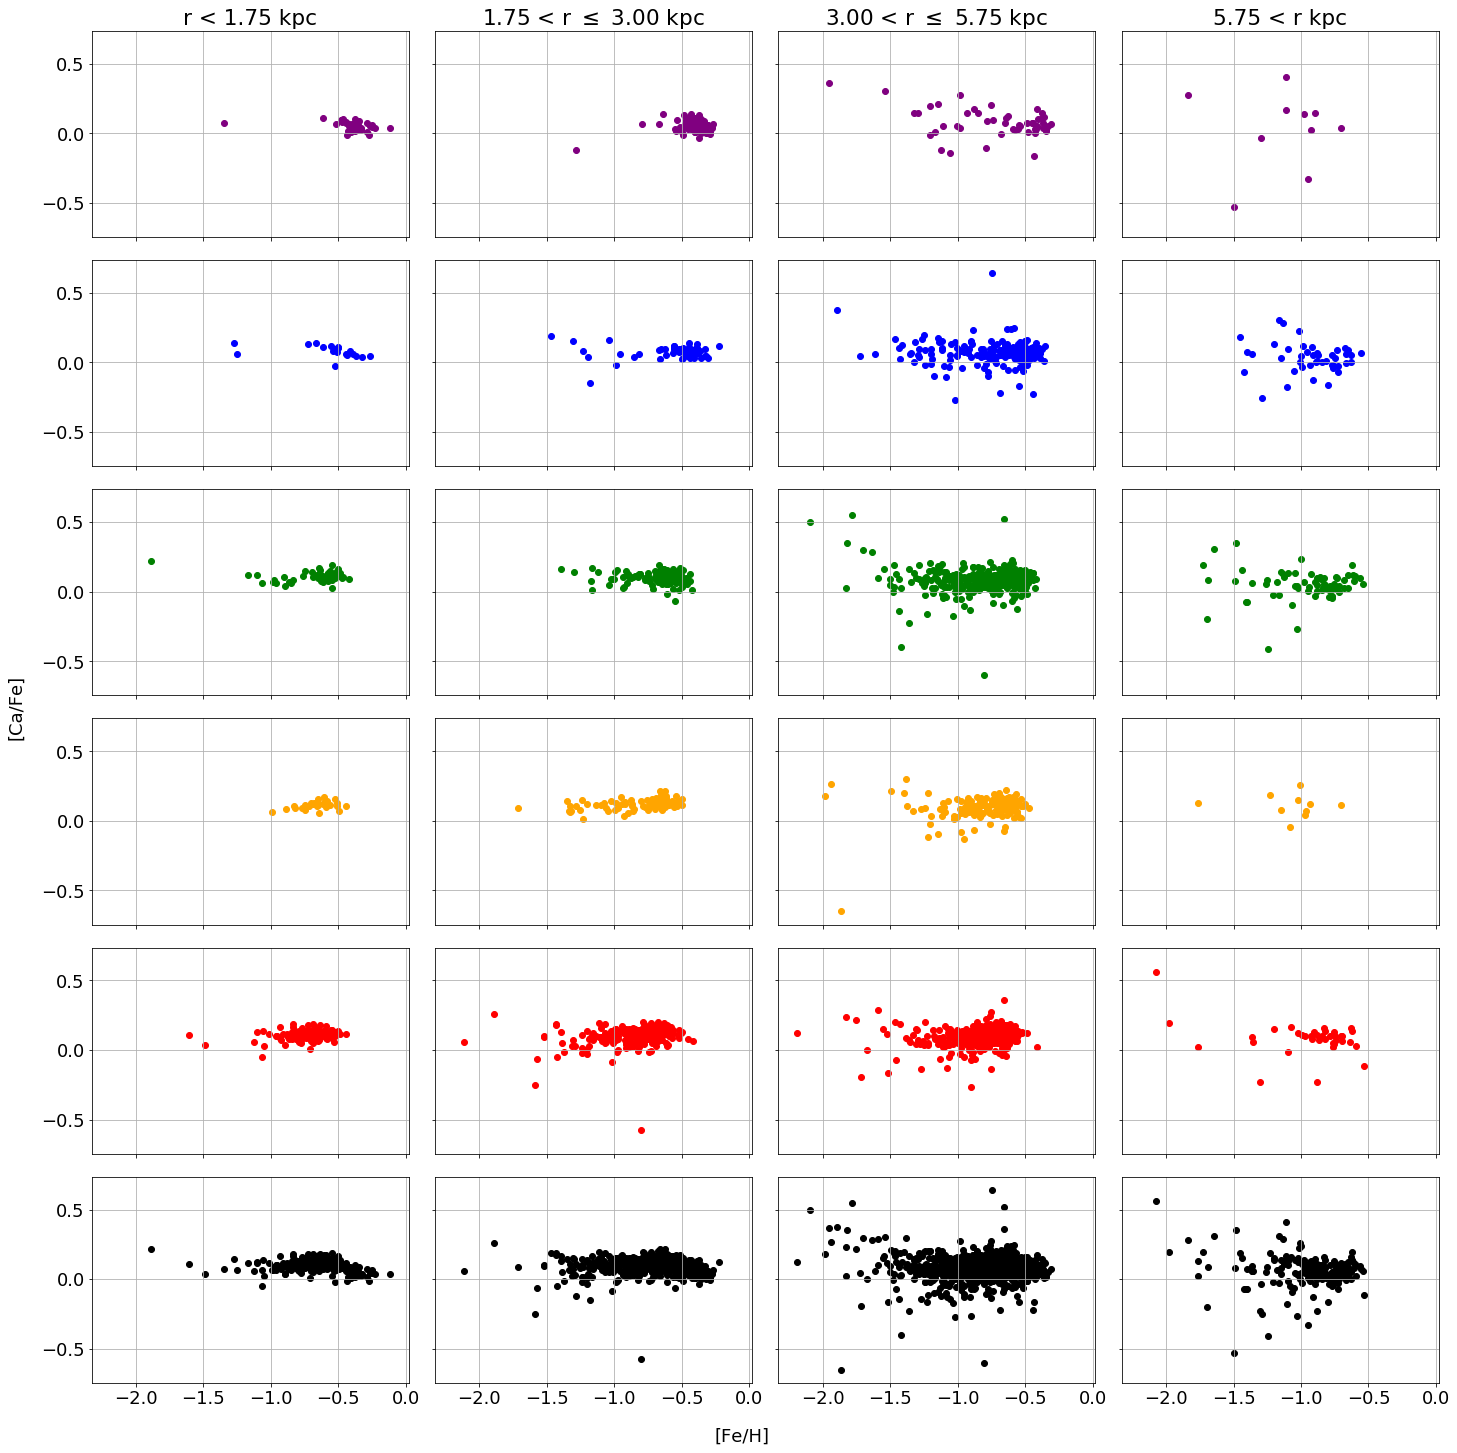

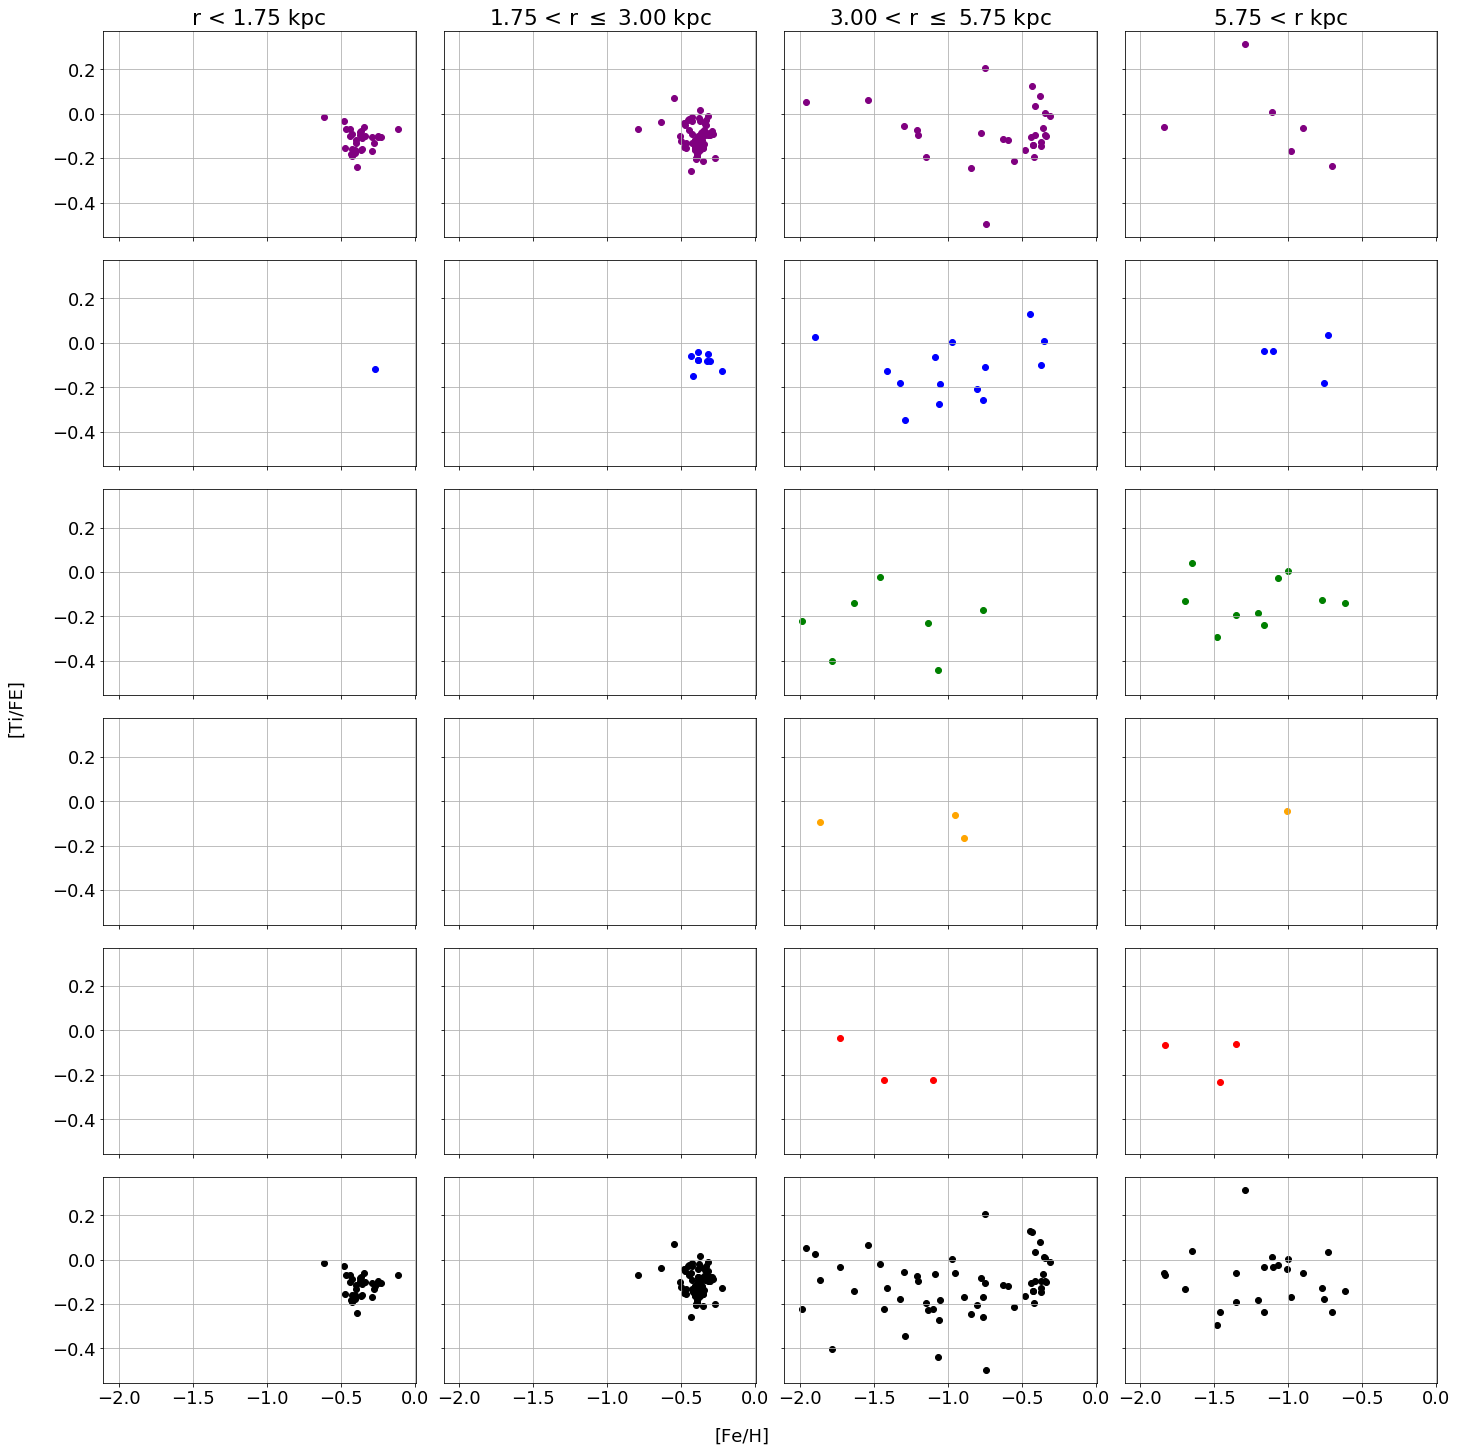

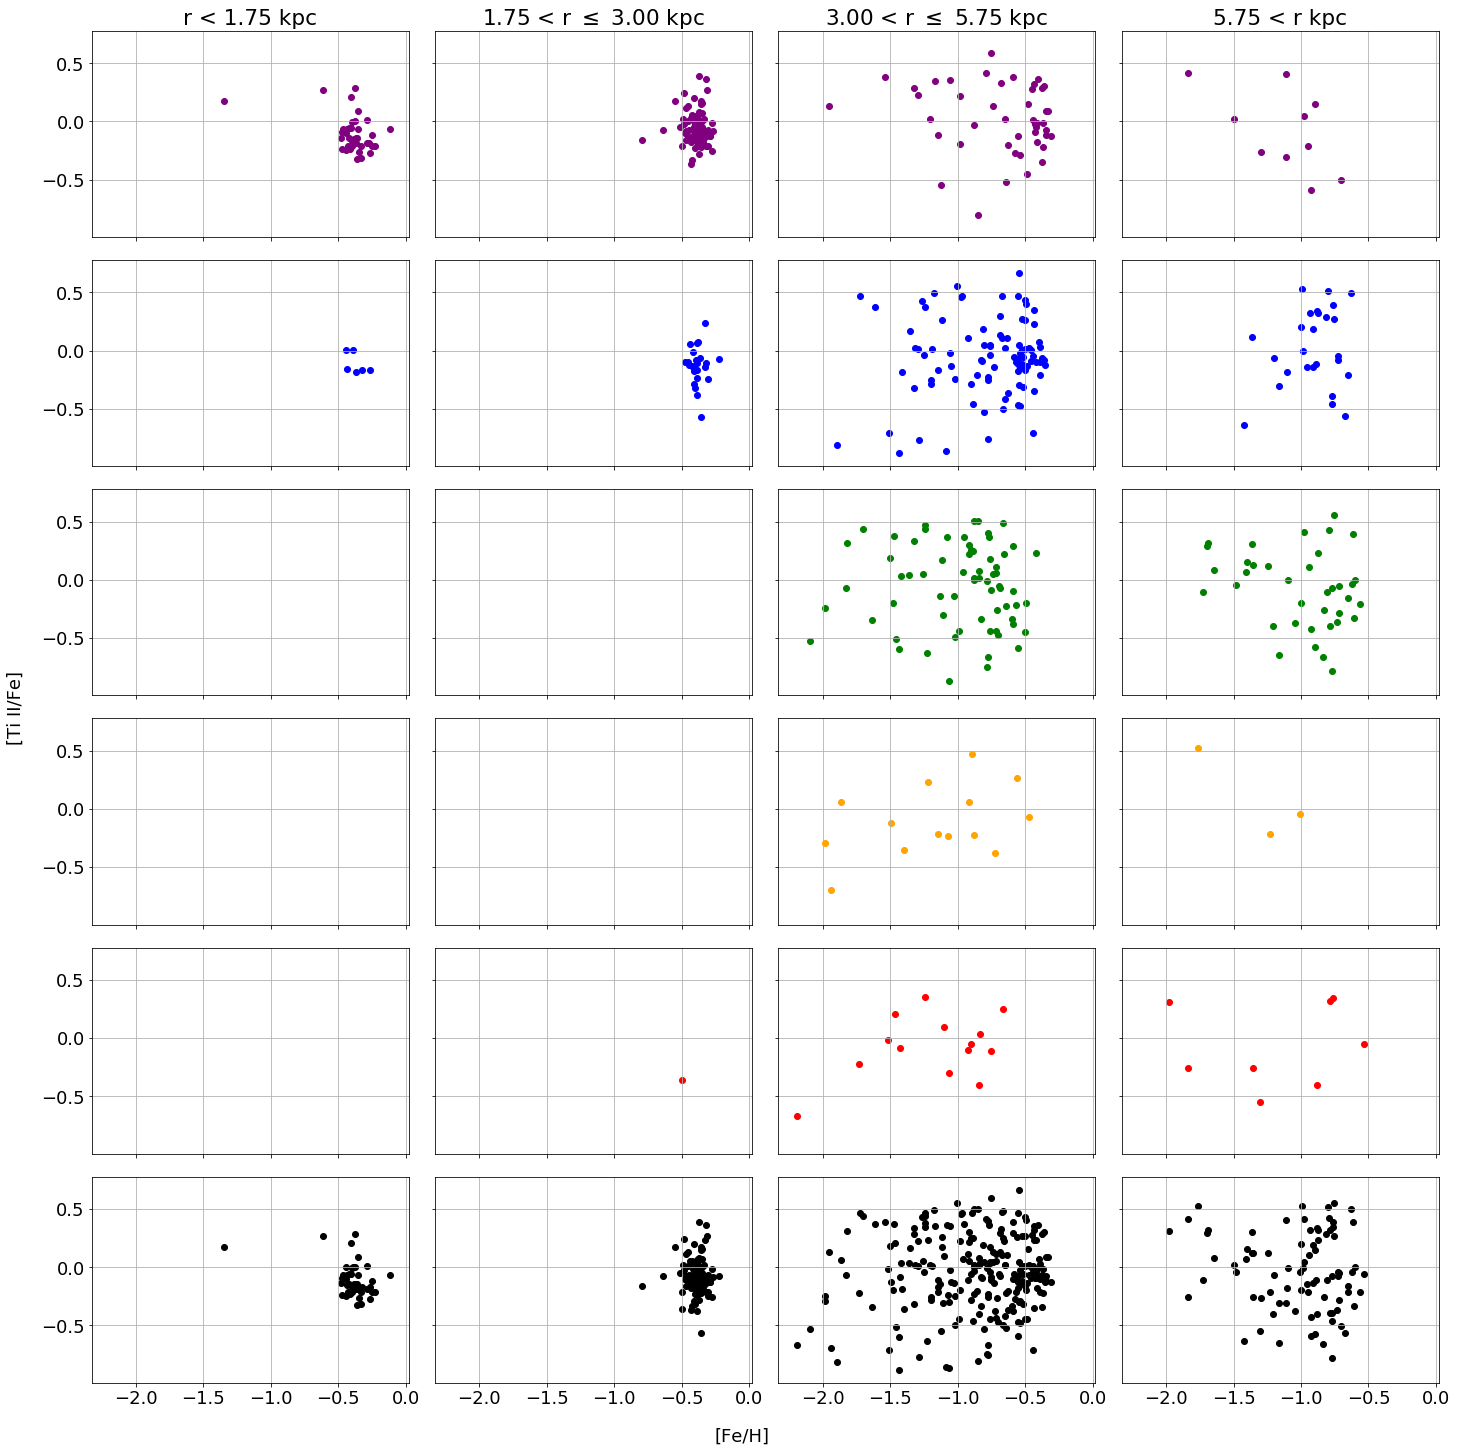

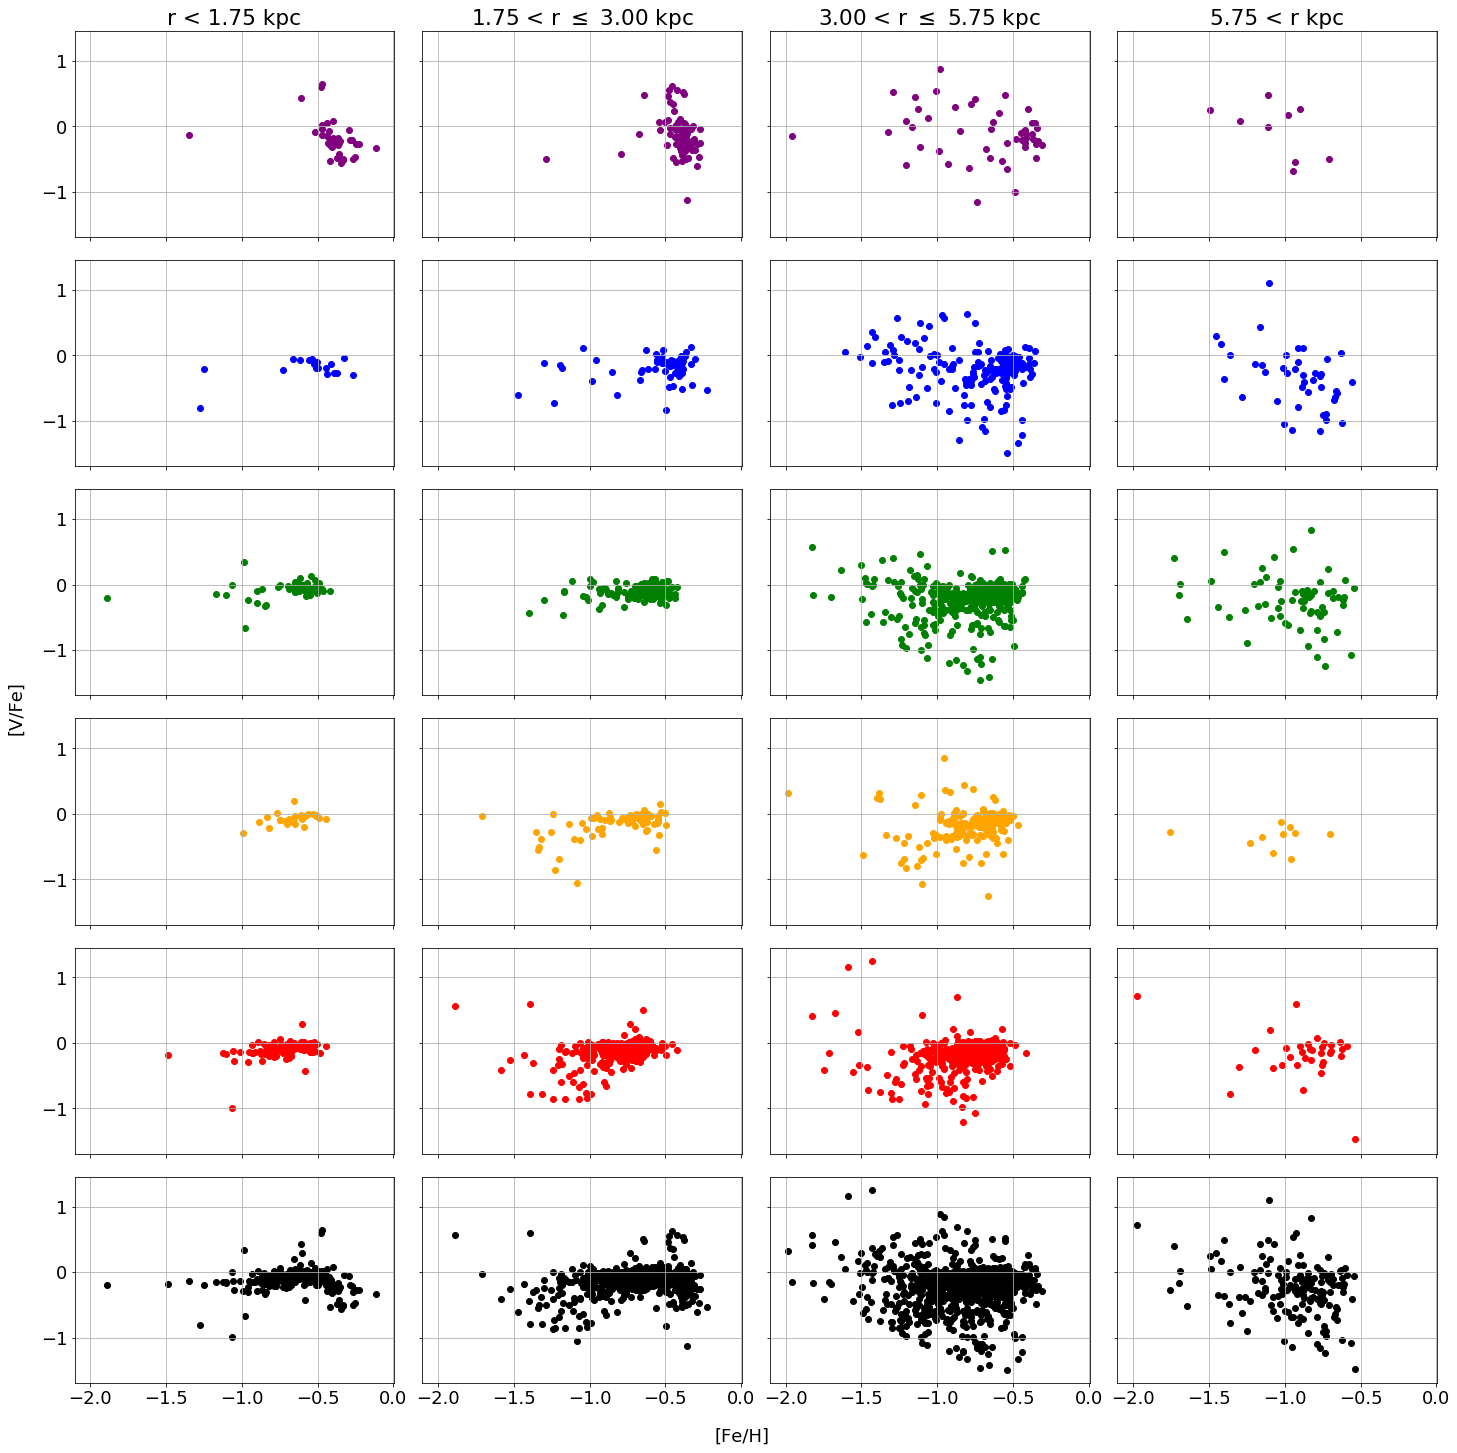

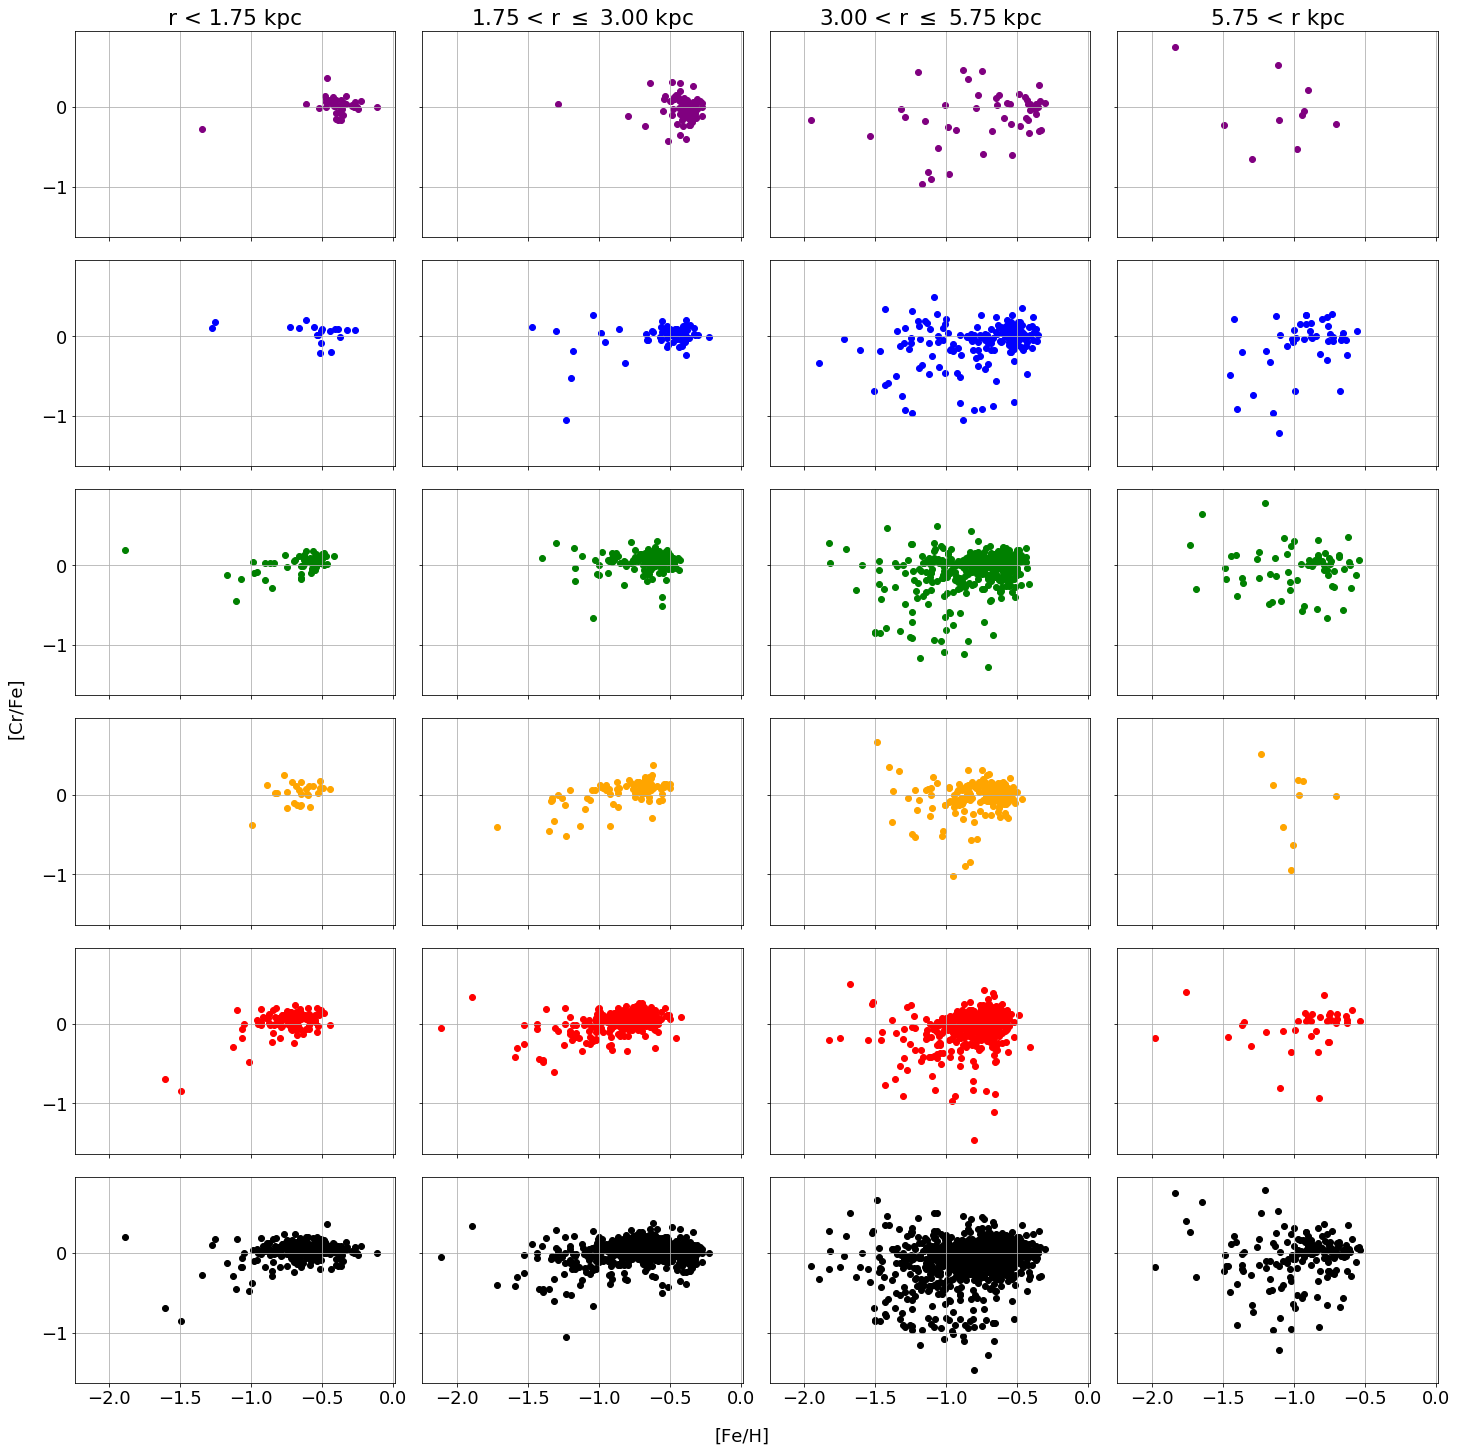

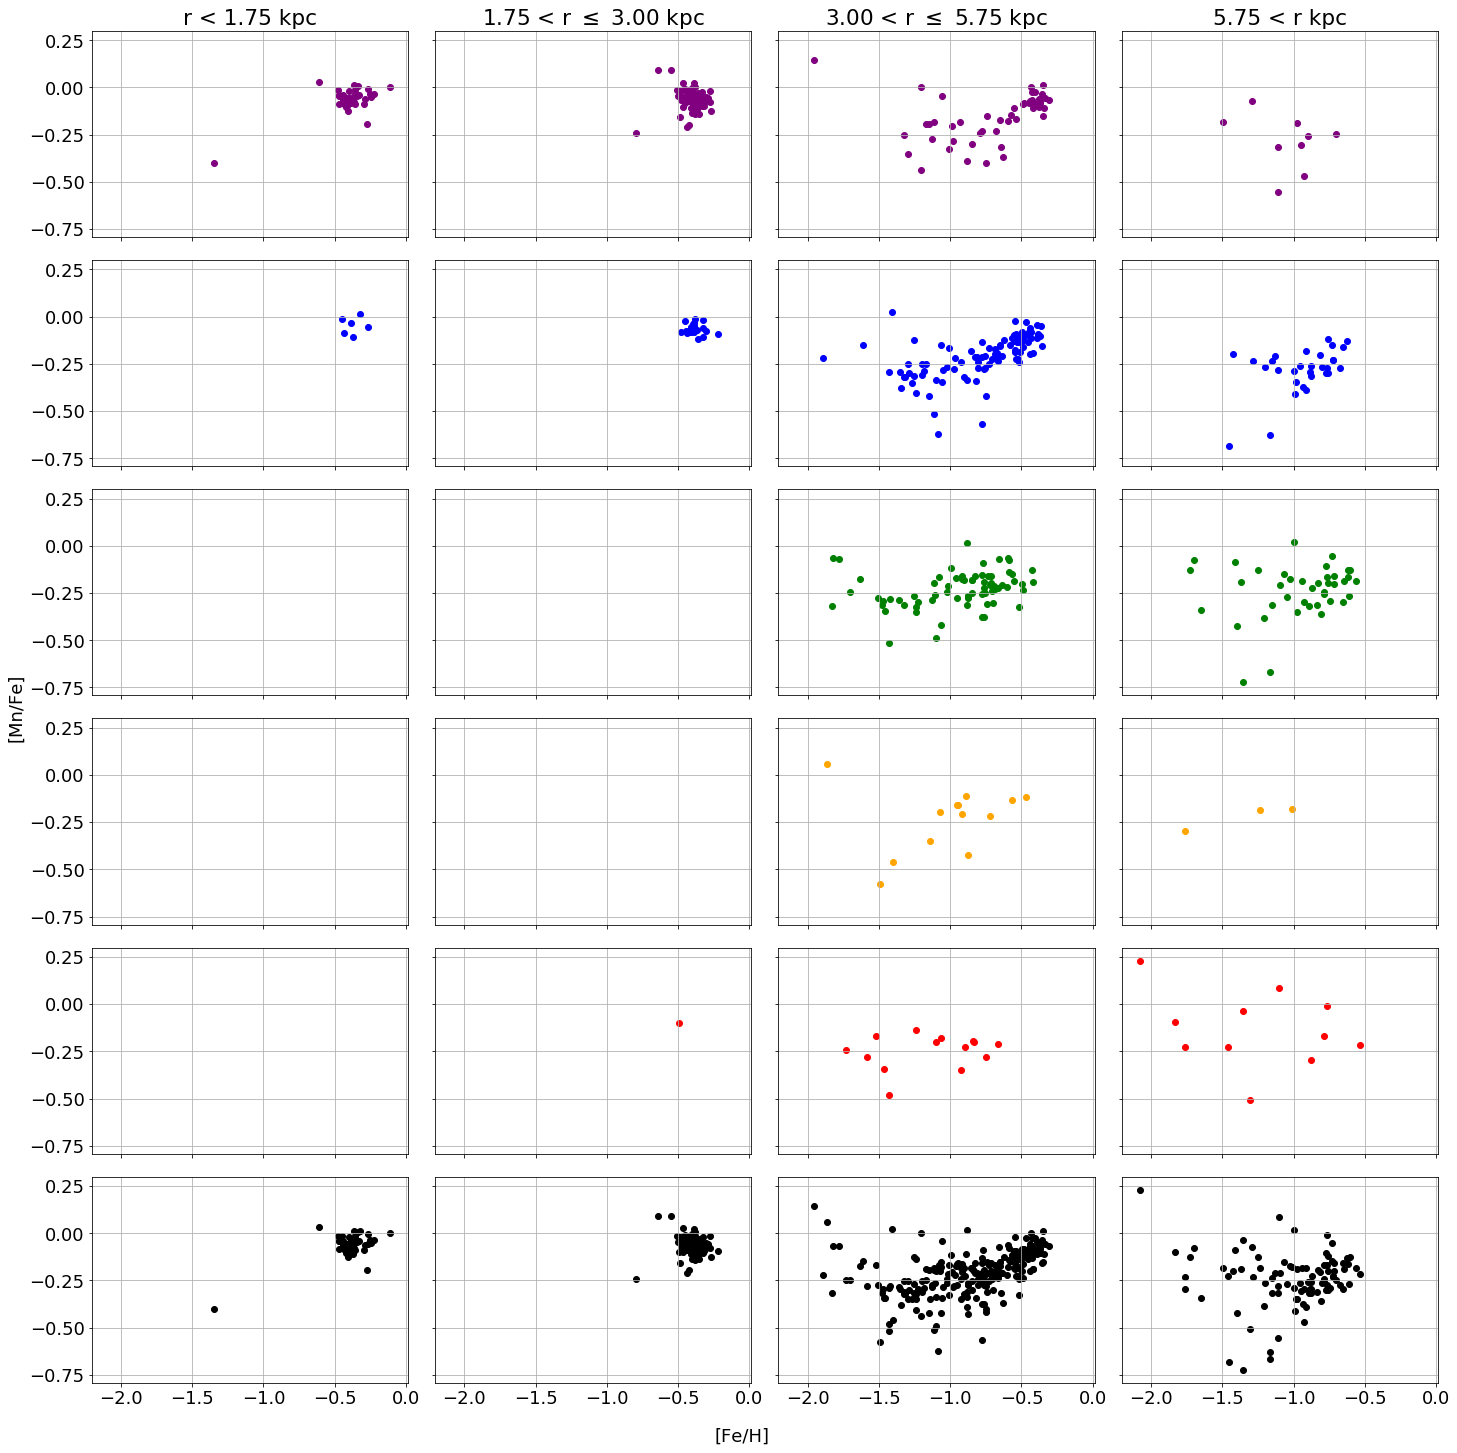

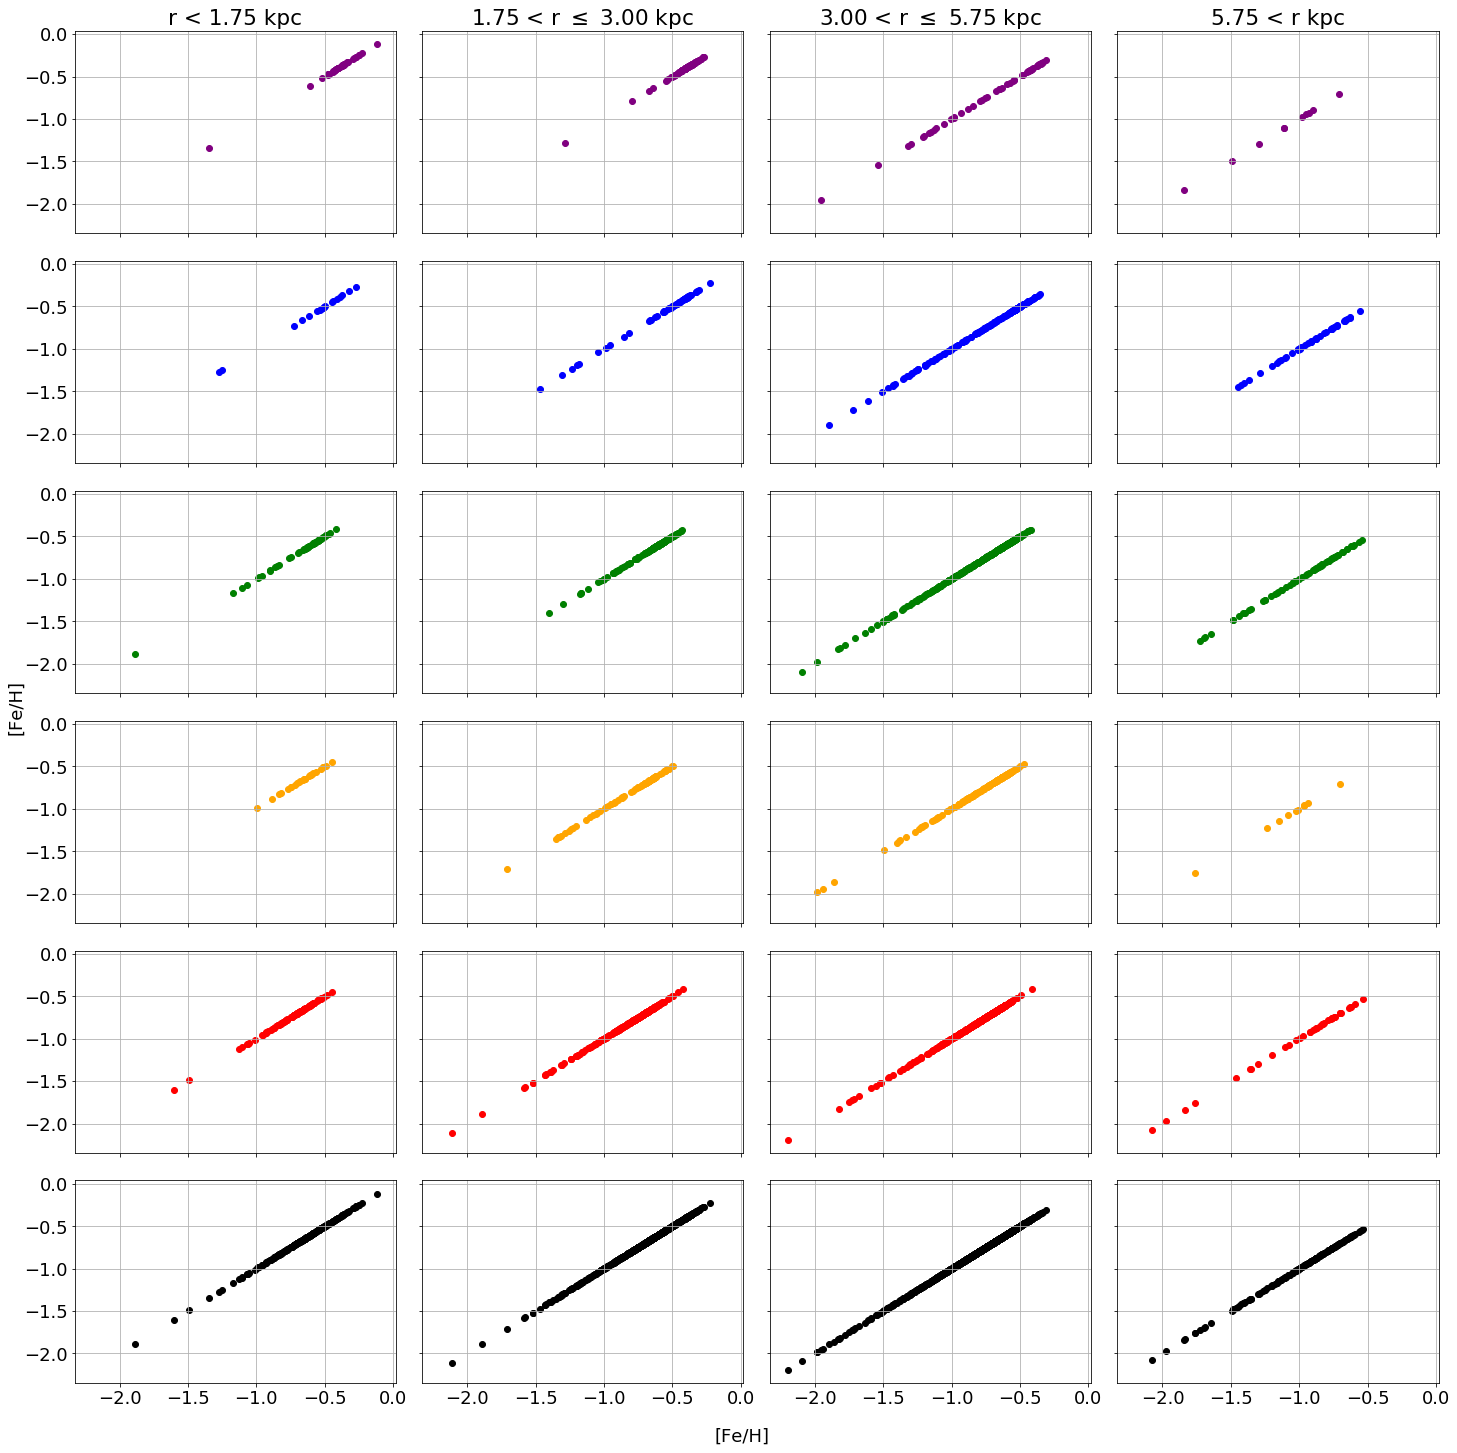

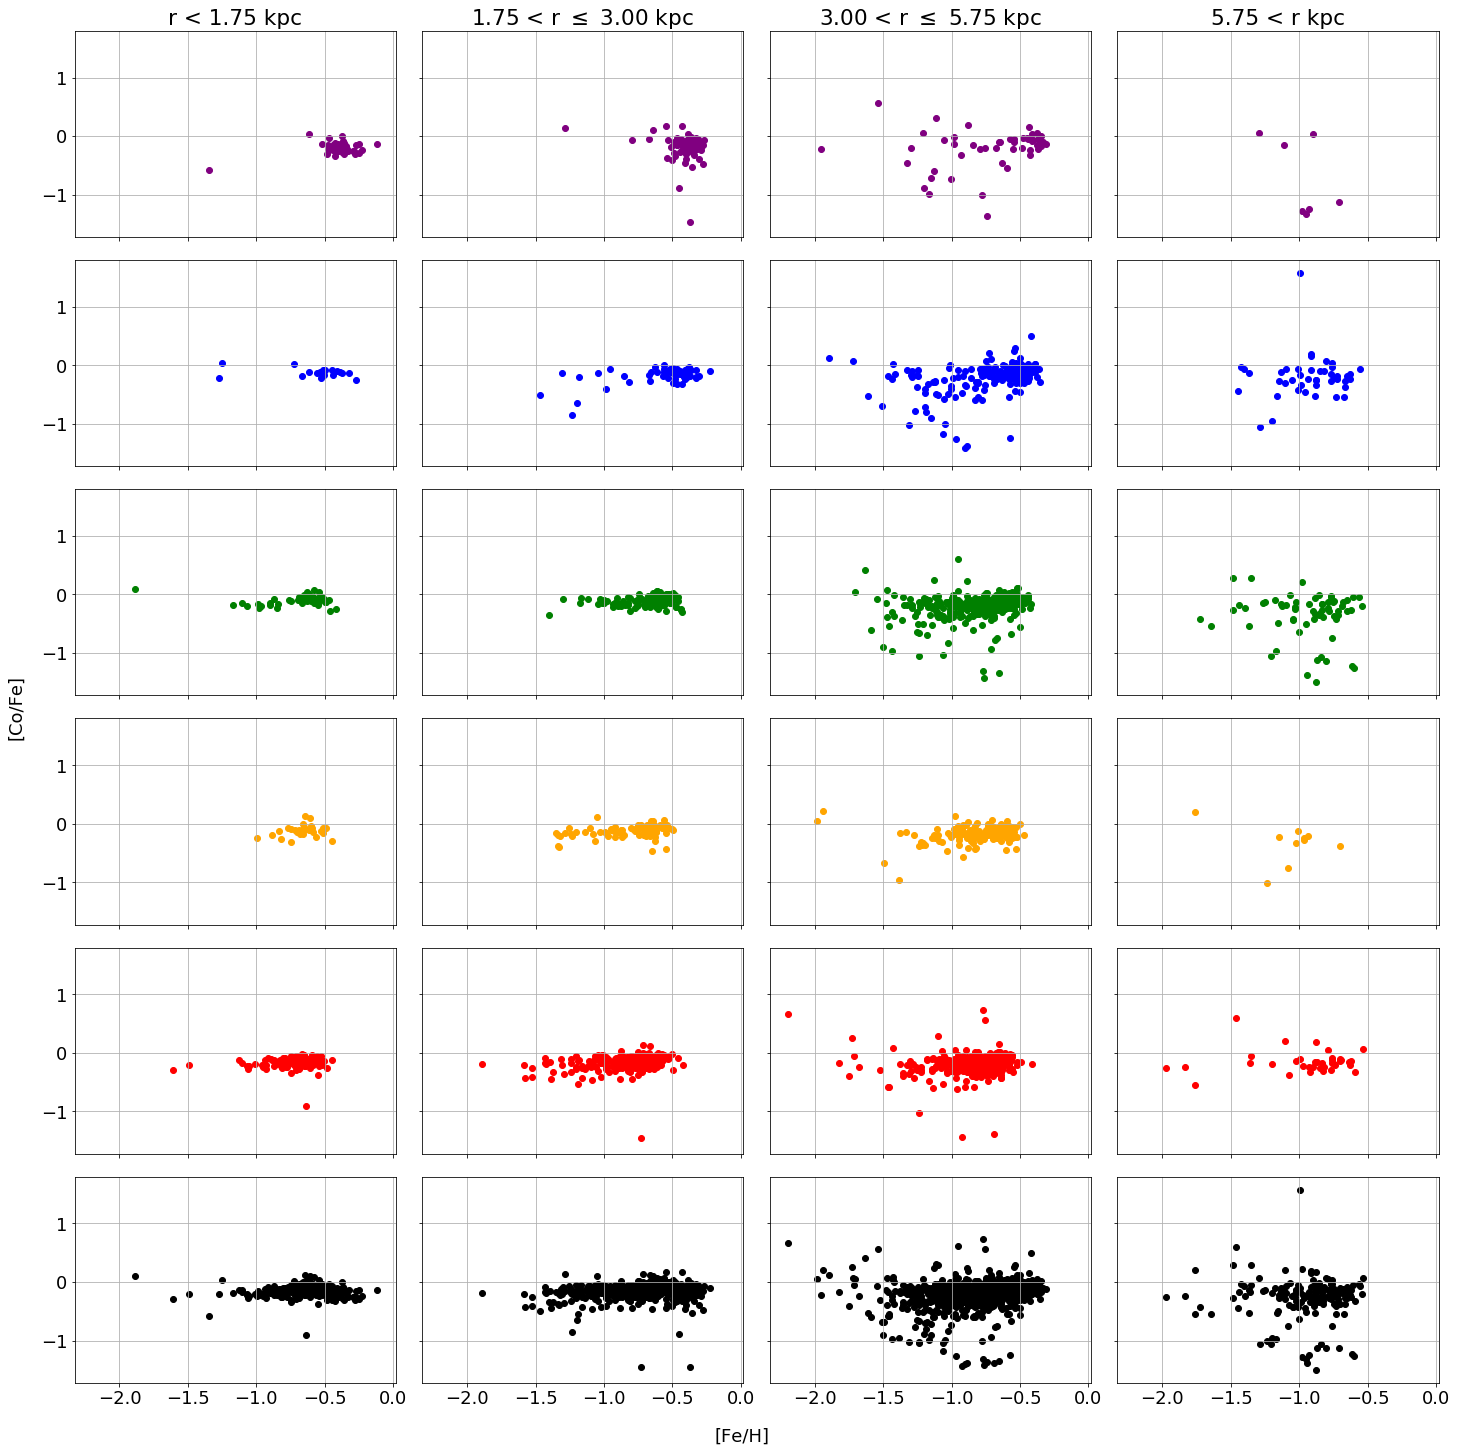

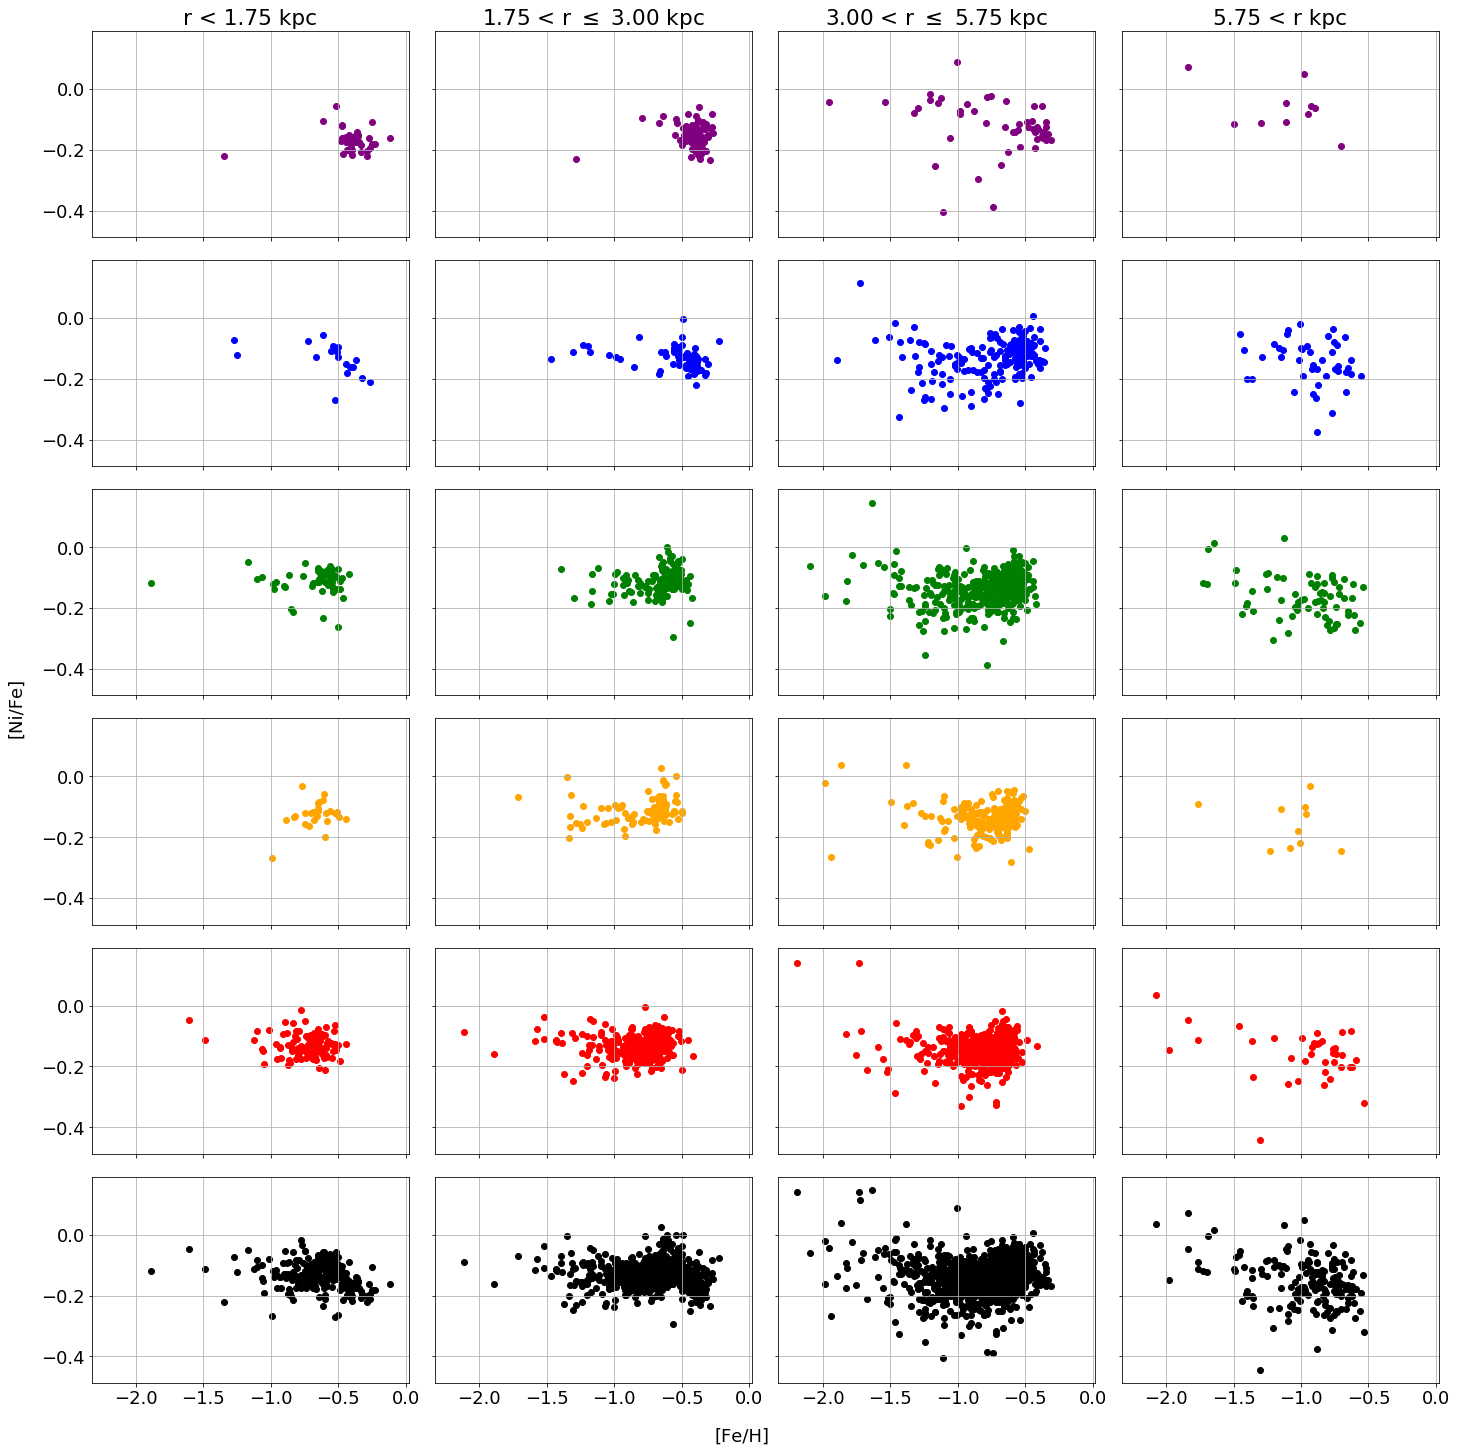

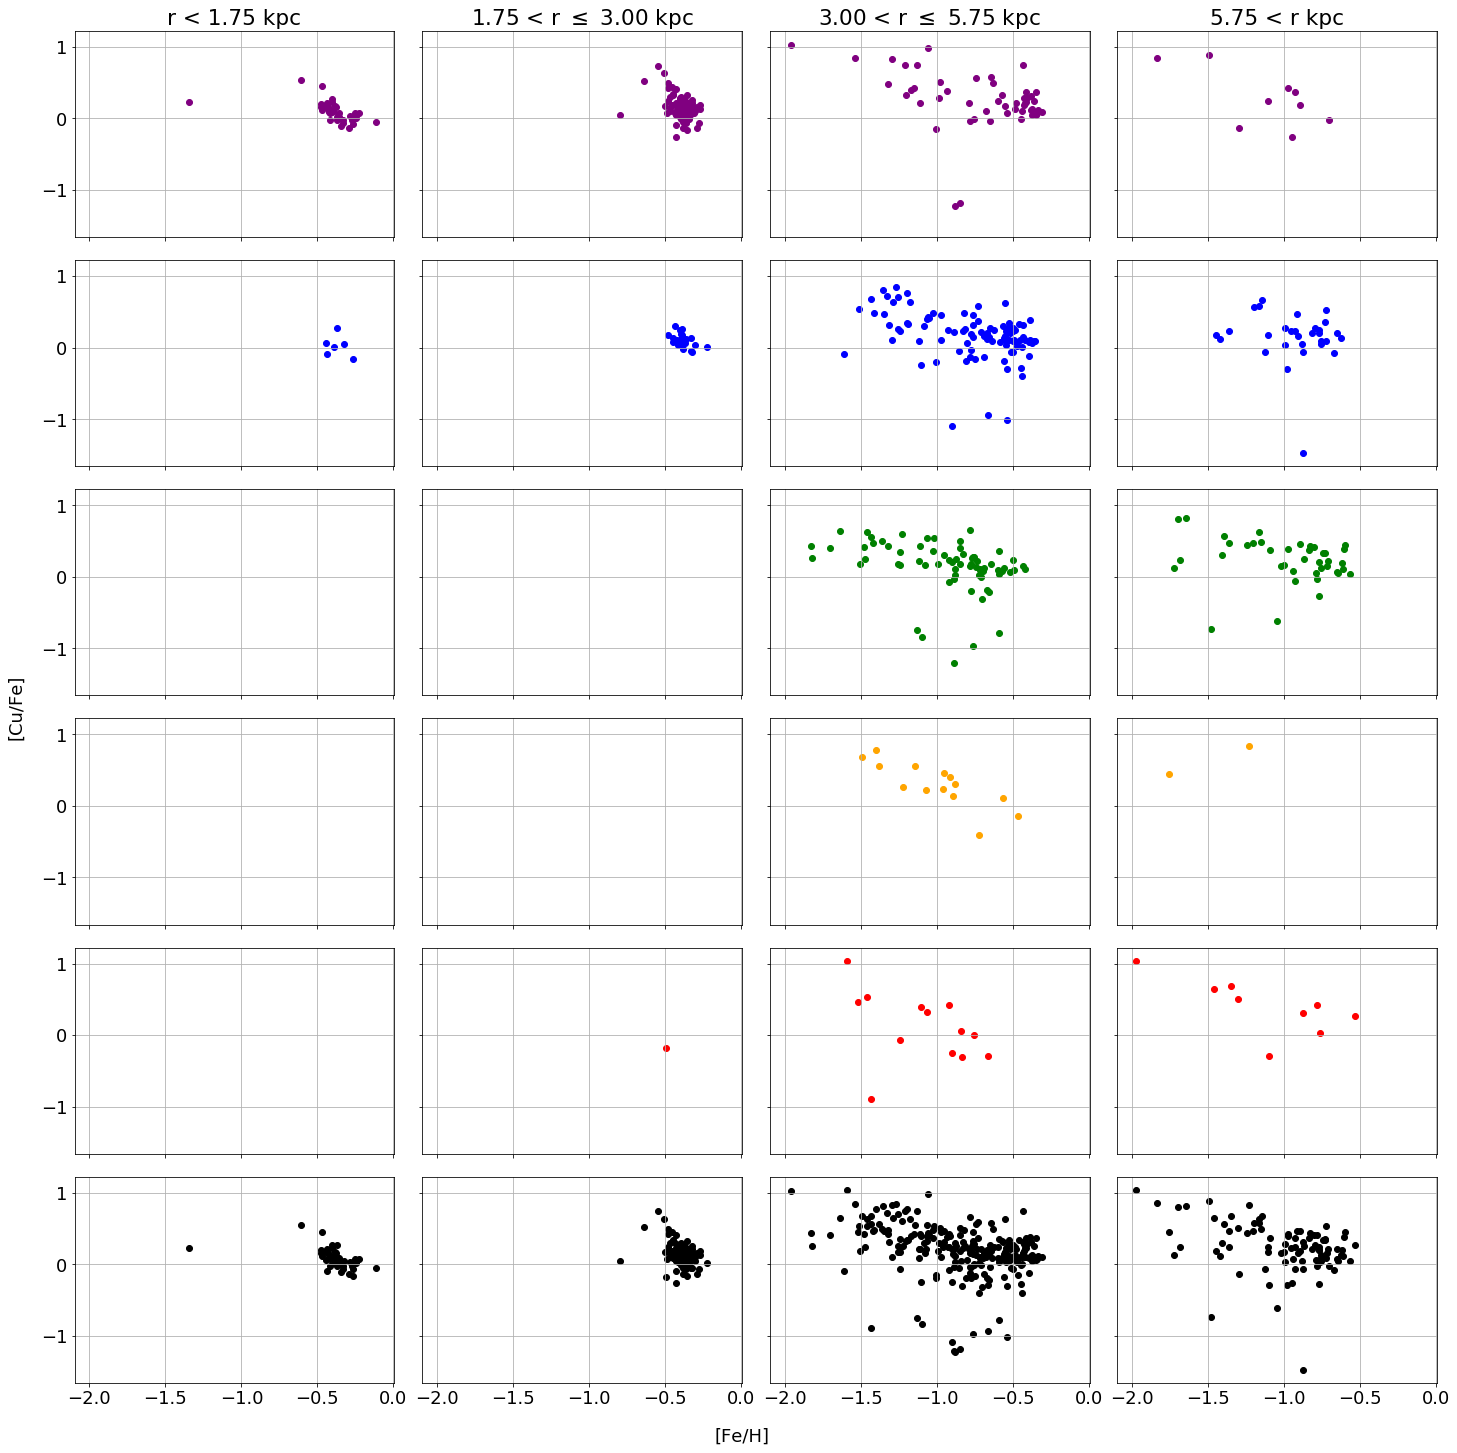

In [296]:
for i in tqdm_notebook(range(len(elems)-5),desc='Hayden Plots Progress',leave=False):
    fig, ax = plt.subplots(6,4,sharex=True,sharey=True,figsize=[20,20])
    for j in range(6):
        if j == 0:
            for k in range(4):
                cln = np.where(r13[elems[i]][yoradius[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][yoradius[k]][cln],(r13[elems[i]])[yoradius[k]][cln],c='purple')
                ax[j,k].grid()
        if j == 1:
            for k in range(4):
                cln = np.where(r13[elems[i]][ylradius[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][ylradius[k]][cln],(r13[elems[i]])[ylradius[k]][cln],c='blue')
                ax[j,k].grid()
        if j == 2:
            for k in range(4):
                cln = np.where(r13[elems[i]][ymradius[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][ymradius[k]][cln],(r13[elems[i]])[ymradius[k]][cln],c='green')
                ax[j,k].grid()
        if j == 3:
            for k in range(4):
                cln = np.where(r13[elems[i]][omradius[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][omradius[k]][cln],(r13[elems[i]])[omradius[k]][cln],c='orange')
                ax[j,k].grid()
        if j == 4:
            for k in range(4):
                cln = np.where(r13[elems[i]][olradius[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][olradius[k]][cln],(r13[elems[i]])[olradius[k]][cln],c='red')
                ax[j,k].grid()
        if j == 5:
            for k in range(4):
                cln =  np.where(r13[elems[i]][rad_bins[k]]>-100)
                ax[j,k].scatter(r13['FE_H'][rad_bins[k]][cln],(r13[elems[i]])[rad_bins[k]][cln],c='k')
                ax[j,k].grid()
#                 if i == 4:
#                     ax[j,k].set_ylim(-0.1,0.1)
#         for k in range(4):
#             ax[5,k].grid()
#             ax[5,k].scatter(r13['FE_H'][rad_bins[k]],(r13[elems[i]])[rad_bins[k]],c='k')
            

    rad_labels = ['r < 1.75 kpc','1.75 < r $\leq$ 3.00 kpc','3.00 < r $\leq$ 5.75 kpc','5.75 < r kpc']
    for l in range(4):
        ax[0,l].set_title(r'{}'.format(rad_labels[l]))
    #ax[4,k].set_xlabel(r'[Fe/H]')
    
    age_labels = ['$0.0 < \\tau \leq 0.5$ Gyr','$0.5 < \\tau \leq 2.0$ Gyr','$2.0 < \\tau \leq 7.0$ Gyr',
              '$7.0 < \\tau \leq 10.5$ Gyr','$10.5 < \\tau$ Gyr','Overall']
# for l in range(6):
#     ax[l,0].set_ylabel(r'{}'.format(age_labels[l]))
    

    fig.text(0.5, -0.01, '[Fe/H]', ha='center')
    fig.text(-0.01, 0.5, '{}'.format(labs[i]), va='center', rotation='vertical')
    
    plt.tight_layout()
    plt.show()
    
    

NA_FE


(array([ 1.,  0.,  1.,  3., 10.,  8.,  7.,  5.,  1.,  1.]),
 array([-1.3668541 , -1.1304361 , -0.89401805, -0.65760005, -0.42118204,
        -0.18476403,  0.05165398,  0.288072  ,  0.52449   ,  0.760908  ,
         0.997326  ], dtype=float32),
 <a list of 10 Patch objects>)

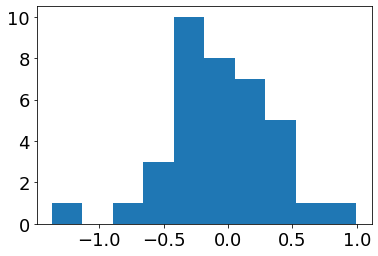

In [276]:
cln = np.where(r13[elems[4]][ylradius[3]]>-100)
print(elems[4])
plt.hist((r13[elems[4]])[ylradius[3]][cln])

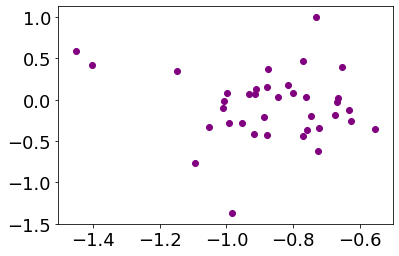

In [281]:
cln = np.where(r13[elems[4]][ylradius[3]]>-100)
plt.scatter(r13['FE_H'][ylradius[3]][cln],(r13[elems[4]])[ylradius[3]][cln],c='purple')

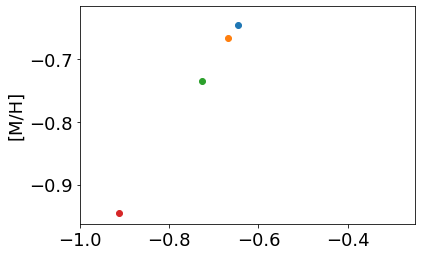

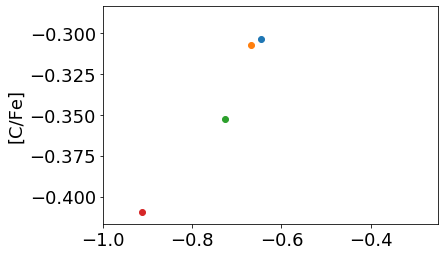

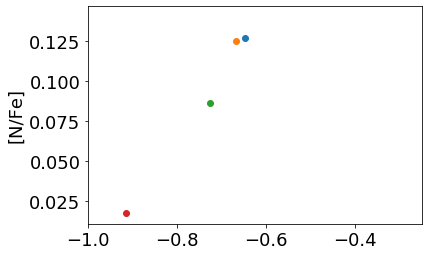

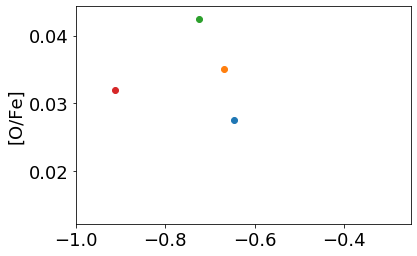

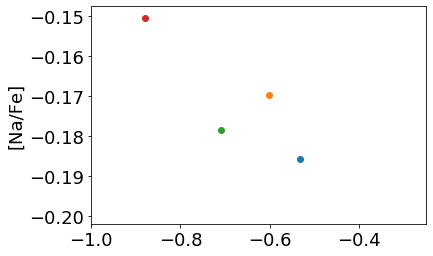

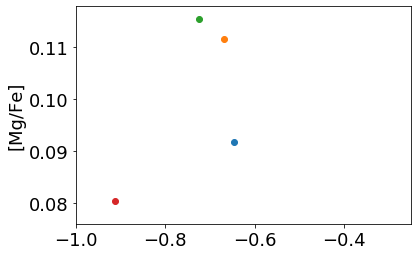

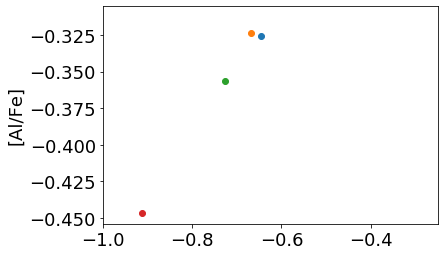

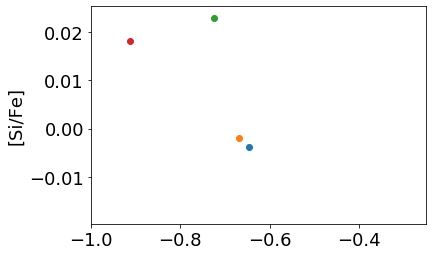

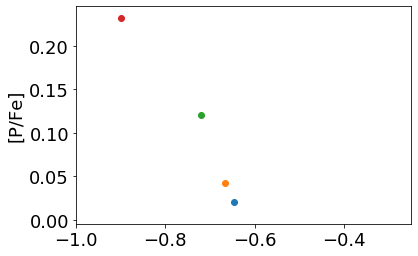

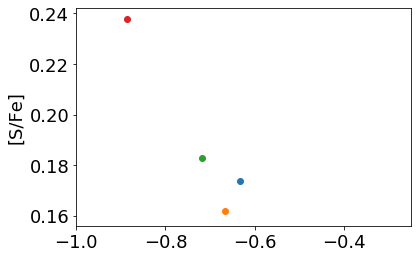

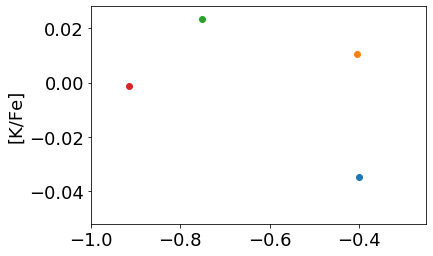

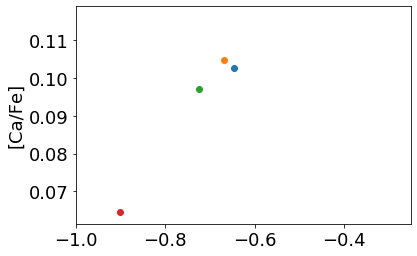

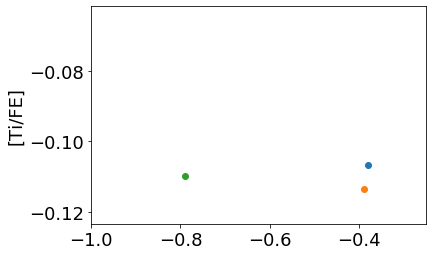

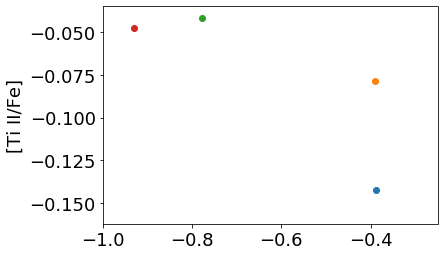

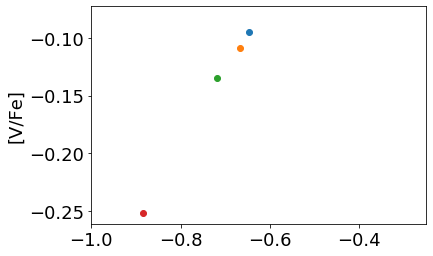

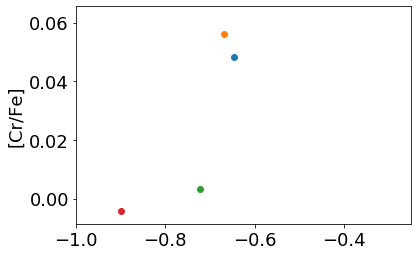

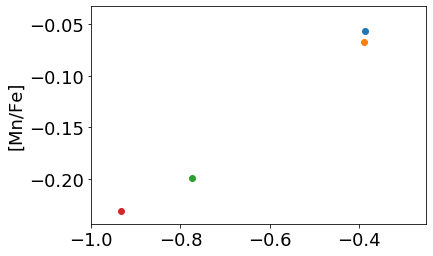

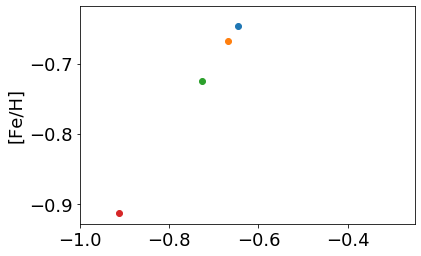

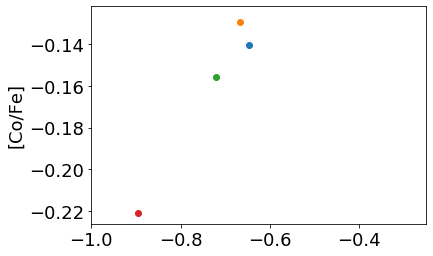

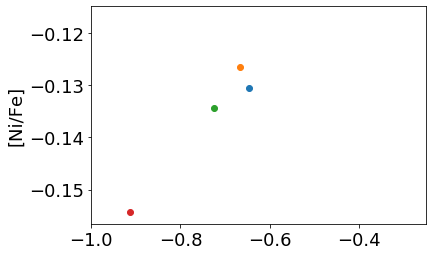

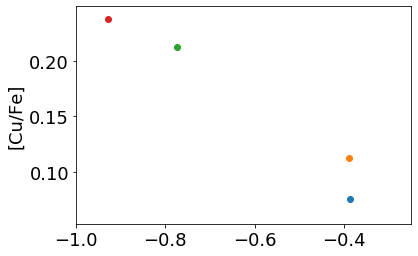

In [184]:
over_medians = []
for i in range(len(elems)-5):
    
    medians = []
    rad_bins = [one,two,three,four]
    for k in range(4):
        
        cln = np.where(r13[elems[i]][rad_bins[k]]>-100)
        med = np.median([r13['FE_H'][rad_bins[k]][cln],r13[elems[i]][rad_bins[k]][cln]],axis=1)
        medians.append(med)
    
    over_medians.append(medians)
    

colors = [1,2,3,4]
plt.figure(figsize=[6,4])
for j in range(len(elems)-5):
    for k in range(4):
        plt.scatter(over_medians[j][k][0],over_medians[j][k][1])
        
    
    plt.xlim(-1.0,-0.25)
    plt.ylabel(r'{}'.format(labs[j]))
    plt.show()

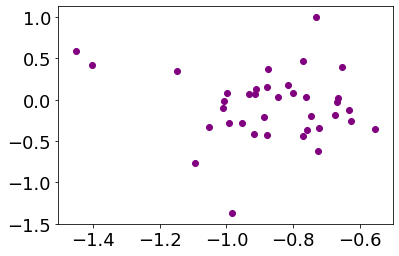

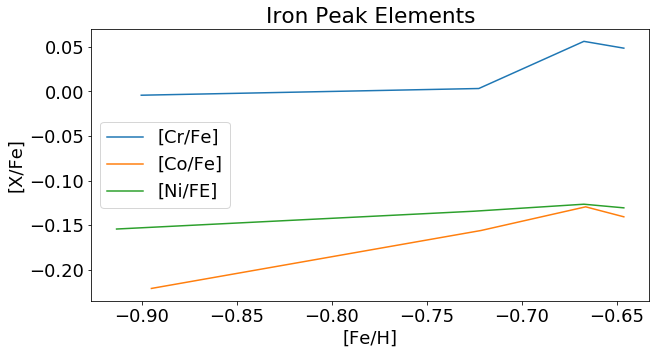

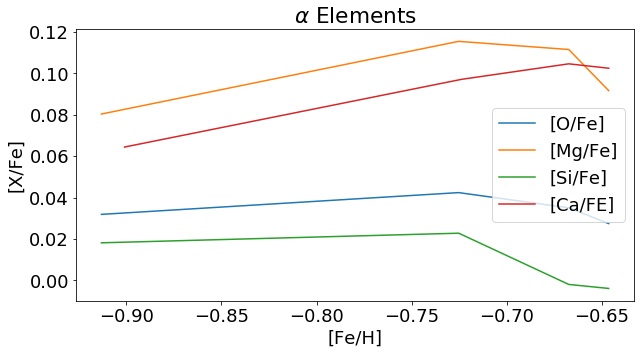

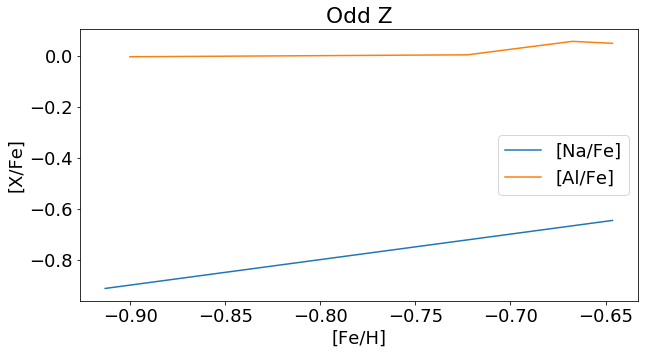

In [234]:
ironpeak = [np.where(elems=='FE_H'),np.where(elems=='CR_FE'),np.where(elems=='CO_FE'),np.where(elems == 'NI_FE')]
alphaelm = [np.where(elems=='O_FE'),np.where(elems=='MG_FE'),np.where(elems=='SI_FE'),np.where(elems == 'CA_FE')]
oddzelem = [np.where(elems=='NA_FE'),np.where(elems == 'AL_FE')]

median_xvals = []
median_yvals = []

for i in range(len(over_medians)):
    xpt = []
    ypt = []
    for j in range(4):
        xpt.append(over_medians[i][j][0])
        ypt.append(over_medians[i][j][1])
    median_xvals.append([xpt[0],xpt[1],xpt[2],xpt[3]])
    median_yvals.append([ypt[0],ypt[1],ypt[2],ypt[3]])

x_irons = []
y_irons = []
for k in np.squeeze(ironpeak):
    x_irons.append(median_xvals[k])
    y_irons.append(median_yvals[k])
    
x_alpha = []
y_alpha = []
for k in np.squeeze(alphaelm):
    x_alpha.append(median_xvals[k])
    y_alpha.append(median_yvals[k])

x_oddzs = []
y_oddzs = []
for k in np.squeeze(ironpeak):
    x_oddzs.append(median_xvals[k])
    y_oddzs.append(median_yvals[k])
    

### Hayden plot median trends   
plt.figure(figsize=[10,5])
# plt.plot(x_irons[0],y_irons[0],label='[Fe/H]')
plt.plot(x_irons[1],y_irons[1],label='[Cr/Fe]')
plt.plot(x_irons[2],y_irons[2],label='[Co/Fe]')
plt.plot(x_irons[3],y_irons[3],label='[Ni/FE]')
plt.title(r'Iron Peak Elements')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.plot(x_alpha[0],y_alpha[0],label='[O/Fe]')
plt.plot(x_alpha[1],y_alpha[1],label='[Mg/Fe]')
plt.plot(x_alpha[2],y_alpha[2],label='[Si/Fe]')
plt.plot(x_alpha[3],y_alpha[3],label='[Ca/FE]')
plt.title(r'$\alpha$ Elements')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.plot(x_oddzs[0],y_oddzs[0],label='[Na/Fe]')
plt.plot(x_oddzs[1],y_oddzs[1],label='[Al/Fe]')
plt.title(r'Odd Z')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

In [232]:
# plt.figure(figsize=[10,5])
# # plt.plot(x_irons[0],y_irons[0],label='[Fe/H]')
# plt.plot(x_irons[1],y_irons[1],label='[Cr/Fe]')
# plt.plot(x_irons[2],y_irons[2],label='[Co/Fe]')
# plt.plot(x_irons[3],y_irons[3],label='[Ni/FE]')
# plt.legend()
# plt.show()

# plt.figure(figsize=[10,5])
# plt.plot(x_alpha[0],y_alpha[0],label='[O/Fe]')
# plt.plot(x_alpha[1],y_alpha[1],label='[Mg/Fe]')
# plt.plot(x_alpha[2],y_alpha[2],label='[Si/Fe]')
# plt.plot(x_alpha[3],y_alpha[3],label='[Ca/FE]')
# plt.legend()
# plt.show()

# plt.figure(figsize=[10,5])
# plt.plot(x_oddzs[0],y_oddzs[0],label='[Na/Fe]')
# plt.plot(x_oddzs[1],y_oddzs[1],label='[Al/Fe]')

# plt.xlabel(r'[Fe/H]')
# plt.ylabel(r'[X/Fe]')

# plt.legend()
# plt.show()

In [233]:
# plt.figure(figsize=[20,10])
# plt.plot(x_irons[1],y_irons[1],label='[Cr/Fe]')
# plt.plot(x_irons[2],y_irons[2],label='[Co/Fe]')
# plt.plot(x_irons[3],y_irons[3],label='[Ni/FE]')

# plt.plot(x_alpha[0],y_alpha[0],label='[O/Fe]')
# plt.plot(x_alpha[1],y_alpha[1],label='[Mg/Fe]')
# plt.plot(x_alpha[2],y_alpha[2],label='[Si/Fe]')
# plt.plot(x_alpha[3],y_alpha[3],label='[Ca/FE]')

# plt.plot(x_oddzs[0],y_oddzs[0],label='[Na/Fe]')
# plt.plot(x_oddzs[1],y_oddzs[1],label='[Al/Fe]')
# plt.legend()
# plt.show()

<font size='15'>
    <b>
        Equal Number of Stars Binning
    </b>
</font>

In [124]:
##############
###  Bins  ###
##############

oneb = np.where(radius<2.375)
twob = np.where((radius>=2.375)&(radius<3.902))
threeb = np.where((radius>=3.902)&(radius<4.764))
fourb = np.where(radius>=4.764)

rad_binsb = [oneb,twob,threeb,fourb]

---------------[M/H]---------------
r < 2.37 kpc:  [-0.6687415  -0.67358154]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154 -0.6749716 ]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156 -0.7045115 ]
4.76 < r kpc:  [-0.8245466 -0.8438566]


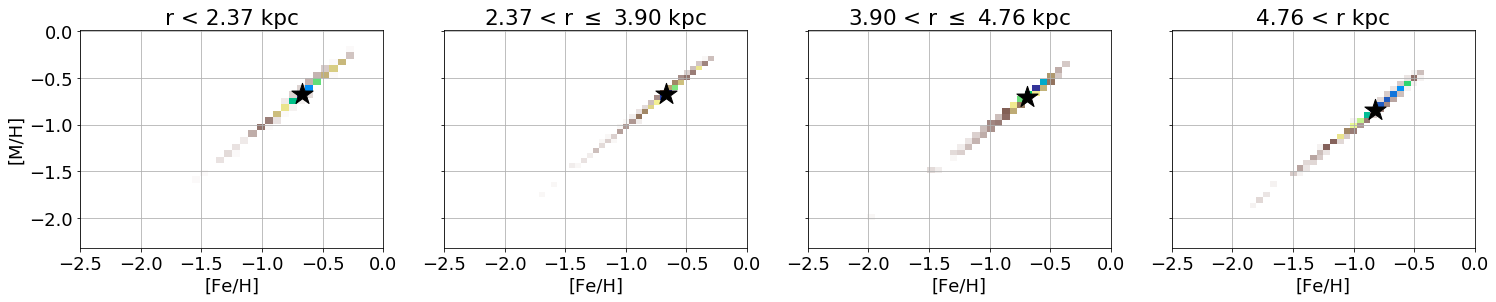

---------------[C/Fe]---------------
r < 2.37 kpc:  [-0.6687415 -0.31636  ]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154 -0.31045   ]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156 -0.33730996]
4.76 < r kpc:  [-0.8245466 -0.390895 ]


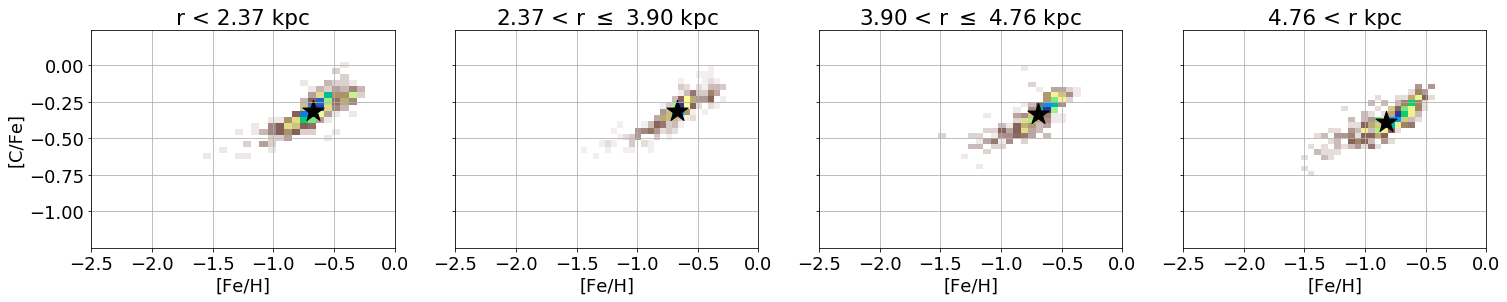

---------------[N/Fe]---------------
r < 2.37 kpc:  [-0.6687415   0.11457998]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154  0.12891501]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156  0.09463   ]
4.76 < r kpc:  [-0.8245466   0.04746598]


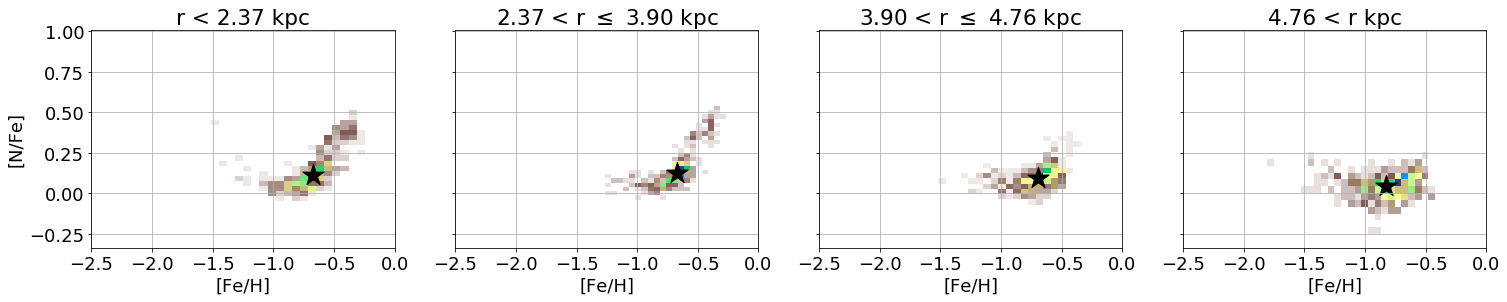

---------------[O/Fe]---------------
r < 2.37 kpc:  [-0.6687415  0.027152 ]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154  0.04302199]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156  0.04462105]
4.76 < r kpc:  [-0.8245466   0.03470203]


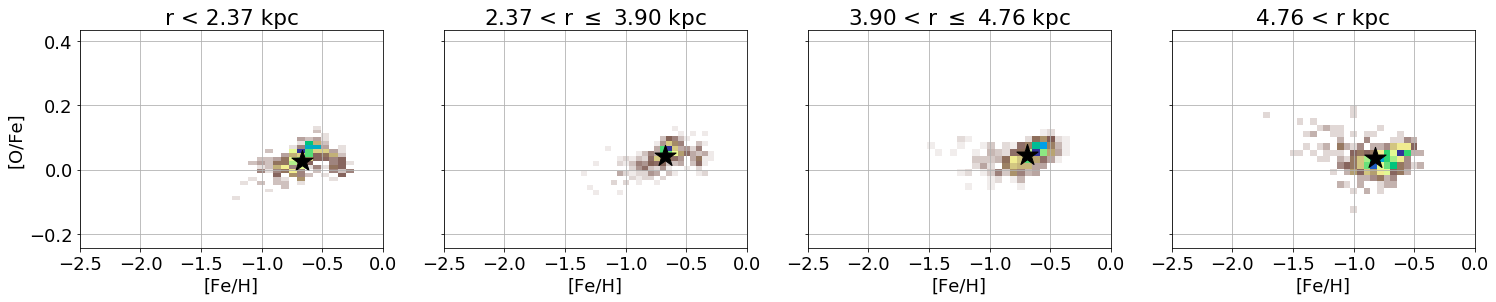

---------------[Na/Fe]---------------
r < 2.37 kpc:  [-0.5812665  -0.17907396]
2.37 < r $\leq$ 3.90 kpc:  [-0.6369666  -0.18040393]
3.90 < r $\leq$ 4.76 kpc:  [-0.67867154 -0.1881541 ]
4.76 < r kpc:  [-0.80913156 -0.14594394]


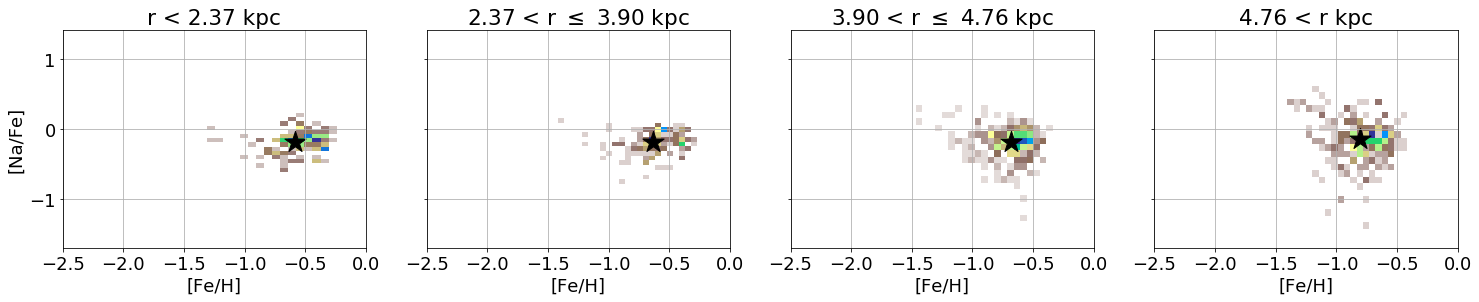

---------------[Mg/Fe]---------------
r < 2.37 kpc:  [-0.6687415   0.09927168]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154  0.11543673]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156  0.1209217 ]
4.76 < r kpc:  [-0.82390153  0.09819669]


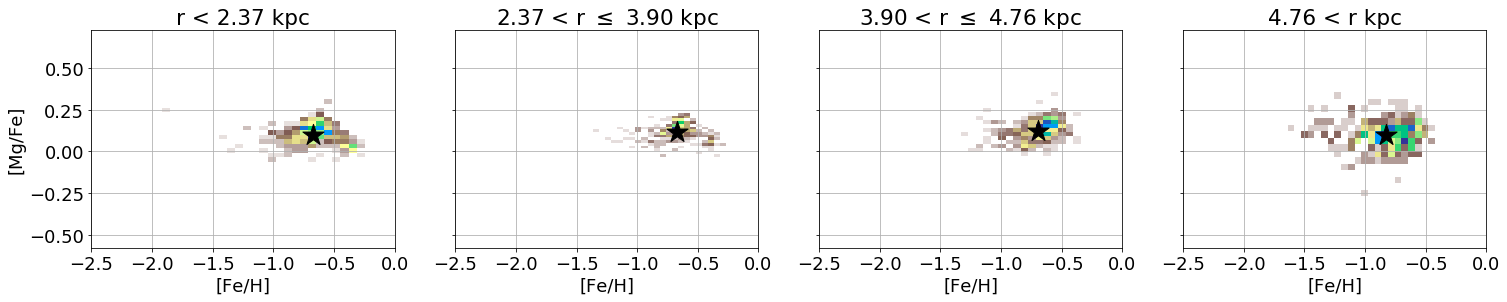

---------------[Al/Fe]---------------
r < 2.37 kpc:  [-0.66814655 -0.33592653]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154 -0.30899152]
3.90 < r $\leq$ 4.76 kpc:  [-0.69308156 -0.34184152]
4.76 < r kpc:  [-0.8245466 -0.4181265]


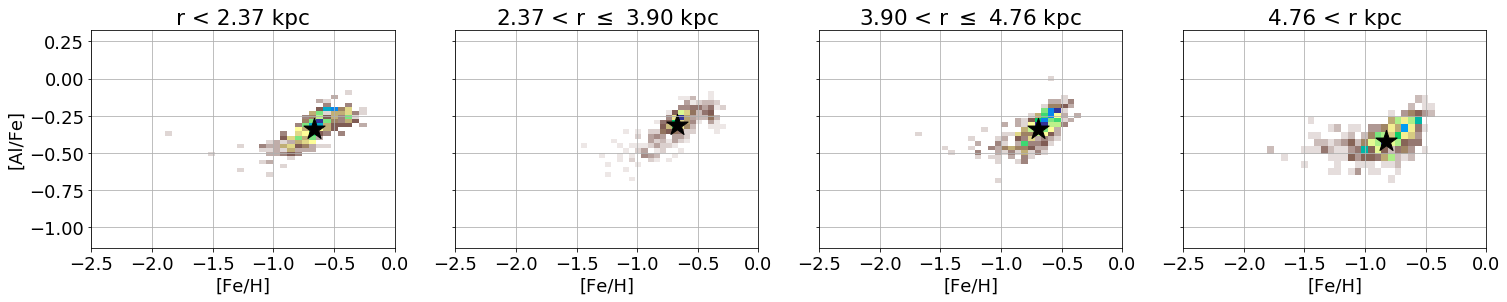

---------------[Si/Fe]---------------
r < 2.37 kpc:  [-0.6687415 -0.007186 ]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154  0.01509647]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156  0.02466702]
4.76 < r kpc:  [-0.82397157  0.01763201]


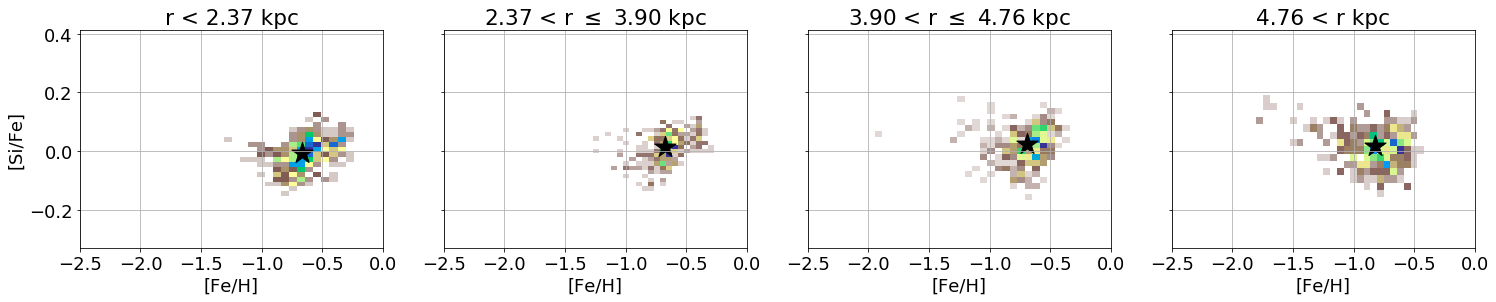

---------------[P/Fe]---------------
r < 2.37 kpc:  [-0.66814655  0.03941697]
2.37 < r $\leq$ 3.90 kpc:  [-0.6711515   0.03976697]
3.90 < r $\leq$ 4.76 kpc:  [-0.6905916   0.10552198]
4.76 < r kpc:  [-0.81505156  0.211312  ]


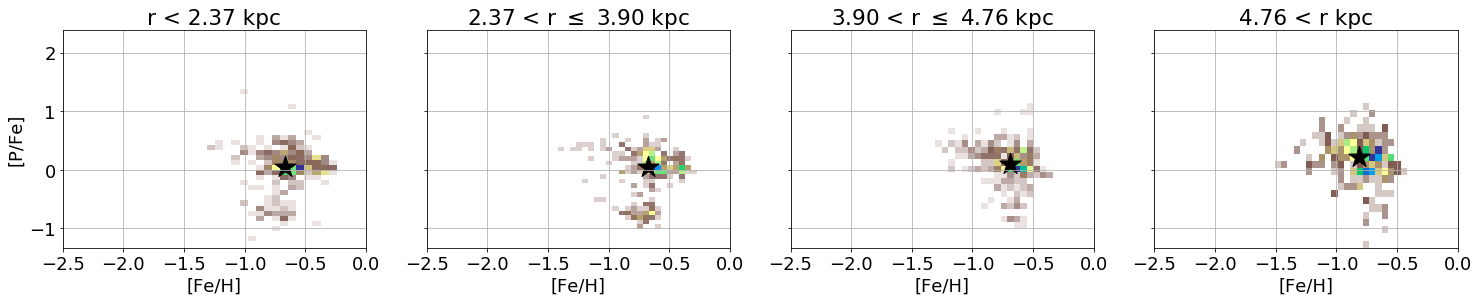

---------------[S/Fe]---------------
r < 2.37 kpc:  [-0.6626316   0.16772401]
2.37 < r $\leq$ 3.90 kpc:  [-0.6694415   0.14866398]
3.90 < r $\leq$ 4.76 kpc:  [-0.6873015   0.18311398]
4.76 < r kpc:  [-0.80872655  0.22220403]


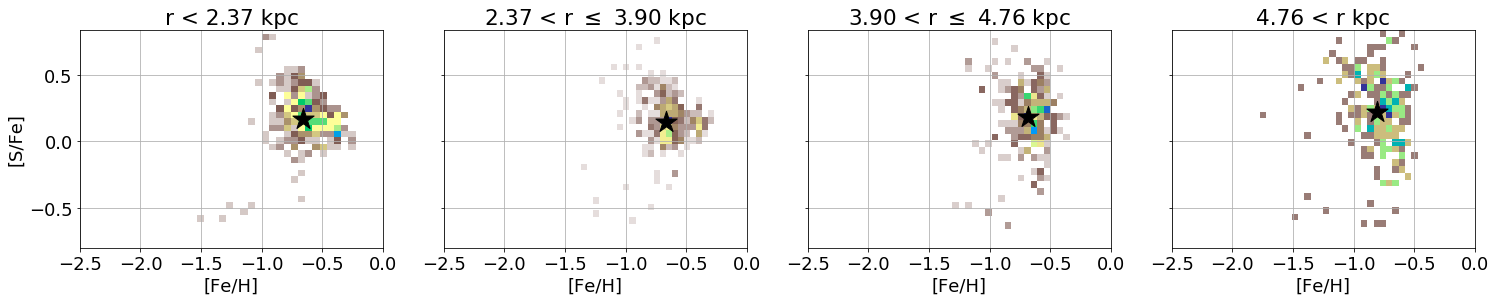

---------------[K/Fe]---------------
r < 2.37 kpc:  [-0.39956155 -0.02185999]
2.37 < r $\leq$ 3.90 kpc:  [-0.42309156  0.02706999]
3.90 < r $\leq$ 4.76 kpc:  [-0.65928155  0.02354997]
4.76 < r kpc:  [-0.87534654  0.01468003]


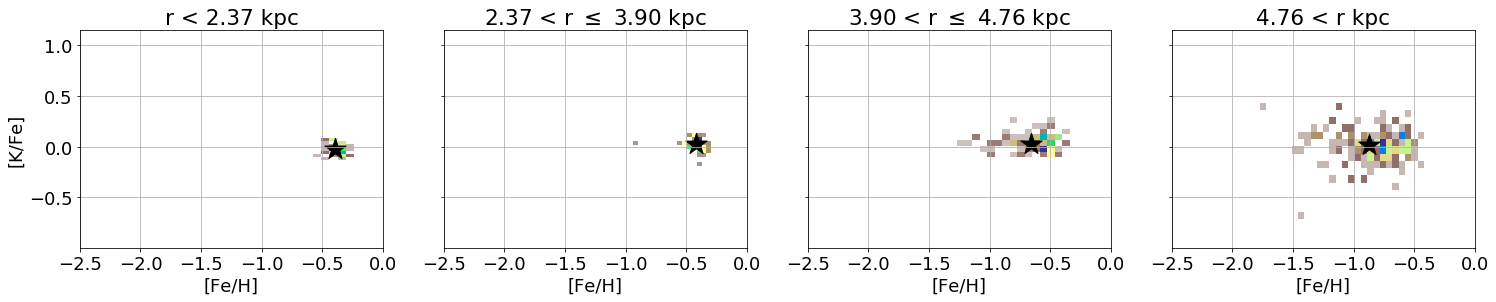

---------------[Ca/Fe]---------------
r < 2.37 kpc:  [-0.6687415   0.10250831]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154  0.10735333]
3.90 < r $\leq$ 4.76 kpc:  [-0.69263154  0.0978083 ]
4.76 < r kpc:  [-0.8232815  0.0838283]


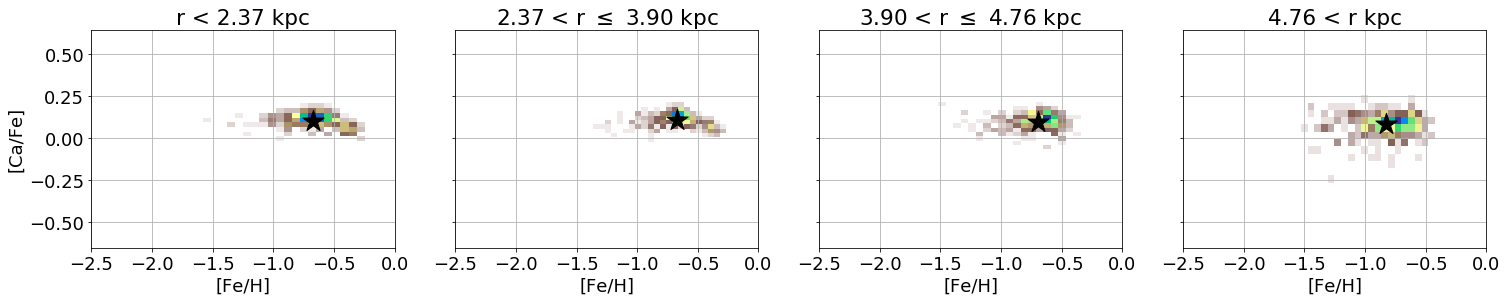

---------------[Ti/FE]---------------
r < 2.37 kpc:  [-0.37426156 -0.10579439]
2.37 < r $\leq$ 3.90 kpc:  [-0.39171156 -0.11664939]
3.90 < r $\leq$ 4.76 kpc:  [-0.44287154  0.00543568]
4.76 < r kpc:  [-1.1041615  -0.12836337]


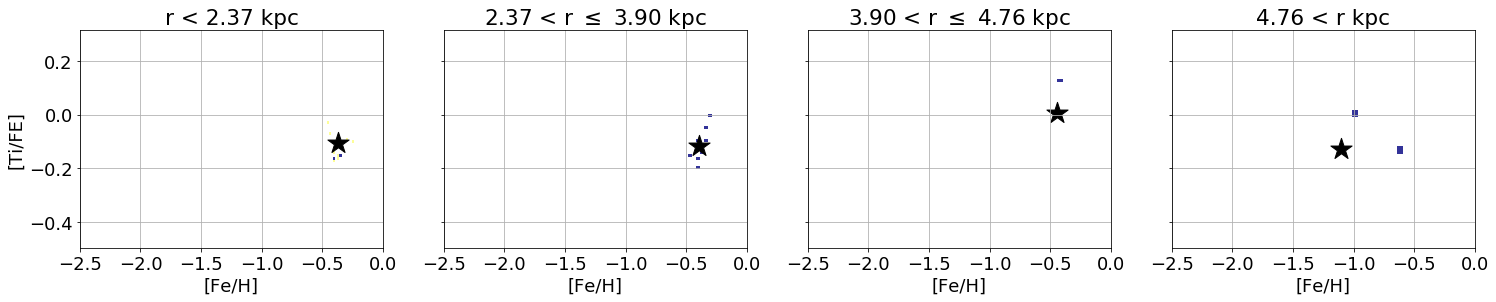

---------------[Ti II/Fe]---------------
r < 2.37 kpc:  [-0.37989655 -0.10070001]
2.37 < r $\leq$ 3.90 kpc:  [-0.39845154 -0.07221499]
3.90 < r $\leq$ 4.76 kpc:  [-0.6620265  -0.00570001]
4.76 < r kpc:  [-0.88255656 -0.055675  ]


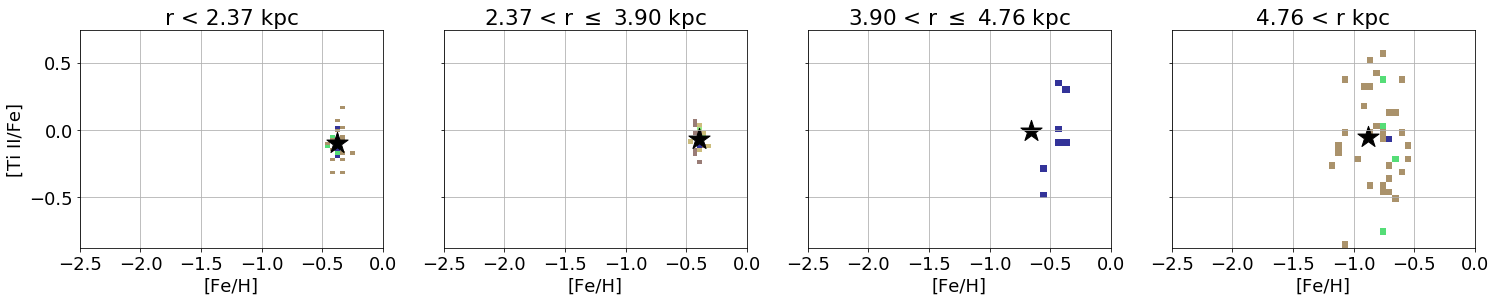

---------------[V/Fe]---------------
r < 2.37 kpc:  [-0.6648816  -0.10446201]
2.37 < r $\leq$ 3.90 kpc:  [-0.67042655 -0.10943194]
3.90 < r $\leq$ 4.76 kpc:  [-0.69053155 -0.13861698]
4.76 < r kpc:  [-0.81505156 -0.16974196]


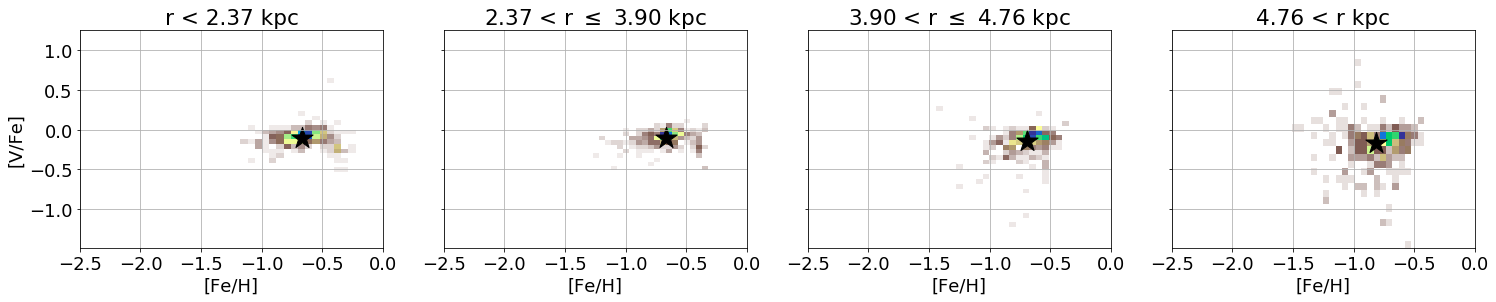

---------------[Cr/Fe]---------------
r < 2.37 kpc:  [-0.6687415   0.05559796]
2.37 < r $\leq$ 3.90 kpc:  [-0.6714915   0.04090303]
3.90 < r $\leq$ 4.76 kpc:  [-0.69263154  0.00520802]
4.76 < r kpc:  [-0.82268155 -0.005512  ]


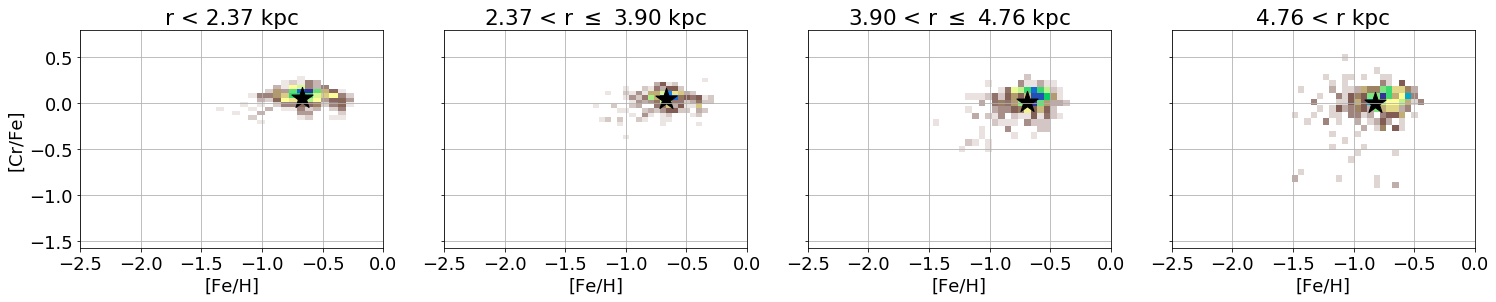

---------------[Mn/Fe]---------------
r < 2.37 kpc:  [-0.37989655 -0.06303102]
2.37 < r $\leq$ 3.90 kpc:  [-0.39845154 -0.07068595]
3.90 < r $\leq$ 4.76 kpc:  [-0.63878155 -0.15833099]
4.76 < r kpc:  [-0.88439155 -0.227671  ]


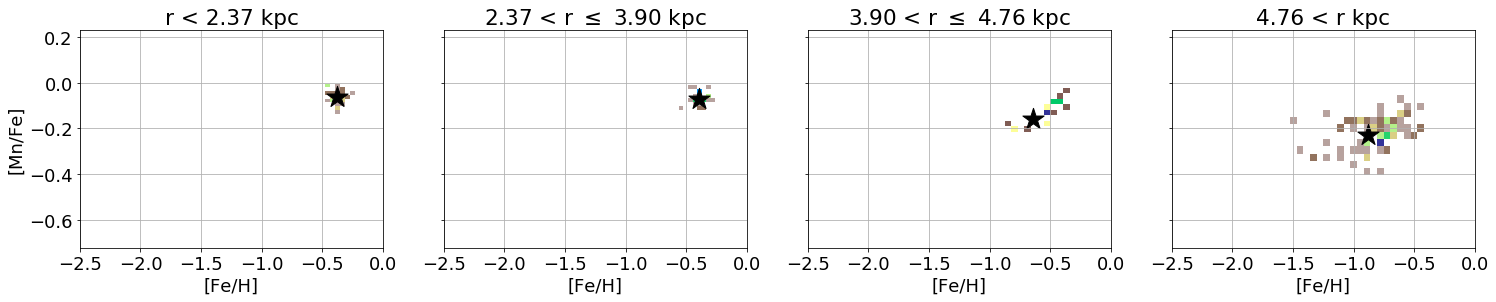

---------------[Fe/H]---------------
r < 2.37 kpc:  [-0.6687415 -0.6687415]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154 -0.67200154]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156 -0.69541156]
4.76 < r kpc:  [-0.8245466 -0.8245466]


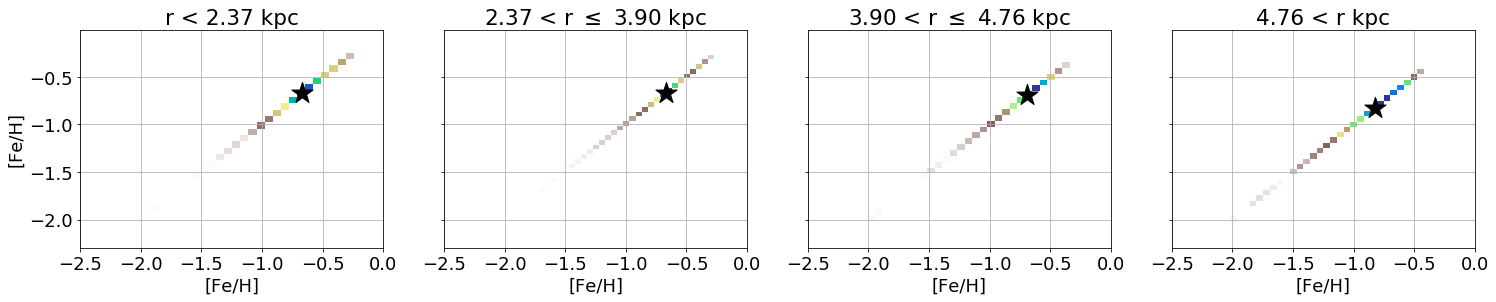

---------------[Co/Fe]---------------
r < 2.37 kpc:  [-0.6675516 -0.137608 ]
2.37 < r $\leq$ 3.90 kpc:  [-0.6711515  -0.12742805]
3.90 < r $\leq$ 4.76 kpc:  [-0.69113153 -0.148108  ]
4.76 < r kpc:  [-0.81596655 -0.18823794]


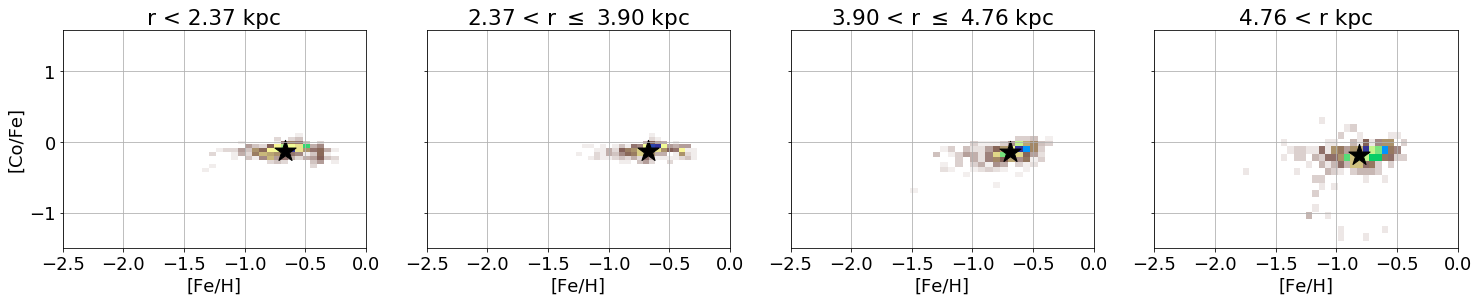

---------------[Ni/Fe]---------------
r < 2.37 kpc:  [-0.6687415  -0.13001794]
2.37 < r $\leq$ 3.90 kpc:  [-0.67200154 -0.1256879 ]
3.90 < r $\leq$ 4.76 kpc:  [-0.69541156 -0.1327979 ]
4.76 < r kpc:  [-0.8245466  -0.14259791]


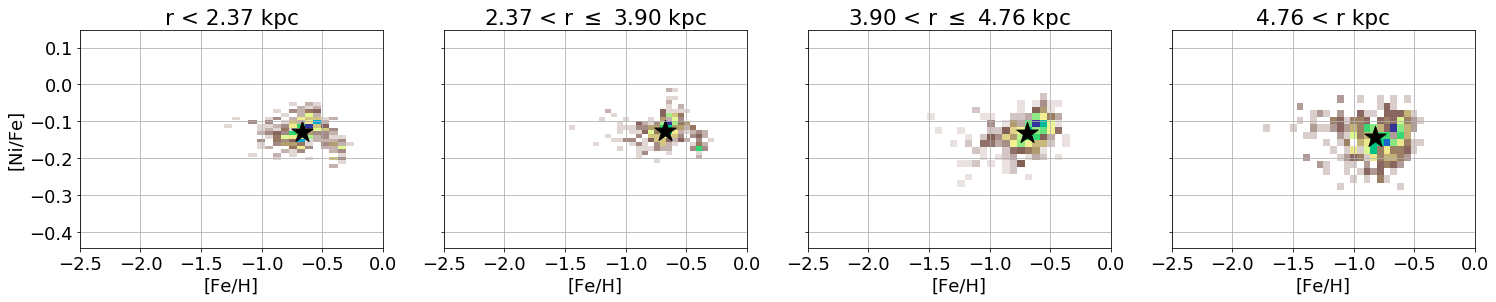

---------------[Cu/Fe]---------------
r < 2.37 kpc:  [-0.37989655  0.0978475 ]
2.37 < r $\leq$ 3.90 kpc:  [-0.39845154  0.1068275 ]
3.90 < r $\leq$ 4.76 kpc:  [-0.65242153  0.2302675 ]
4.76 < r kpc:  [-0.8789365   0.21621752]


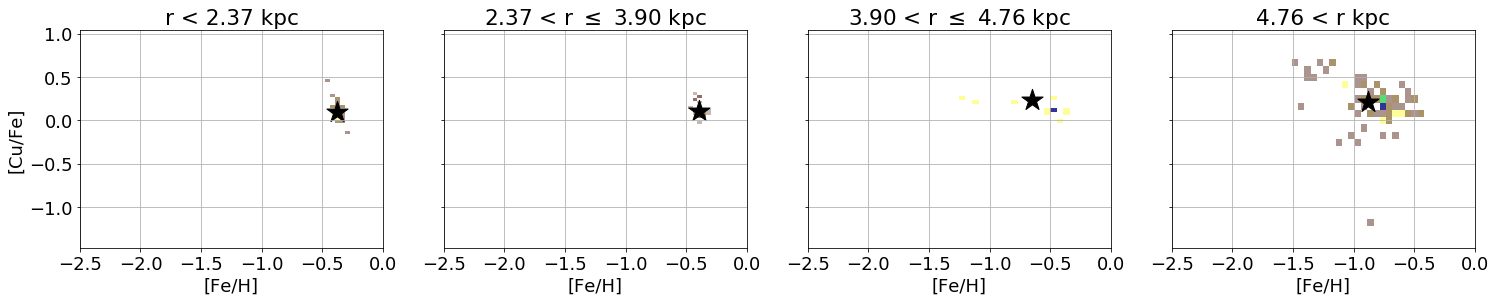

In [241]:
for i in tqdm_notebook(range(len(elems)-5),desc='plots',leave=False):
    
    print(r'---------------{}---------------'.format(labs[i]))
    
    medians = []
    
    fig, ax = plt.subplots(1,4,sharey=True,figsize=[25,4])
    rad_binsb = [oneb,twob,threeb,fourb]
    rad_labelsb = ['r < 2.37 kpc','2.37 < r $\leq$ 3.90 kpc','3.90 < r $\leq$ 4.76 kpc','4.76 < r kpc']
    for k in range(4):
        
        cln = np.where(r13[elems[i]][rad_binsb[k]]>-100)
        hayden = binned_statistic_2d(r13['FE_H'][rad_binsb[k]][cln],r13[elems[i]][rad_binsb[k]][cln],
                                     r13['FE_H'][rad_binsb[k]][cln],statistic='count',bins=30)
        mask=hayden.statistic <= 0.
        hayden.statistic[mask] = np.nan
    
        im = ax[k].imshow(hayden.statistic.T, origin='lower',
                          extent=[hayden.x_edge[0],hayden.x_edge[-1],hayden.y_edge[0],hayden.y_edge[-1]],
                          aspect='auto', interpolation='nearest', cmap='terrain_r')
    
        ax[k].set_title(r'{}'.format(rad_labelsb[k]))
        ax[k].set_xlabel(r'[Fe/H]')
        ax[k].set_xlim(-2.5,0)
        ax[k].grid()
    
#         fig.colorbar(im, ax=ax.ravel().tolist())
    
        ax[0].set_ylabel(r'{}'.format(labs[i]))
        print(r'{}: '.format(rad_labelsb[k])
              ,np.median([r13['FE_H'][rad_binsb[k]][cln],r13[elems[i]][rad_binsb[k]][cln]],axis=1))
        
        med = np.median([r13['FE_H'][rad_binsb[k]][cln],r13[elems[i]][rad_binsb[k]][cln]],axis=1) 
        
        ax[k].scatter(med[0],med[1],c='k',marker='*',s=500)
    
    plt.show()

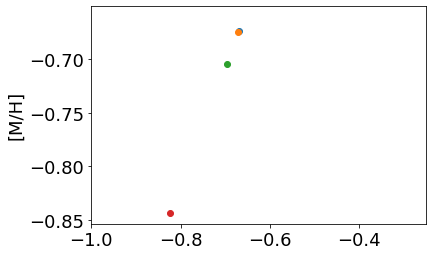

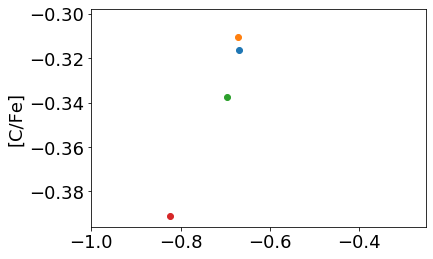

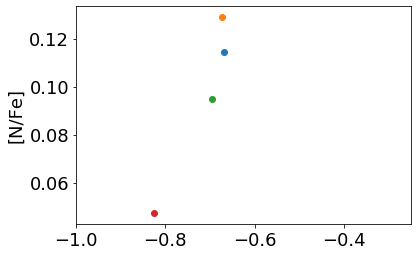

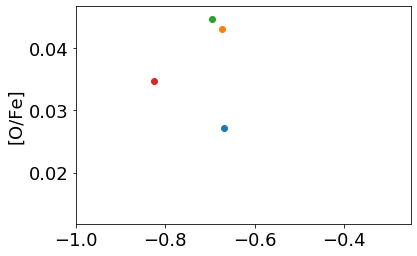

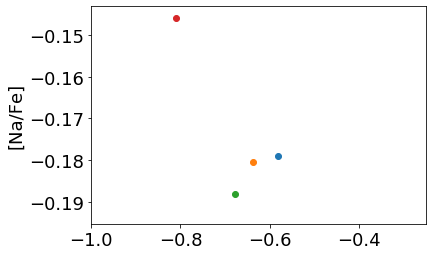

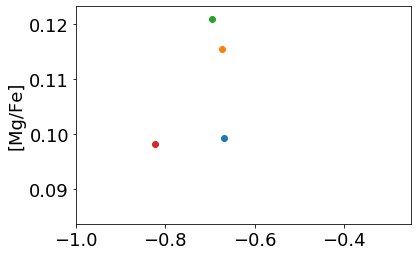

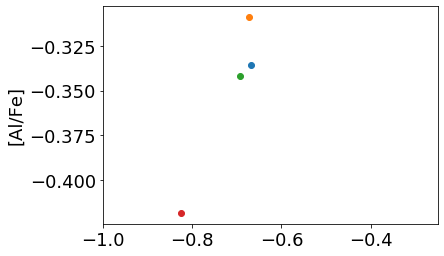

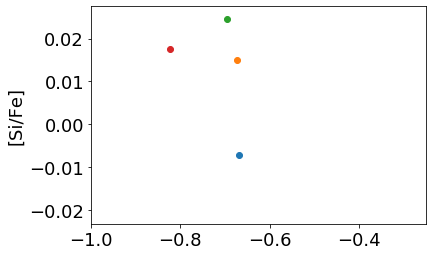

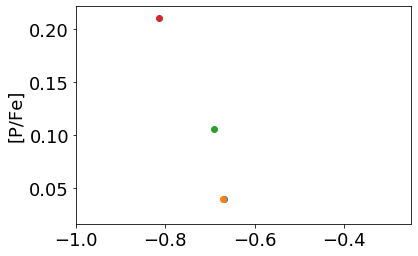

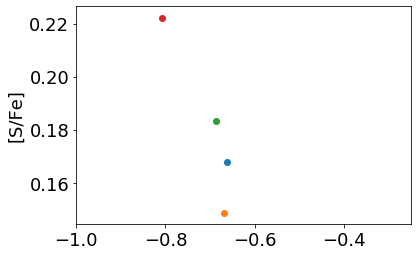

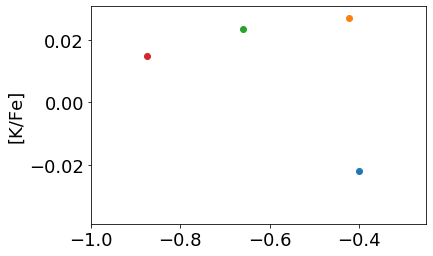

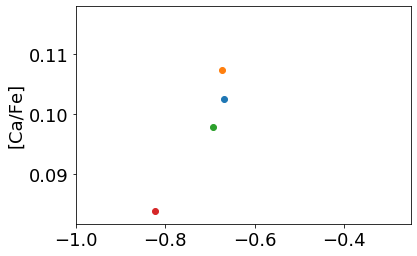

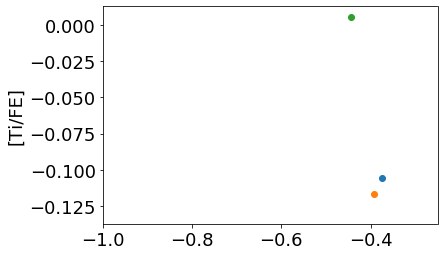

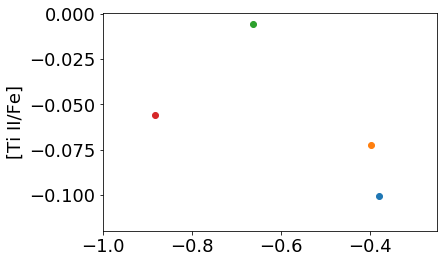

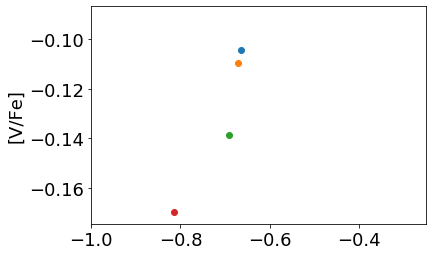

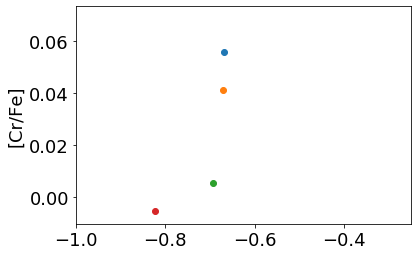

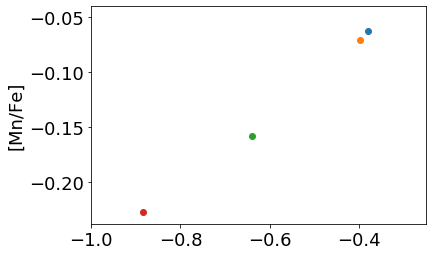

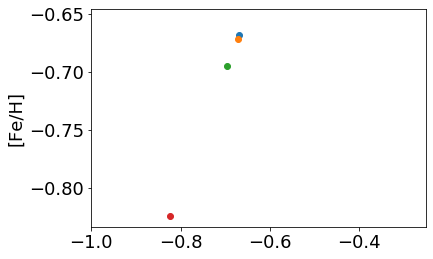

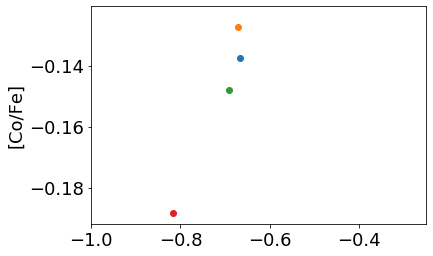

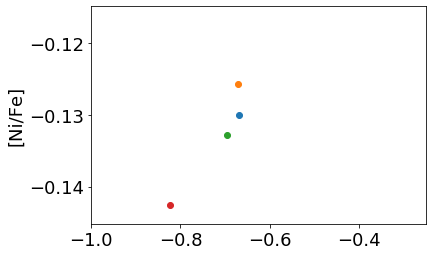

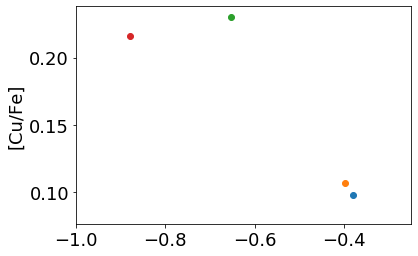

In [164]:
over_mediansb = []
for i in range(len(elems)-5):
    
    medians = []
    rad_binsb = [oneb,twob,threeb,fourb]
    for k in range(4):
        
        cln = np.where(r13[elems[i]][rad_binsb[k]]>-100)
        med = np.median([r13['FE_H'][rad_binsb[k]][cln],r13[elems[i]][rad_binsb[k]][cln]],axis=1)
        medians.append(med)
    
    over_mediansb.append(medians)
    
colors = [1,2,3,4]
plt.figure(figsize=[6,4])
for j in range(len(elems)-5):
    for k in range(4):
        plt.scatter(over_mediansb[j][k][0],over_mediansb[j][k][1])
    
    plt.xlim(-1.0,-0.25)
    plt.ylabel(r'{}'.format(labs[j]))
    plt.show()

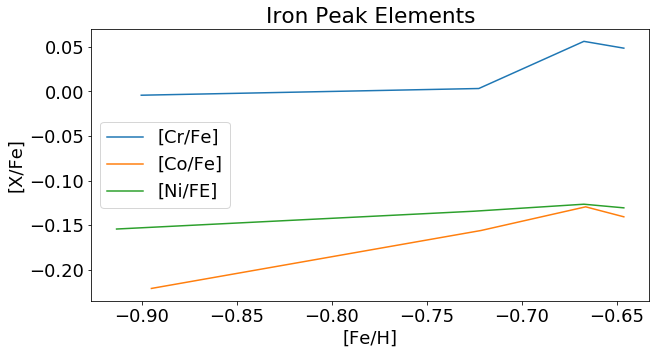

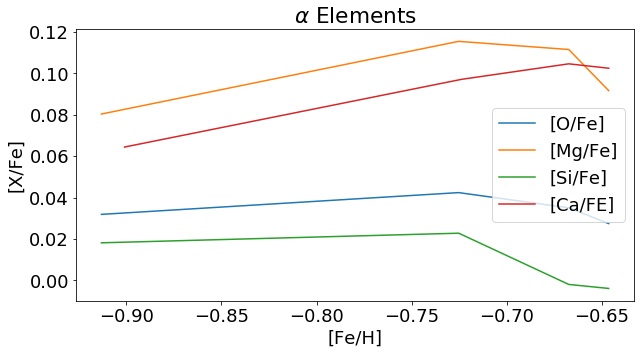

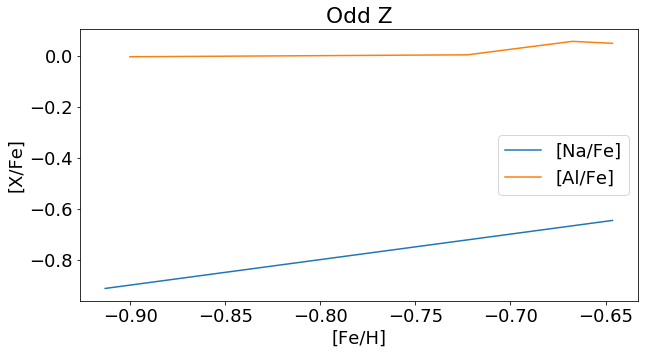

In [235]:
ironpeak = [np.where(elems=='FE_H'),np.where(elems=='CR_FE'),np.where(elems=='CO_FE'),np.where(elems == 'NI_FE')]
alphaelm = [np.where(elems=='O_FE'),np.where(elems=='MG_FE'),np.where(elems=='SI_FE'),np.where(elems == 'CA_FE')]
oddzelem = [np.where(elems=='NA_FE'),np.where(elems == 'AL_FE')]

median_xvalsb = []
median_yvalsb = []

for i in range(len(over_mediansb)):
    xpt = []
    ypt = []
    for j in range(4):
        xpt.append(over_medians[i][j][0])
        ypt.append(over_medians[i][j][1])
    median_xvalsb.append([xpt[0],xpt[1],xpt[2],xpt[3]])
    median_yvalsb.append([ypt[0],ypt[1],ypt[2],ypt[3]])

x_ironsb = []
y_ironsb = []
for k in np.squeeze(ironpeak):
    x_ironsb.append(median_xvals[k])
    y_ironsb.append(median_yvals[k])
    
x_alphab = []
y_alphab = []
for k in np.squeeze(alphaelm):
    x_alphab.append(median_xvals[k])
    y_alphab.append(median_yvals[k])

x_oddzsb = []
y_oddzsb = []
for k in np.squeeze(ironpeak):
    x_oddzsb.append(median_xvals[k])
    y_oddzsb.append(median_yvals[k])
    

### Hayden plot median trends   
plt.figure(figsize=[10,5])
# plt.plot(x_irons[0],y_irons[0],label='[Fe/H]')
plt.plot(x_ironsb[1],y_ironsb[1],label='[Cr/Fe]')
plt.plot(x_ironsb[2],y_ironsb[2],label='[Co/Fe]')
plt.plot(x_ironsb[3],y_ironsb[3],label='[Ni/FE]')
plt.title(r'Iron Peak Elements')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.plot(x_alphab[0],y_alphab[0],label='[O/Fe]')
plt.plot(x_alphab[1],y_alphab[1],label='[Mg/Fe]')
plt.plot(x_alphab[2],y_alphab[2],label='[Si/Fe]')
plt.plot(x_alphab[3],y_alphab[3],label='[Ca/FE]')
plt.title(r'$\alpha$ Elements')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.plot(x_oddzsb[0],y_oddzsb[0],label='[Na/Fe]')
plt.plot(x_oddzsb[1],y_oddzsb[1],label='[Al/Fe]')
plt.title(r'Odd Z')
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'[X/Fe]')
plt.legend()
plt.show()

<font size='15'>
    <b>
        ALPHA CHEM AGE
    </b>
</font>

In [242]:
pwd

'/Users/joshpovick/Desktop/Research/LMC_Gradients_with_Ages'

In [244]:
ages = fits.getdata('pca_ols_ages.fits')
ages.columns

ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'AGE'; format = 'D'
    name = 'AGE_ERR'; format = 'D'
    name = 'DIST'; format = '500D'
)

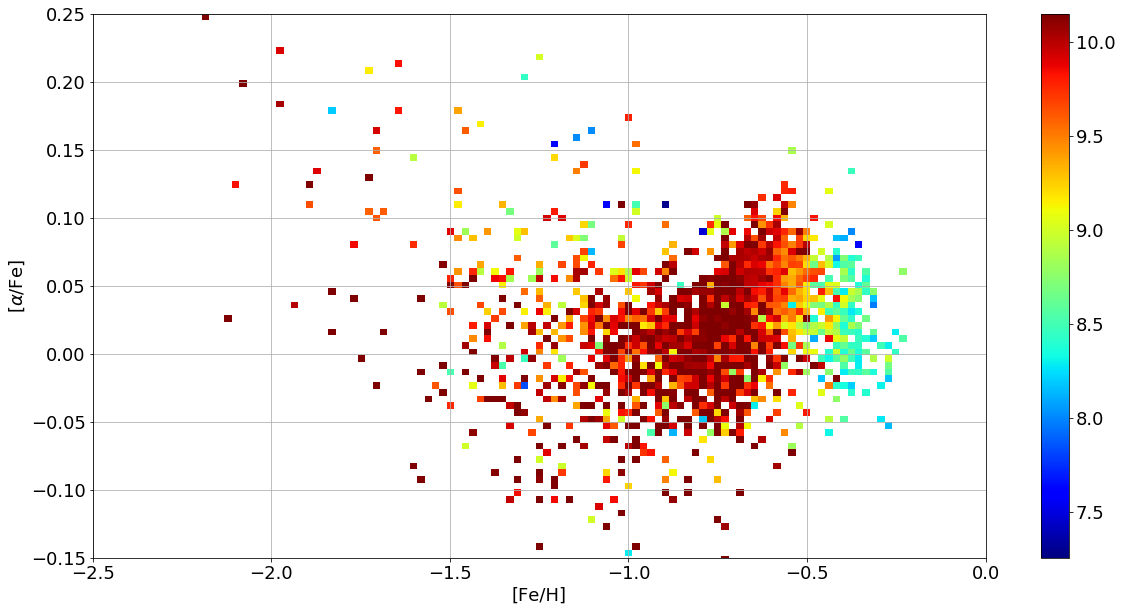

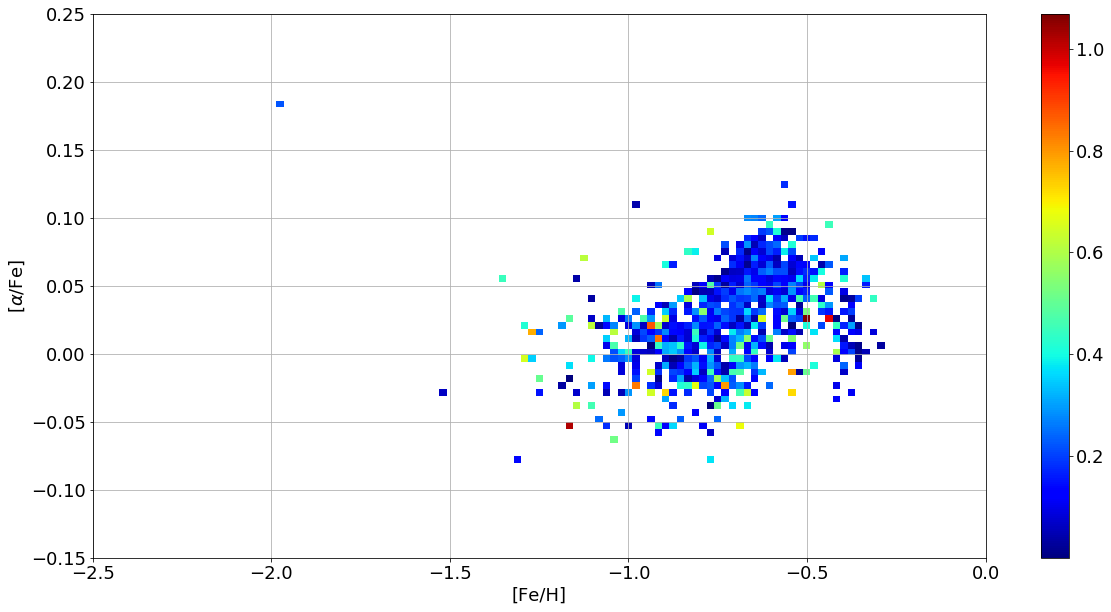

In [260]:
### Values
plt.figure(figsize=[20,10])
hayden = binned_statistic_2d(r13['FE_H'],(r13['ALPHA_M']+r13['M_H']-r13['FE_H']),
                             ages['AGE'],statistic='median',bins=100)
mask=hayden.statistic <= 0.
hayden.statistic[mask] = np.nan
    
im = plt.imshow(hayden.statistic.T, origin='lower',
                extent=[hayden.x_edge[0],hayden.x_edge[-1],hayden.y_edge[0],hayden.y_edge[-1]],
                aspect='auto', interpolation='nearest', cmap='jet',vmax=np.log10(14*10**9))
    
#     ax[k].set_title(r'{}'.format(rad_labels[k]))
plt.xlabel(r'[Fe/H]')
plt.xlim(-2.5,0)
plt.ylim(-0.15,0.25)
plt.grid()
    
plt.colorbar(im)
# fig.text(0.4,0.95,r'Color as Count')
    
plt.ylabel(r'[$\alpha$/Fe]')
plt.show()

### Dispersion
plt.figure(figsize=[20,10])
hayden = binned_statistic_2d(r13['FE_H'],(r13['ALPHA_M']+r13['M_H']-r13['FE_H']),
                             ages['AGE'],statistic=lambda y: util.mad(y),bins=100)
mask=hayden.statistic <= 0.
hayden.statistic[mask] = np.nan
    
im = plt.imshow(hayden.statistic.T, origin='lower',
                extent=[hayden.x_edge[0],hayden.x_edge[-1],hayden.y_edge[0],hayden.y_edge[-1]],
                aspect='auto', interpolation='nearest', cmap='jet')
    
#     ax[k].set_title(r'{}'.format(rad_labels[k]))
plt.xlabel(r'[Fe/H]')
plt.xlim(-2.5,0)
plt.ylim(-0.15,0.25)
plt.grid()
    
plt.colorbar(im)
# fig.text(0.4,0.95,r'Color as Count')
    
plt.ylabel(r'[$\alpha$/Fe]')
plt.show()

<font size='15'>
    <b>
        Age and Radius Equal Distance Binning
    </b>
</font>

In [ ]:
##############
###  Bins  ###
##############

one = np.where(radius<1.75)
two = np.where((radius>=1.75)&(radius<3.0))
three = np.where((radius>=3.0)&(radius<5.75))
four = np.where(radius>=5.75)

rad_bins = [one,two,three,four]

## yoradius
yoone = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius<1.75))
yotwo = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=1.75)&(radius<3.0))
yothree = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=3.0)&(radius<5.75))
yofour = np.where((ages['AGE']<=np.log10(0.5*10**9))&(radius>=5.75))

yoradius = [yoone,yotwo,yothree,yofour]

## ylradius
ylone = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius<1.75))
yltwo = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius>=1.75)&(radius<3.0))
ylthree = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&
                   (radius>=3.0)&(radius<5.75))
ylfour = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9))&(radius>=5.75))

ylradius = [ylone,yltwo,ylthree,ylfour]

## ymradius
ymone = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius<1.75))
ymtwo = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius>=1.75)&(radius<3.0))
ymthree = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&
                   (radius>=3.0)&(radius<5.75))
ymfour = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9))&(radius>=5.75))

ymradius = [ymone,ymtwo,ymthree,ymfour]

## omradius
omone = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius<1.75))
omtwo = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius>=1.75)&(radius<3.0))
omthree = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&
                   (radius>=3.0)&(radius<5.75))
omfour = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9))&(radius>=5.75))

omradius = [omone,omtwo,omthree,omfour]

## olradius
olone = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius<1.75))
oltwo = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=1.75)&(radius<3.0))
olthree = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=3.0)&(radius<5.75))
olfour = np.where((ages['AGE']>np.log10(10.5*10**9))&(radius>=5.75))

olradius = [olone,oltwo,olthree,olfour]